# MD211 SC vs NoSC Tomo
06: Dispersion mismatch

In [1]:
import glob
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)

def replace_point_with_p(input_str):
        return input_str.replace(".", "p")
    
def is_non_zero_file(fpath):  
        print '\n\t\t\tis_non_zero_file:: Checking file ', fpath
        print '\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath)
        print '\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath)
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [5]:

dd1 = dict() # NoSC LI
dd2 = dict() # SC LI
dd3 = dict() # NoSC HI
dd4 = dict() # SC HI

dd1 = add_input_file(dd1, '../05_SC_V_RF/1_00/output/output.mat', '1.3 eVs')
dd1 = add_input_file(dd1, '../05_SC_V_RF/1_01/output/output.mat', '1.6 eVs')
dd1 = add_input_file(dd1, '../05_SC_V_RF/1_02/output/output.mat', '1.9 eVs')
dd1 = add_input_file(dd1, '../05_SC_V_RF/1_03/output/output.mat', '2.3 eVs')
dd1 = add_input_file(dd1, '../05_SC_V_RF/1_04/output/output.mat', '2.6 eVs')

dd2 = add_input_file(dd2, '1_00/output/output.mat', '1.3 eVs')
dd2 = add_input_file(dd2, '1_01/output/output.mat', '1.6 eVs')
dd2 = add_input_file(dd2, '1_02/output/output.mat', '1.9 eVs')
dd2 = add_input_file(dd2, '1_03/output/output.mat', '2.3 eVs')
dd2 = add_input_file(dd2, '1_04/output/output.mat', '2.6 eVs')

dd3 = add_input_file(dd3, '../05_SC_V_RF/1_10/output/output.mat', '1.3 eVs')
dd3 = add_input_file(dd3, '../05_SC_V_RF/1_11/output/output.mat', '1.6 eVs')
dd3 = add_input_file(dd3, '../05_SC_V_RF/1_12/output/output.mat', '1.9 eVs')
dd3 = add_input_file(dd3, '../05_SC_V_RF/1_13/output/output.mat', '2.3 eVs')
dd3 = add_input_file(dd3, '../05_SC_V_RF/1_14/output/output.mat', '2.6 eVs')

dd4 = add_input_file(dd4, '1_10/output/output.mat', '1.3 eVs')
dd4 = add_input_file(dd4, '1_11/output/output.mat', '1.6 eVs')
dd4 = add_input_file(dd4, '1_12/output/output.mat', '1.9 eVs')
dd4 = add_input_file(dd4, '1_13/output/output.mat', '2.3 eVs')
dd4 = add_input_file(dd4, '1_14/output/output.mat', '2.6 eVs')

	Added output data from  ../05_SC_V_RF/1_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  ../05_SC_V_RF/1_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  ../05_SC_V_RF/1_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  ../05_SC_V_RF/1_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  ../05_SC_V_RF/1_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  1_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  1_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  1_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  1_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  1_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  ../05_SC_V_RF/1_10/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  ../05_SC_V_RF/1_11/output/output.mat 	 dictionary key:  1.6 eVs
	A

In [6]:
dd1['1.3 eVs'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [7]:
sc = 'SbS'
legend_label = r'$\epsilon_{z}$'    
main_label = 'MD211_Dispersion_Mismatch'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
title_2 = 'SC'
title_1 = 'SC + Dispersion Mismatch'
case_label_1 = r'$I = 1.6 \cdot 10^{12}$'
case_label_2 = r'$I = 2.0 \cdot 10^{12}$'

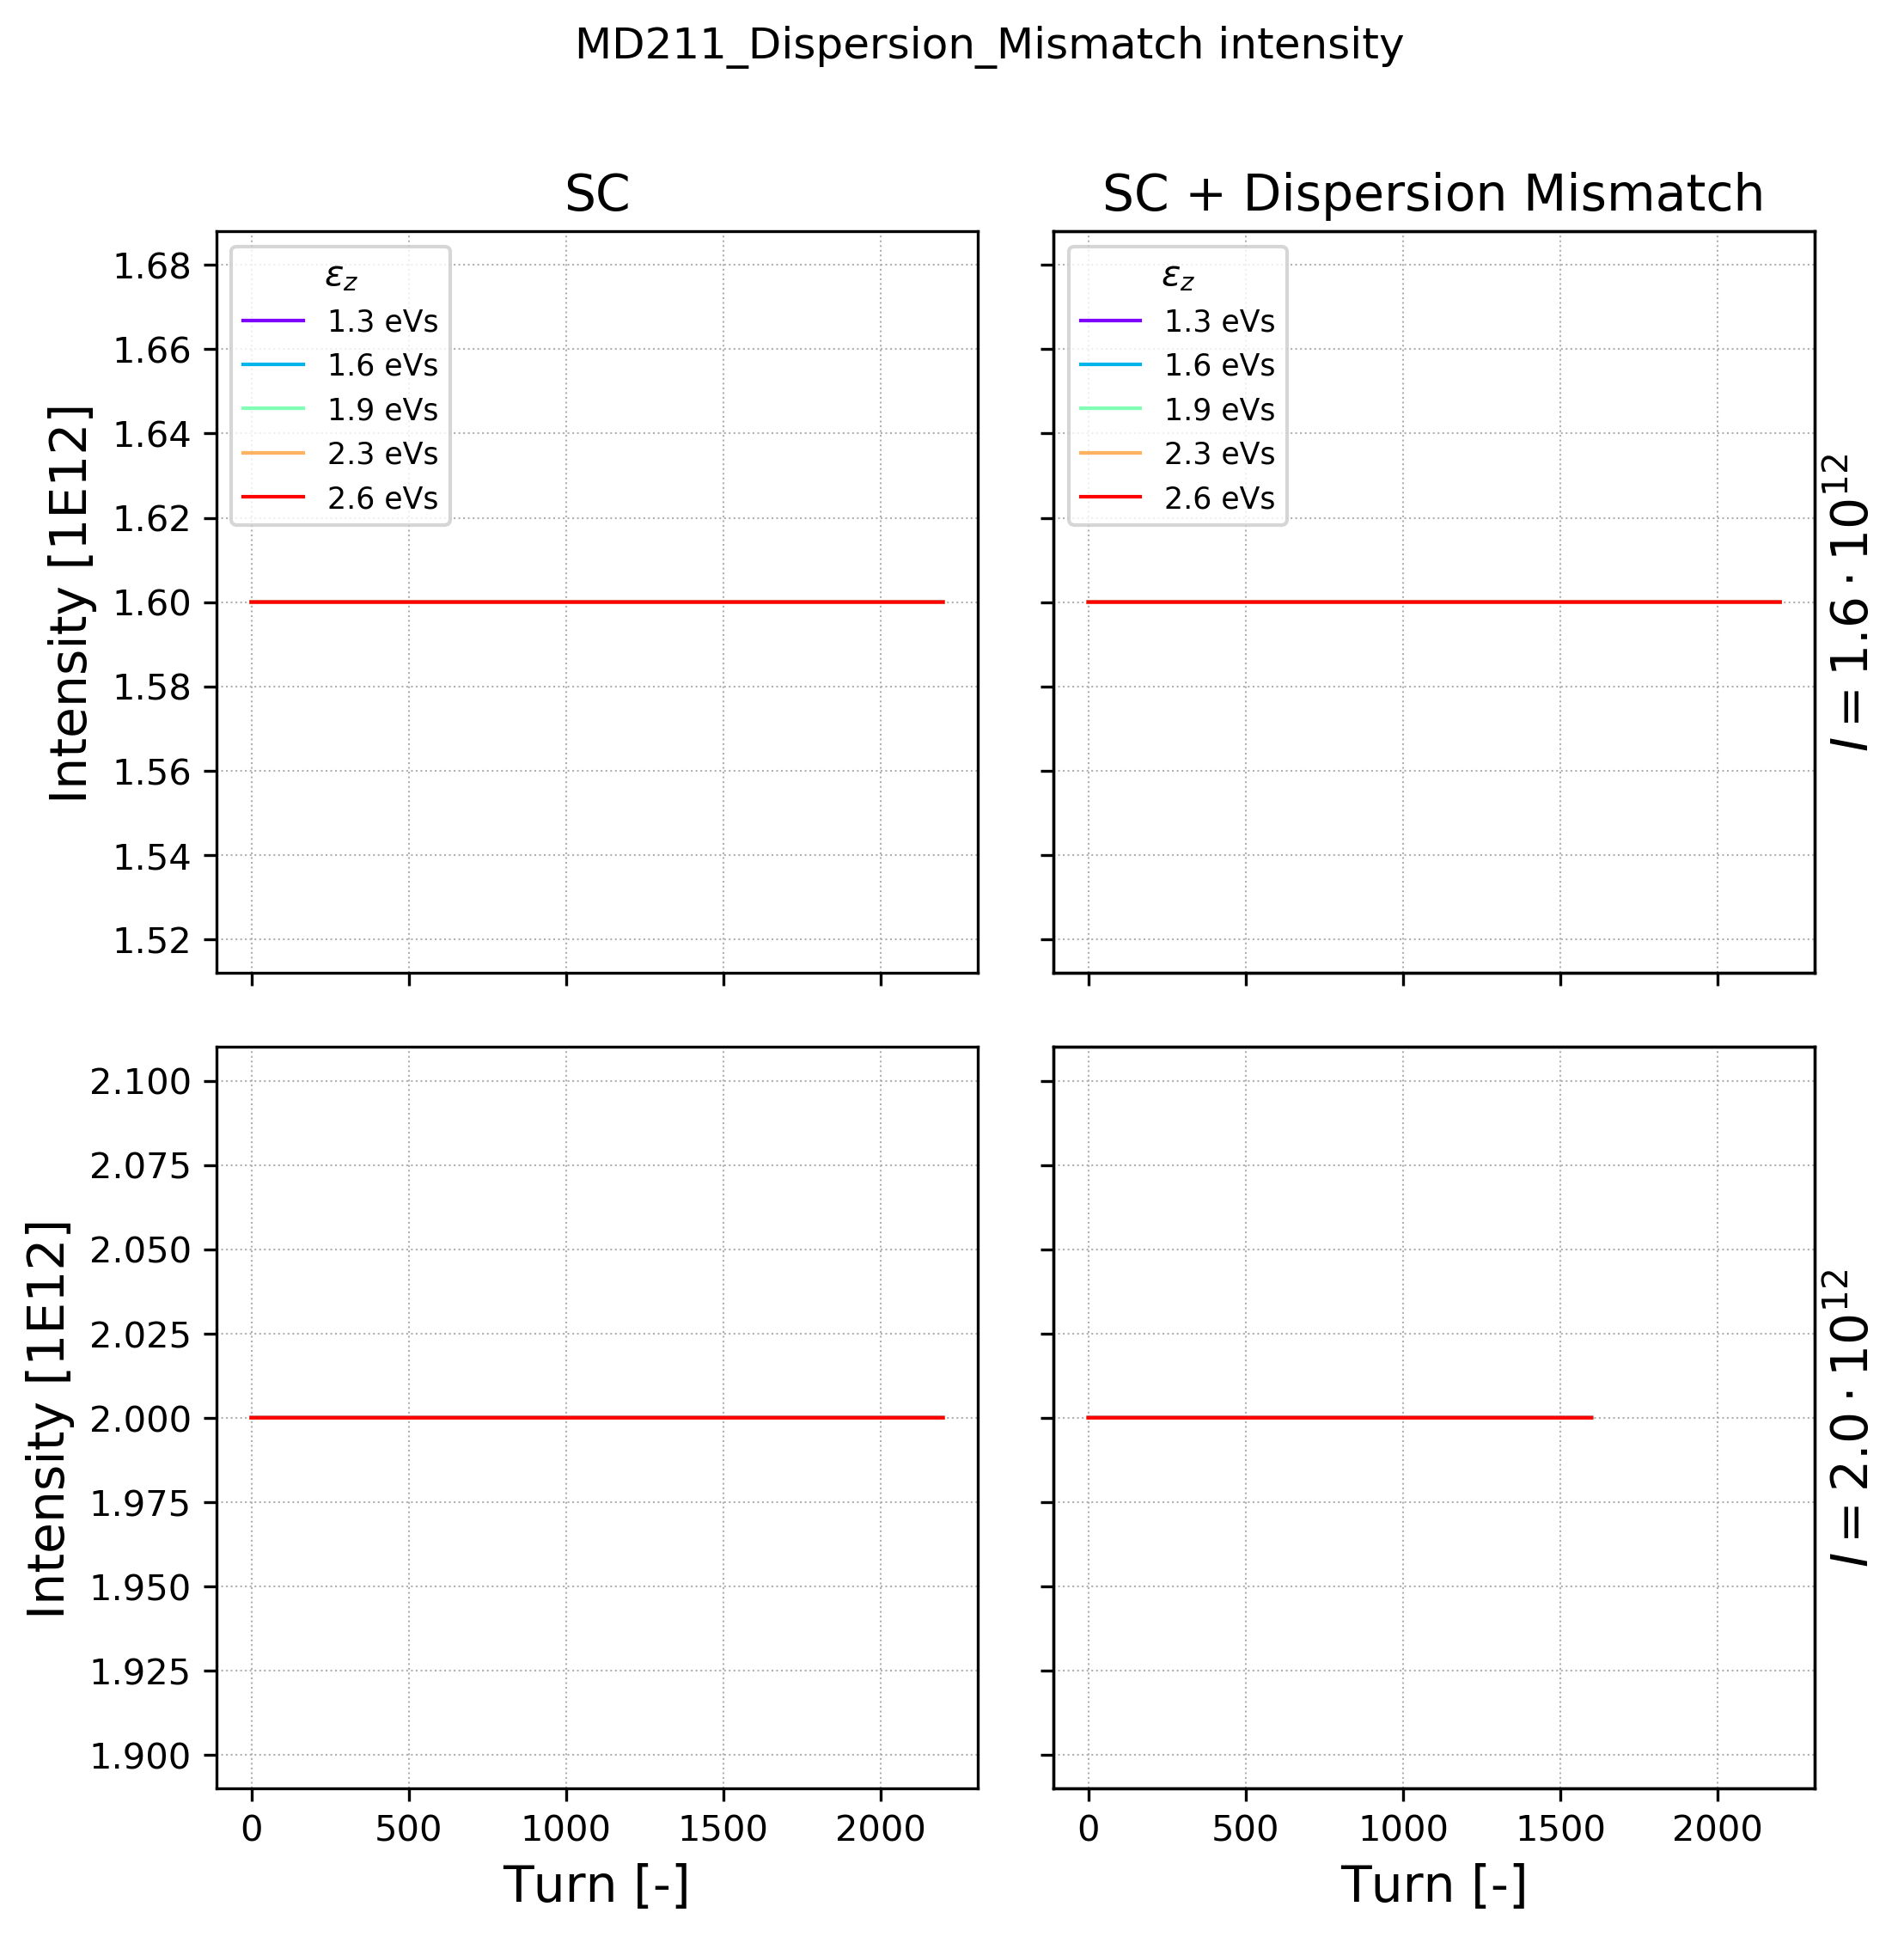

In [8]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

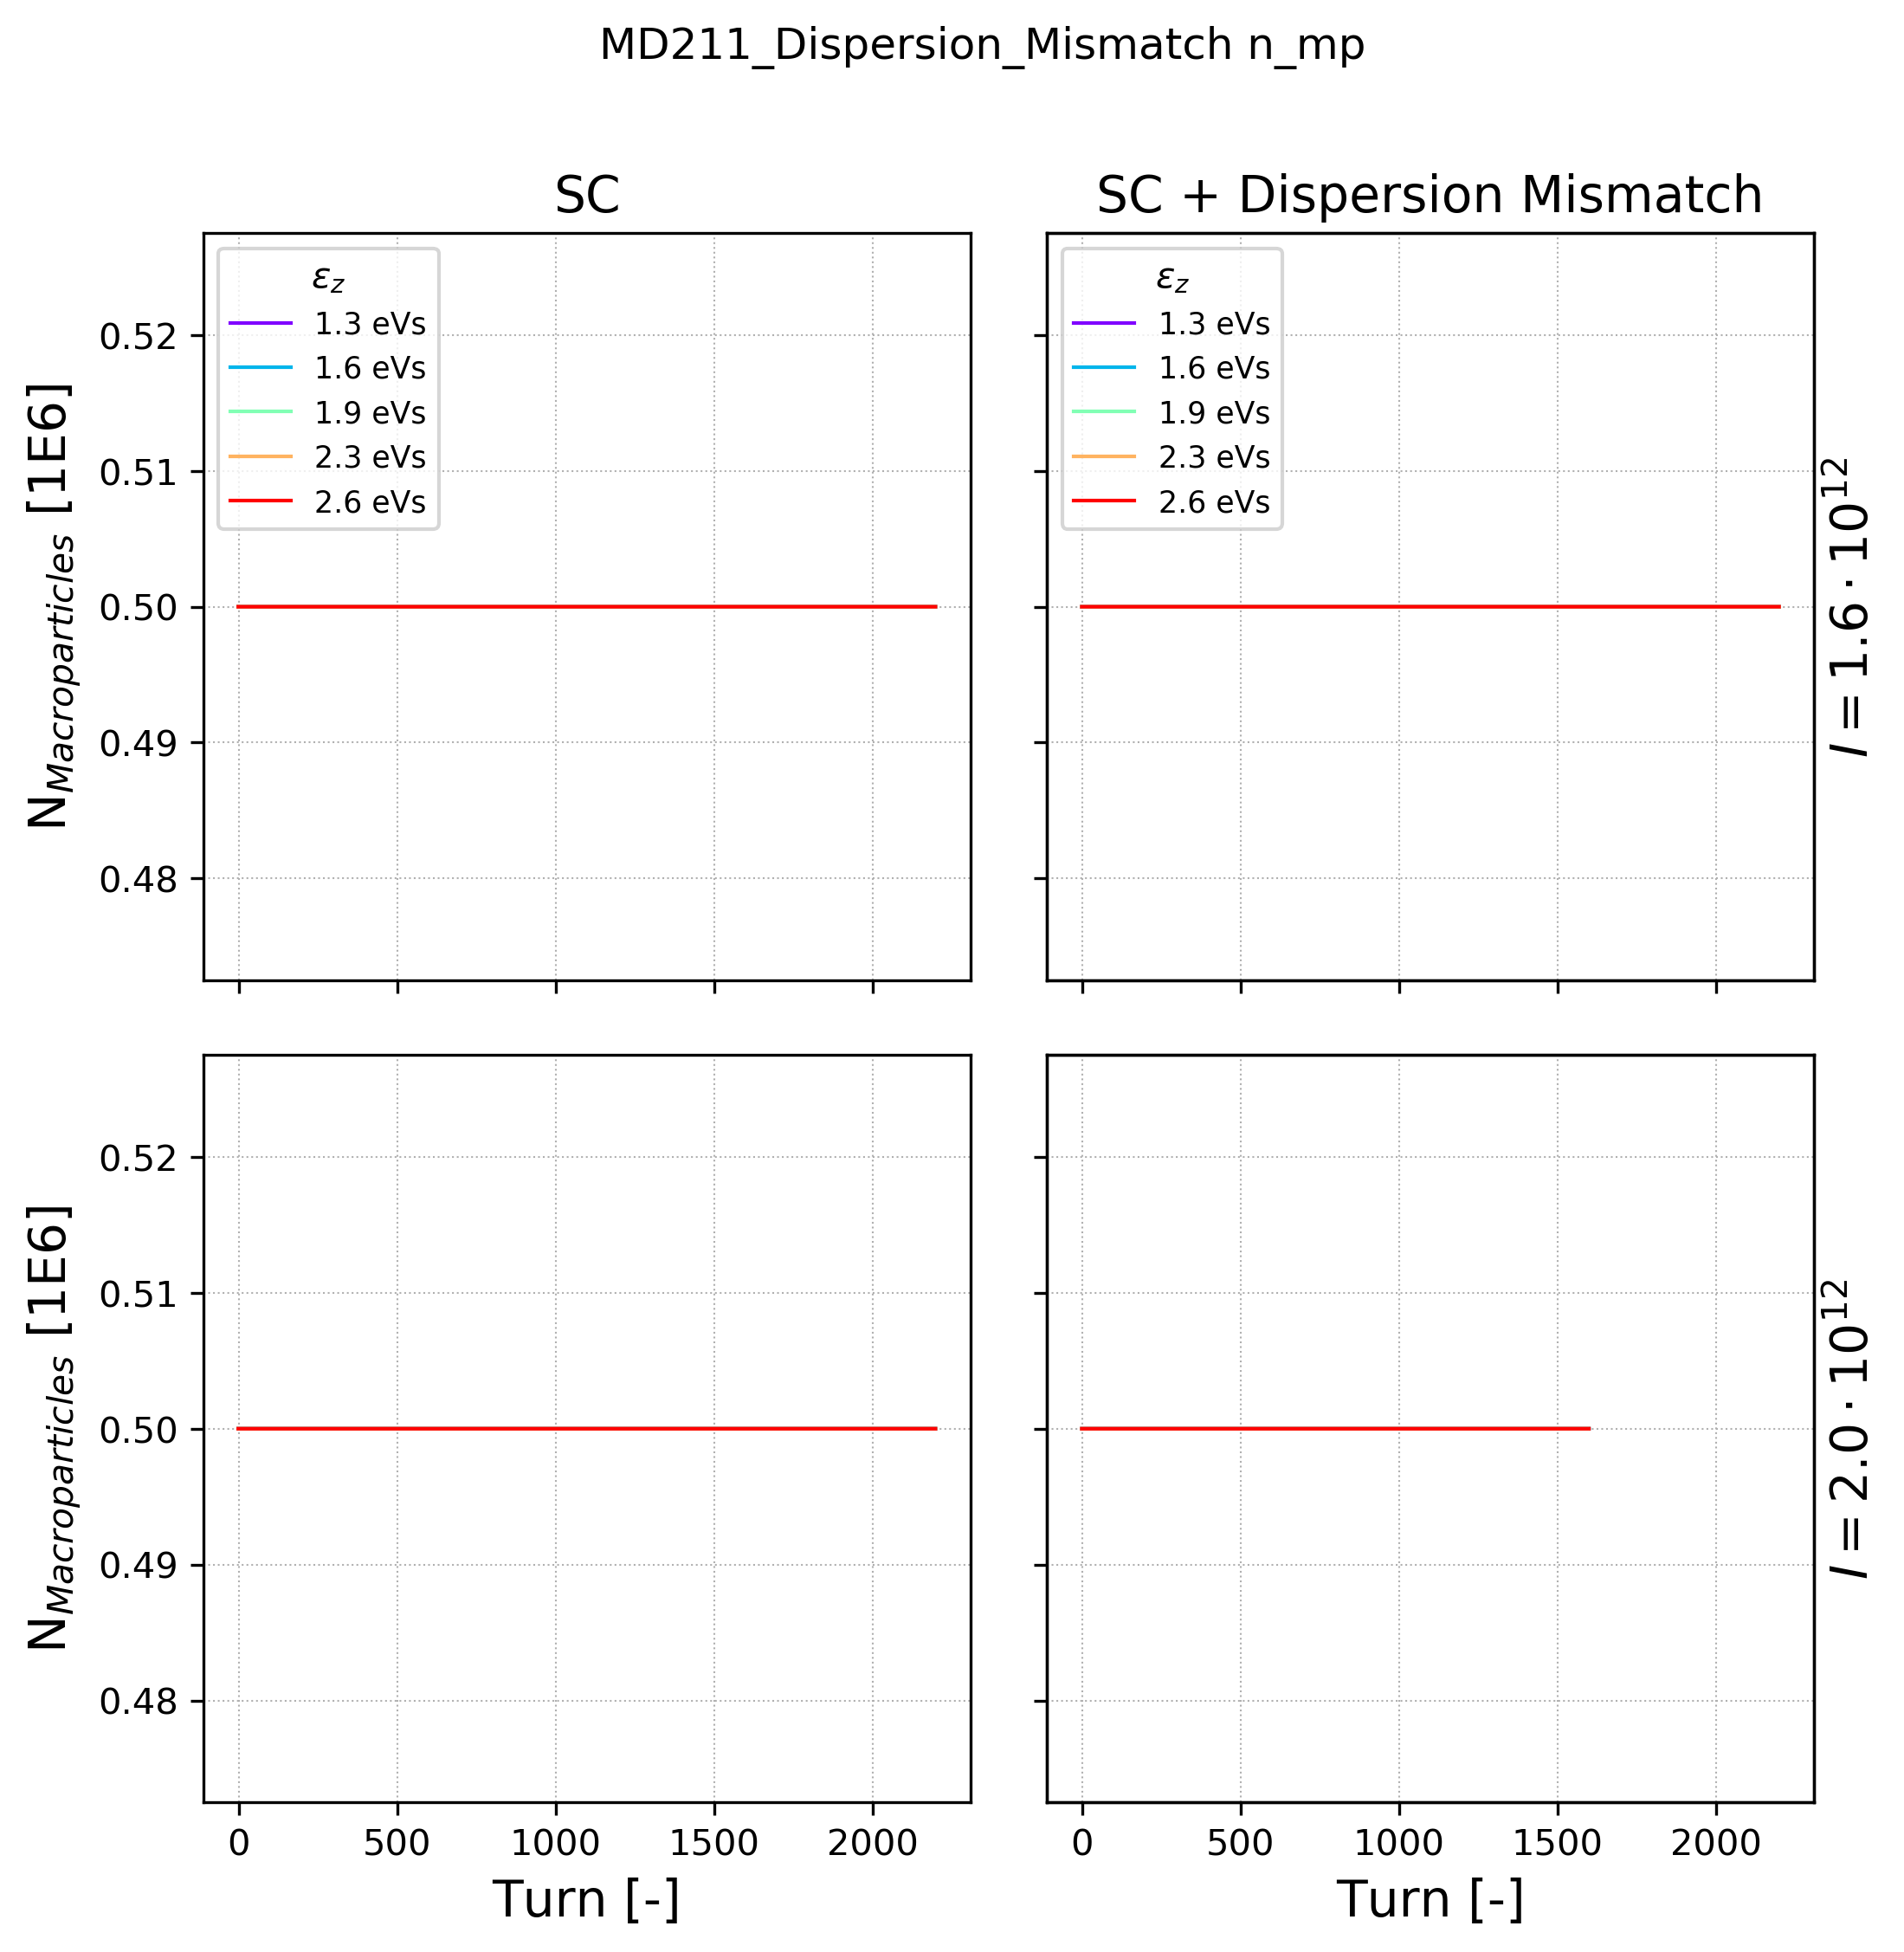

In [9]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

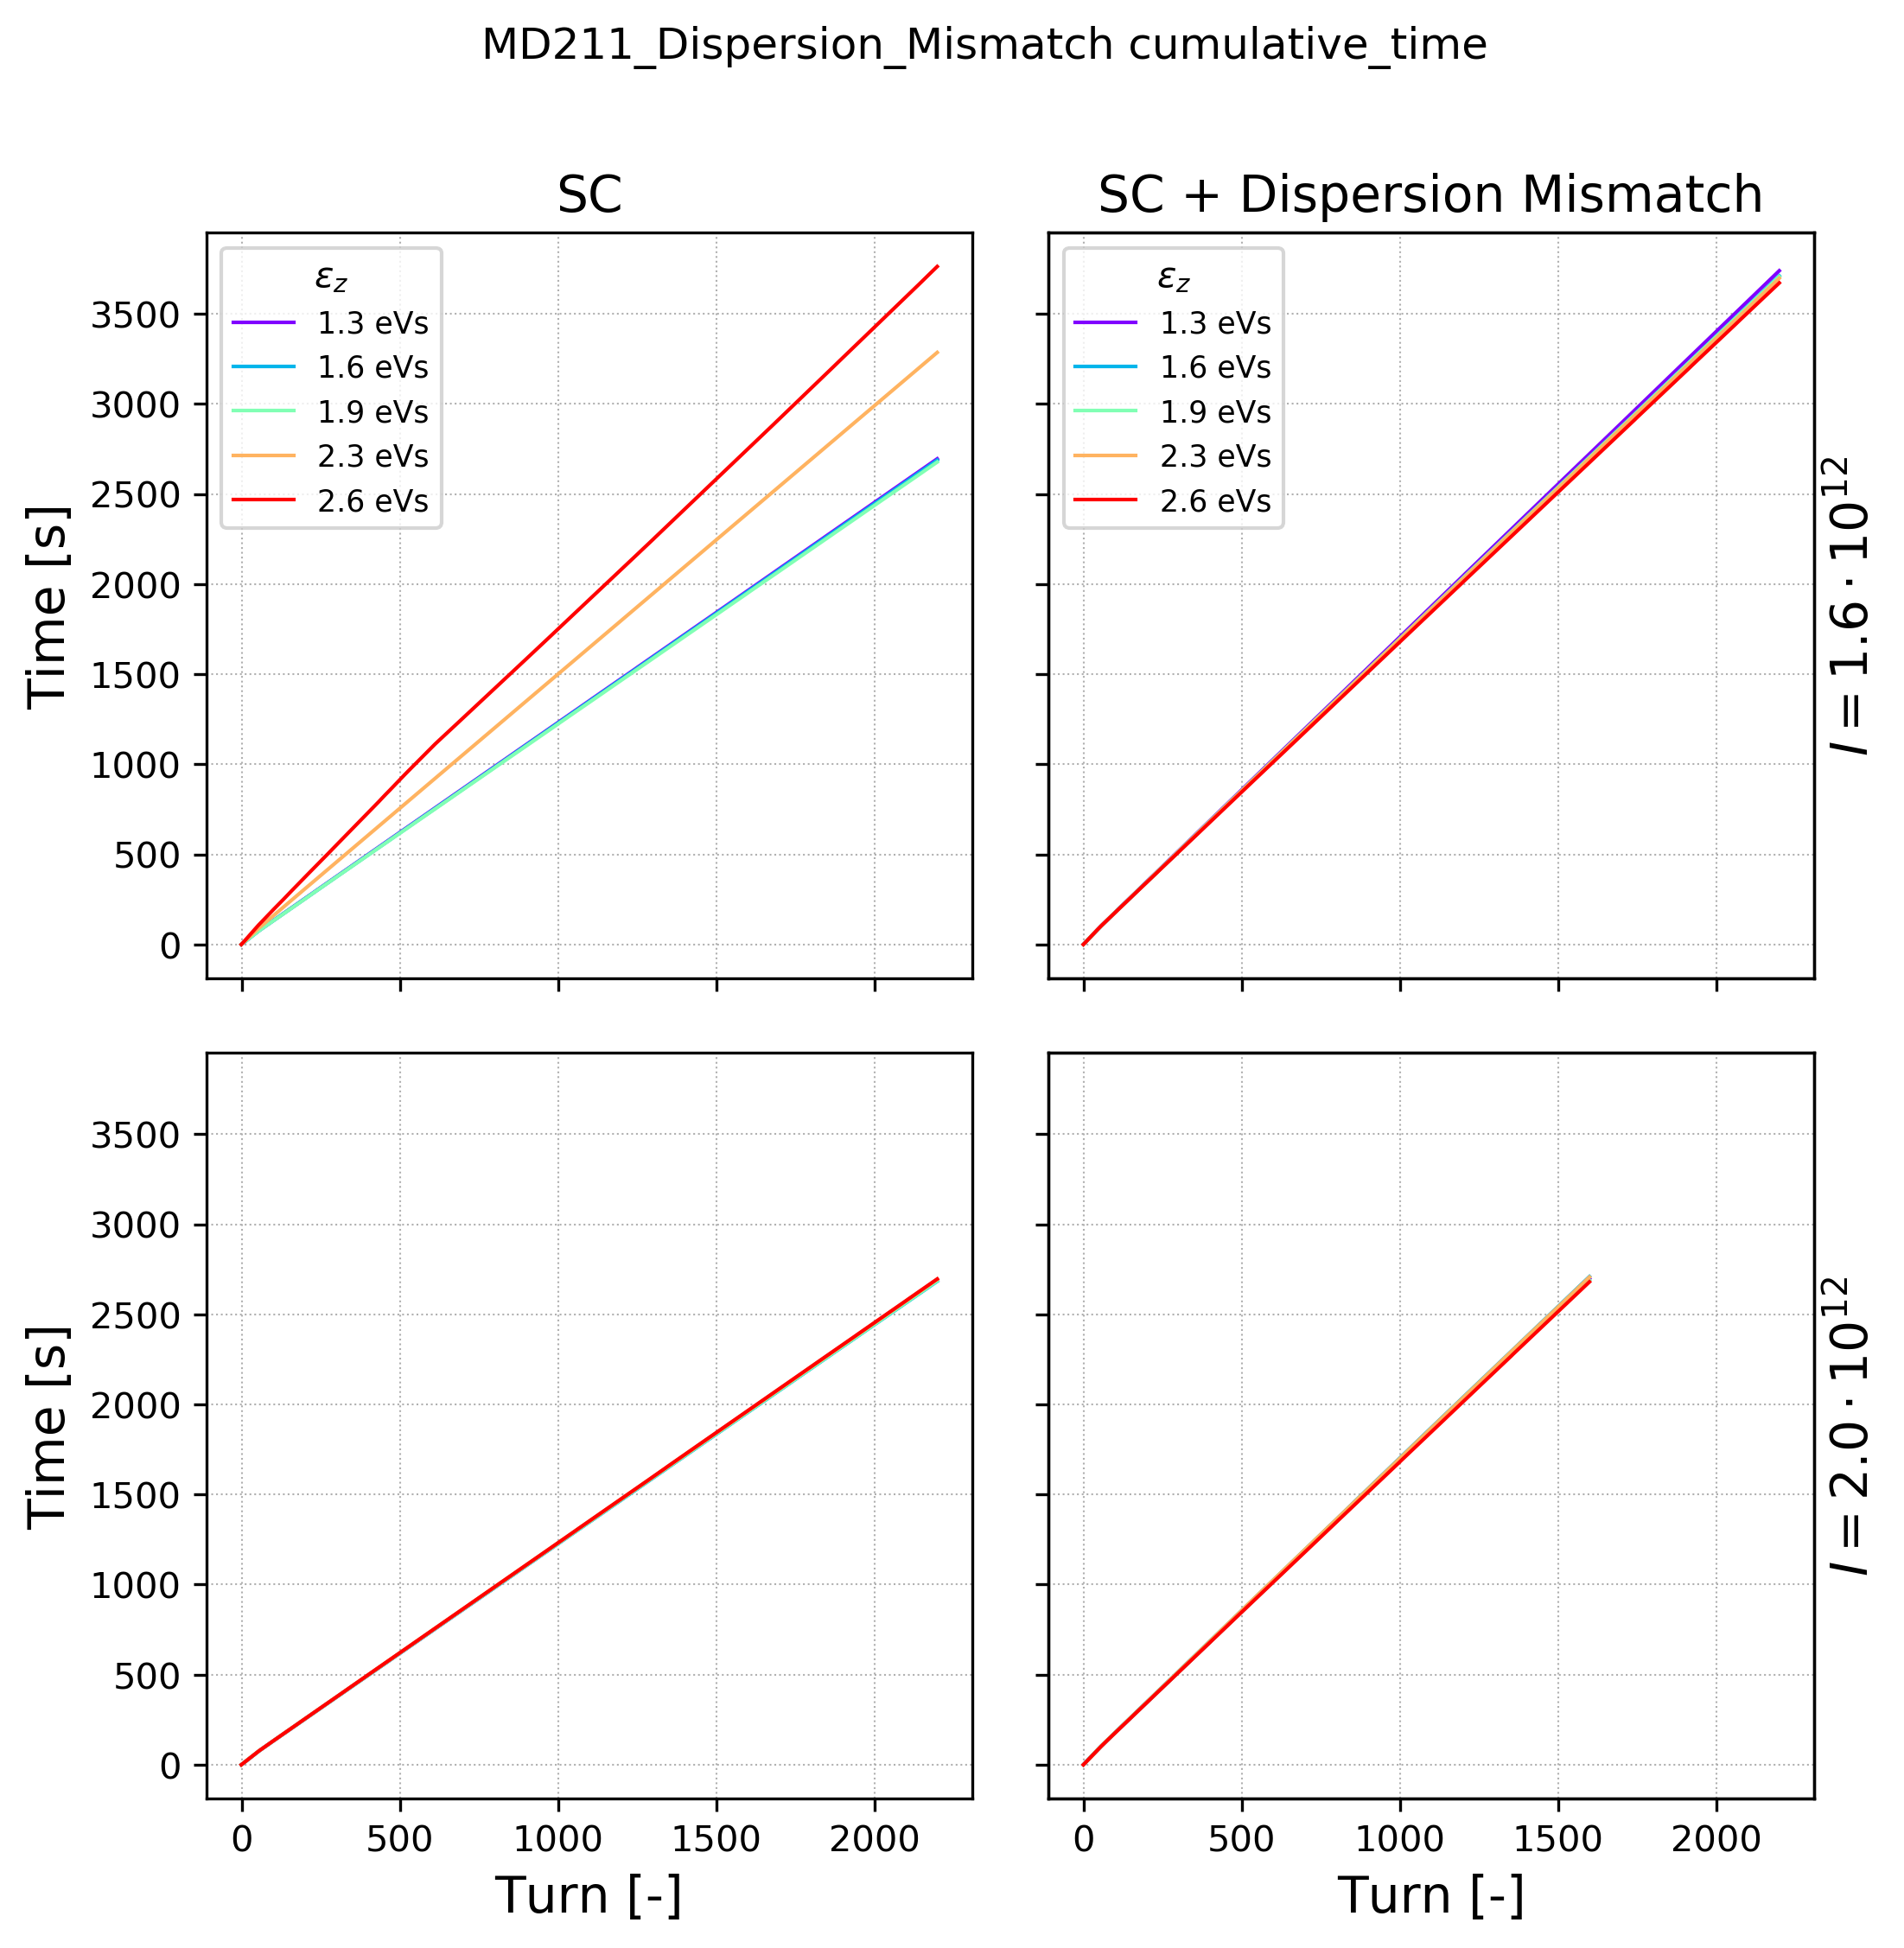

In [10]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [s]');
ax3.set_ylabel('Time [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

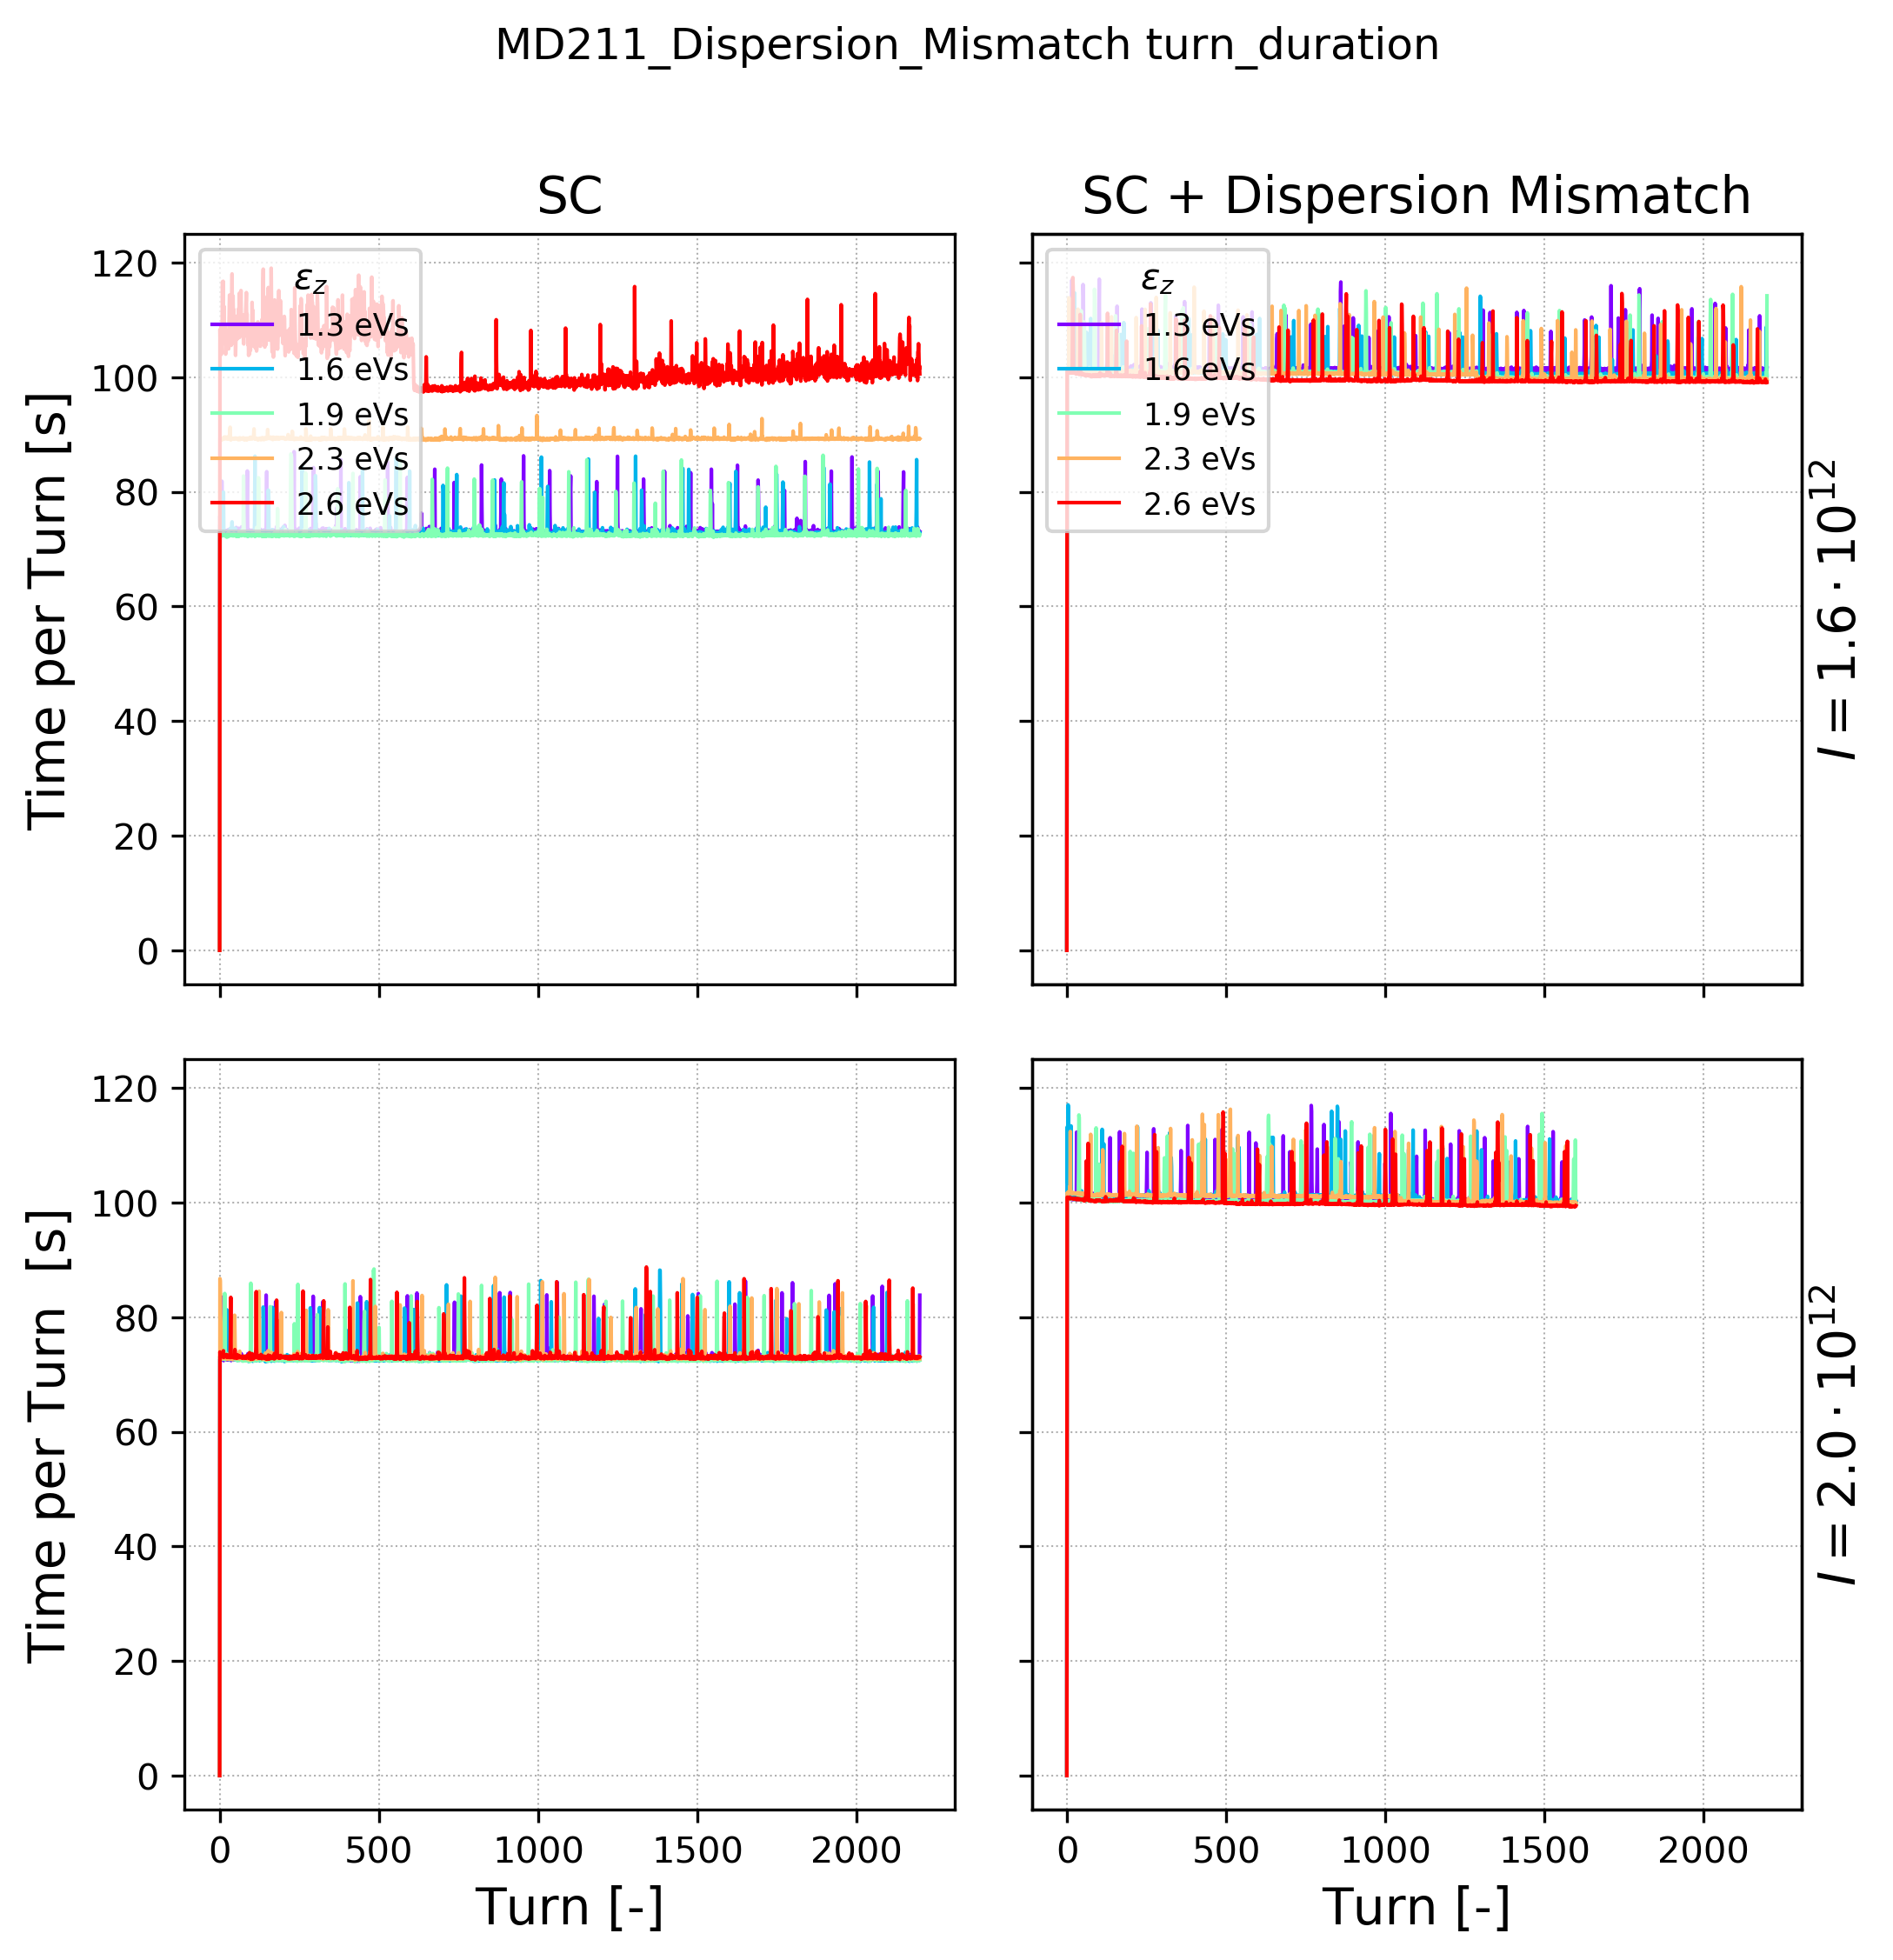

In [11]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time per Turn [s]');
ax3.set_ylabel('Time per Turn  [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_x  =  5.09  range =  0.176  =  3.46 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_x  =  5.37  range =  0.127  =  2.37 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_x  =  5.89  range =  0.131  =  2.23 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_x  =  6.52  range =  0.14  =  2.14 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_x  =  7.03  range =  0.156  =  2.22 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_x  =  5.13  range =  1.68  =  32.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_x  =  5.49  range =  2.29  =  41.6 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_x  =  6.21  range =  3.59  =  57.8 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_x  =  6.95  range =  4.81  =  69.2 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_x  =  7.66  range =  5.63  =  73.

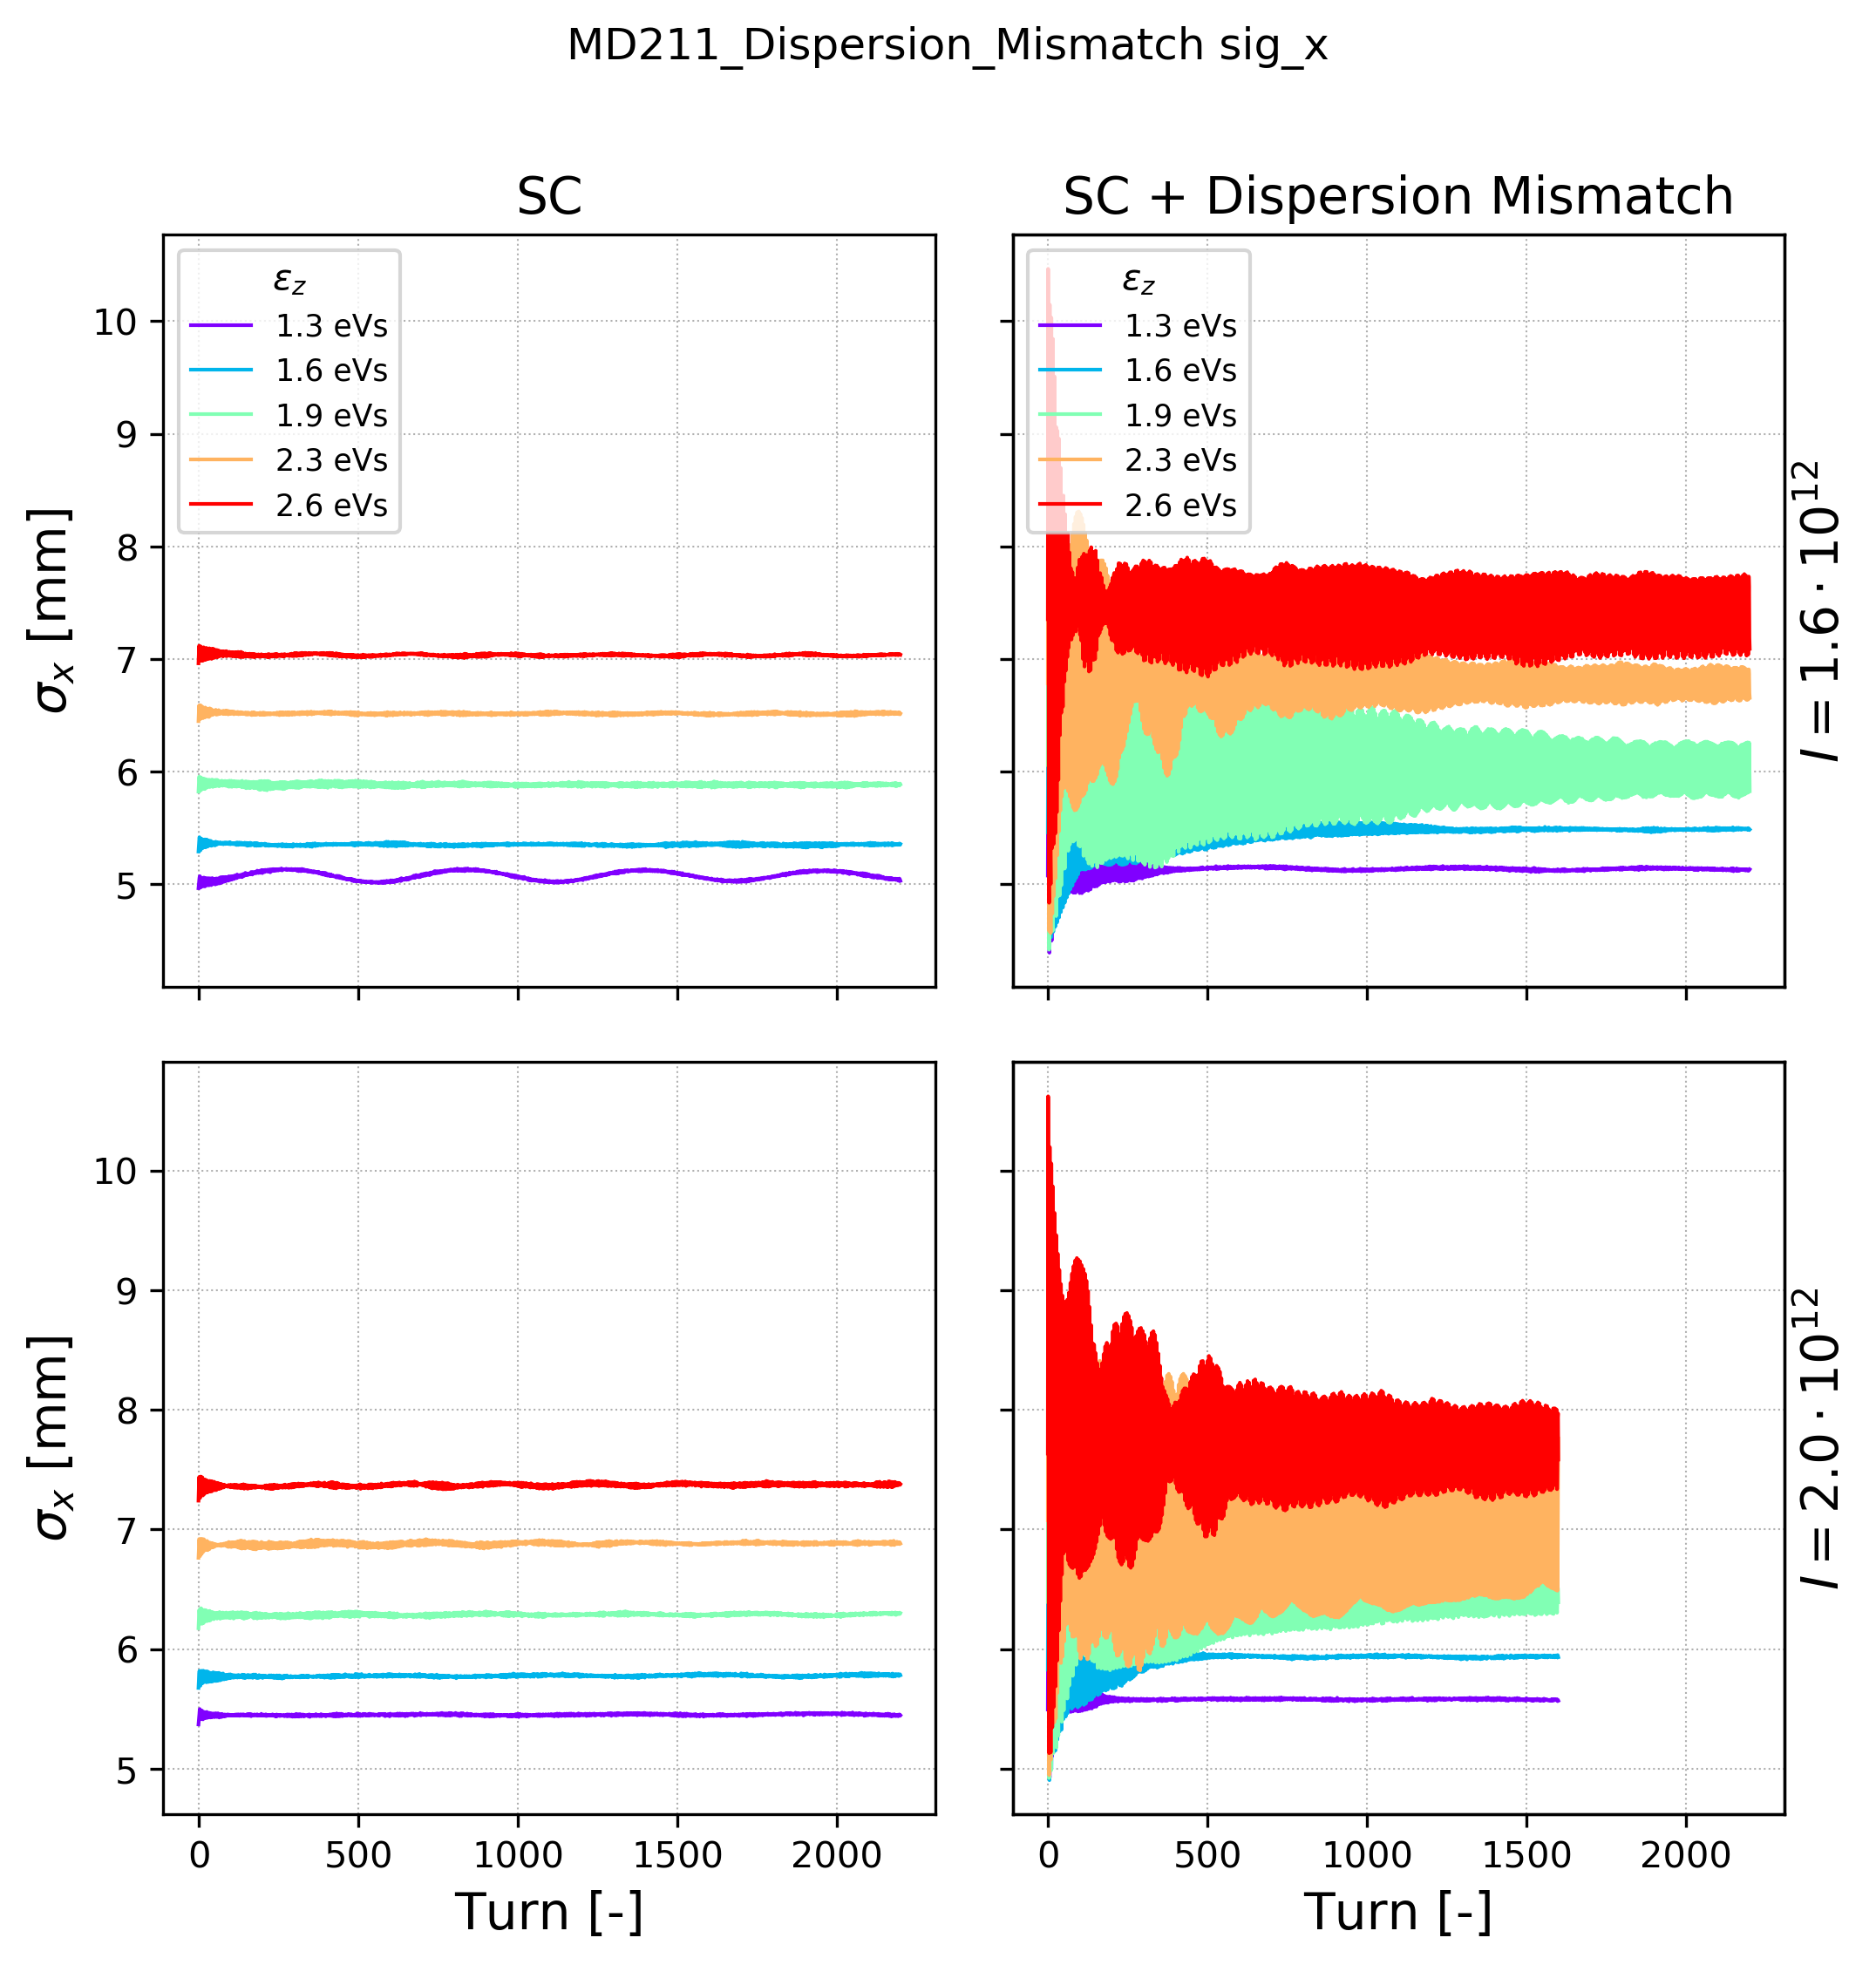

In [12]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_y  =  3.13  range =  0.0654  =  2.09 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_y  =  3.12  range =  0.0666  =  2.14 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_y  =  3.12  range =  0.0635  =  2.04 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_y  =  3.11  range =  0.0557  =  1.79 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_y  =  3.11  range =  0.0506  =  1.63 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_y  =  3.16  range =  0.0929  =  2.94 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_y  =  3.2  range =  0.149  =  4.66 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_y  =  3.32  range =  0.258  =  7.77 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_y  =  3.35  range =  0.333  =  9.96 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_y  =  3.32  range =  0.

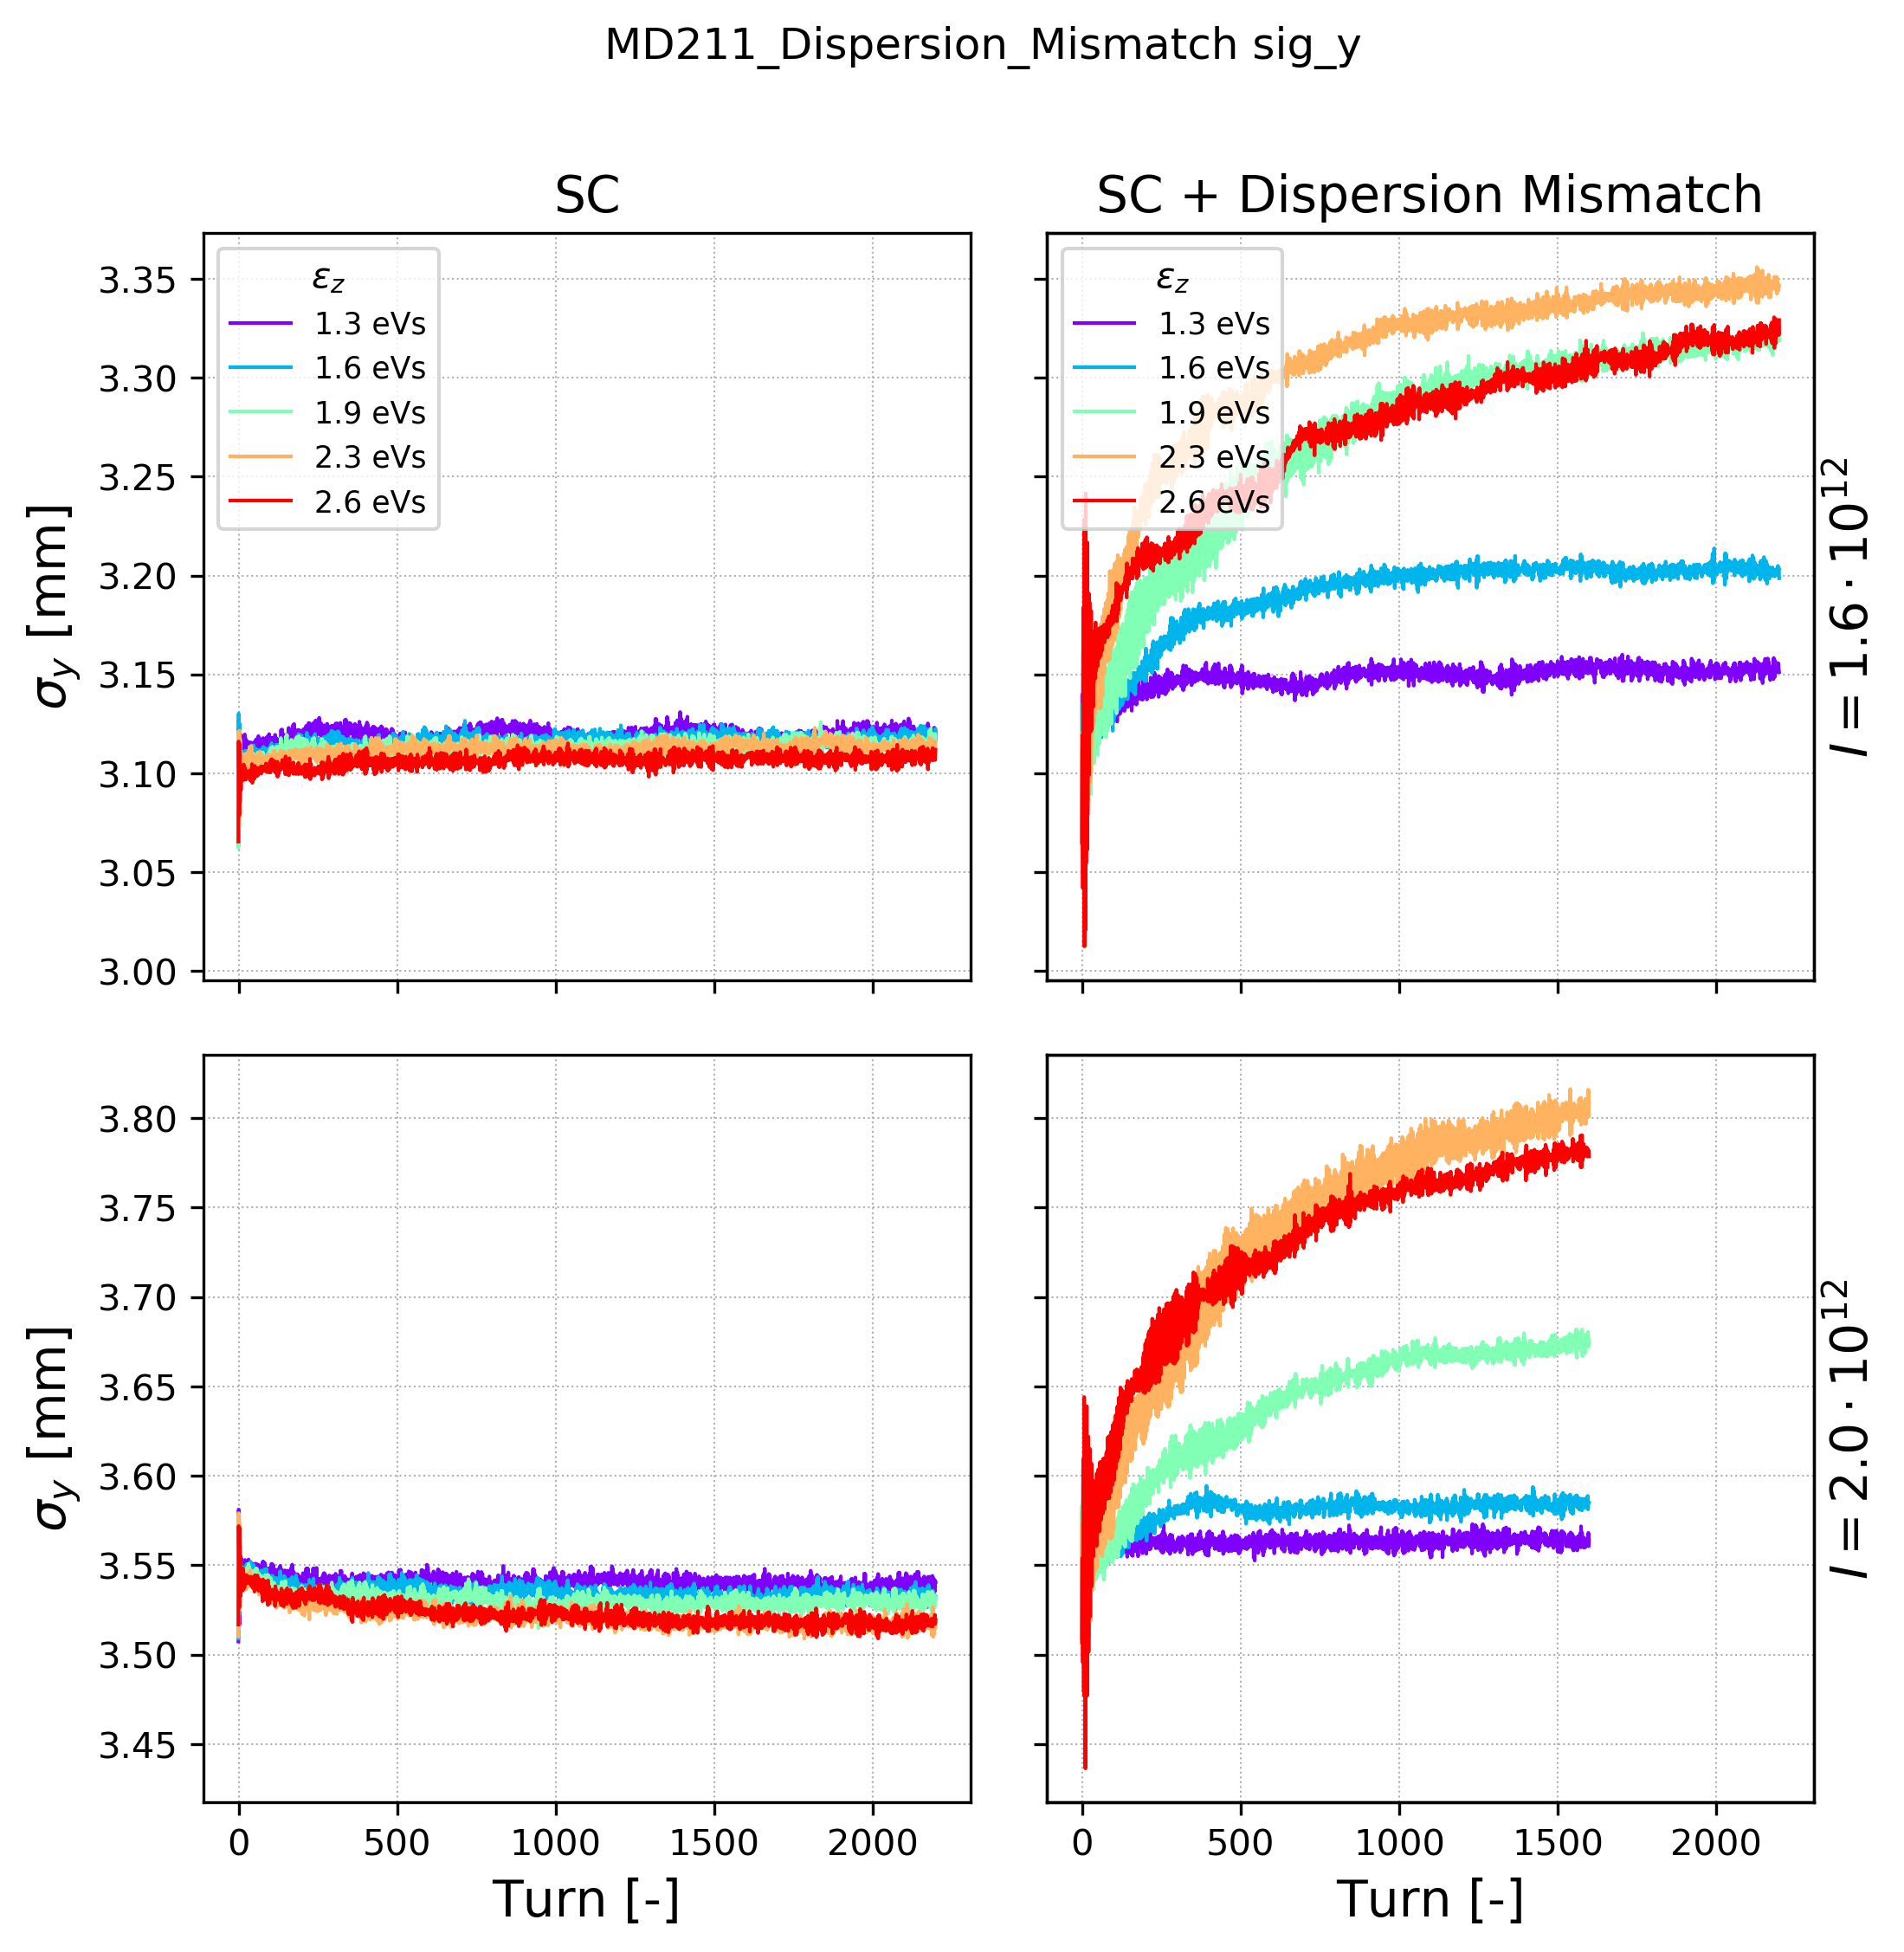

In [13]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

#    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_x  =  22.6  range =  0.229  =  1.01 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_x  =  22.6  range =  0.286  =  1.27 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_x  =  22.5  range =  0.203  =  0.902 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_x  =  22.5  range =  0.233  =  1.04 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_x  =  22.5  range =  0.201  =  0.893 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_x  =  22.5  range =  1.41  =  6.27 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_x  =  22.6  range =  1.36  =  6.02 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_x  =  22.5  range =  2.97  =  13.2 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_x  =  22.5  range =  5.11  =  22.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_x  =  22.6  range = 

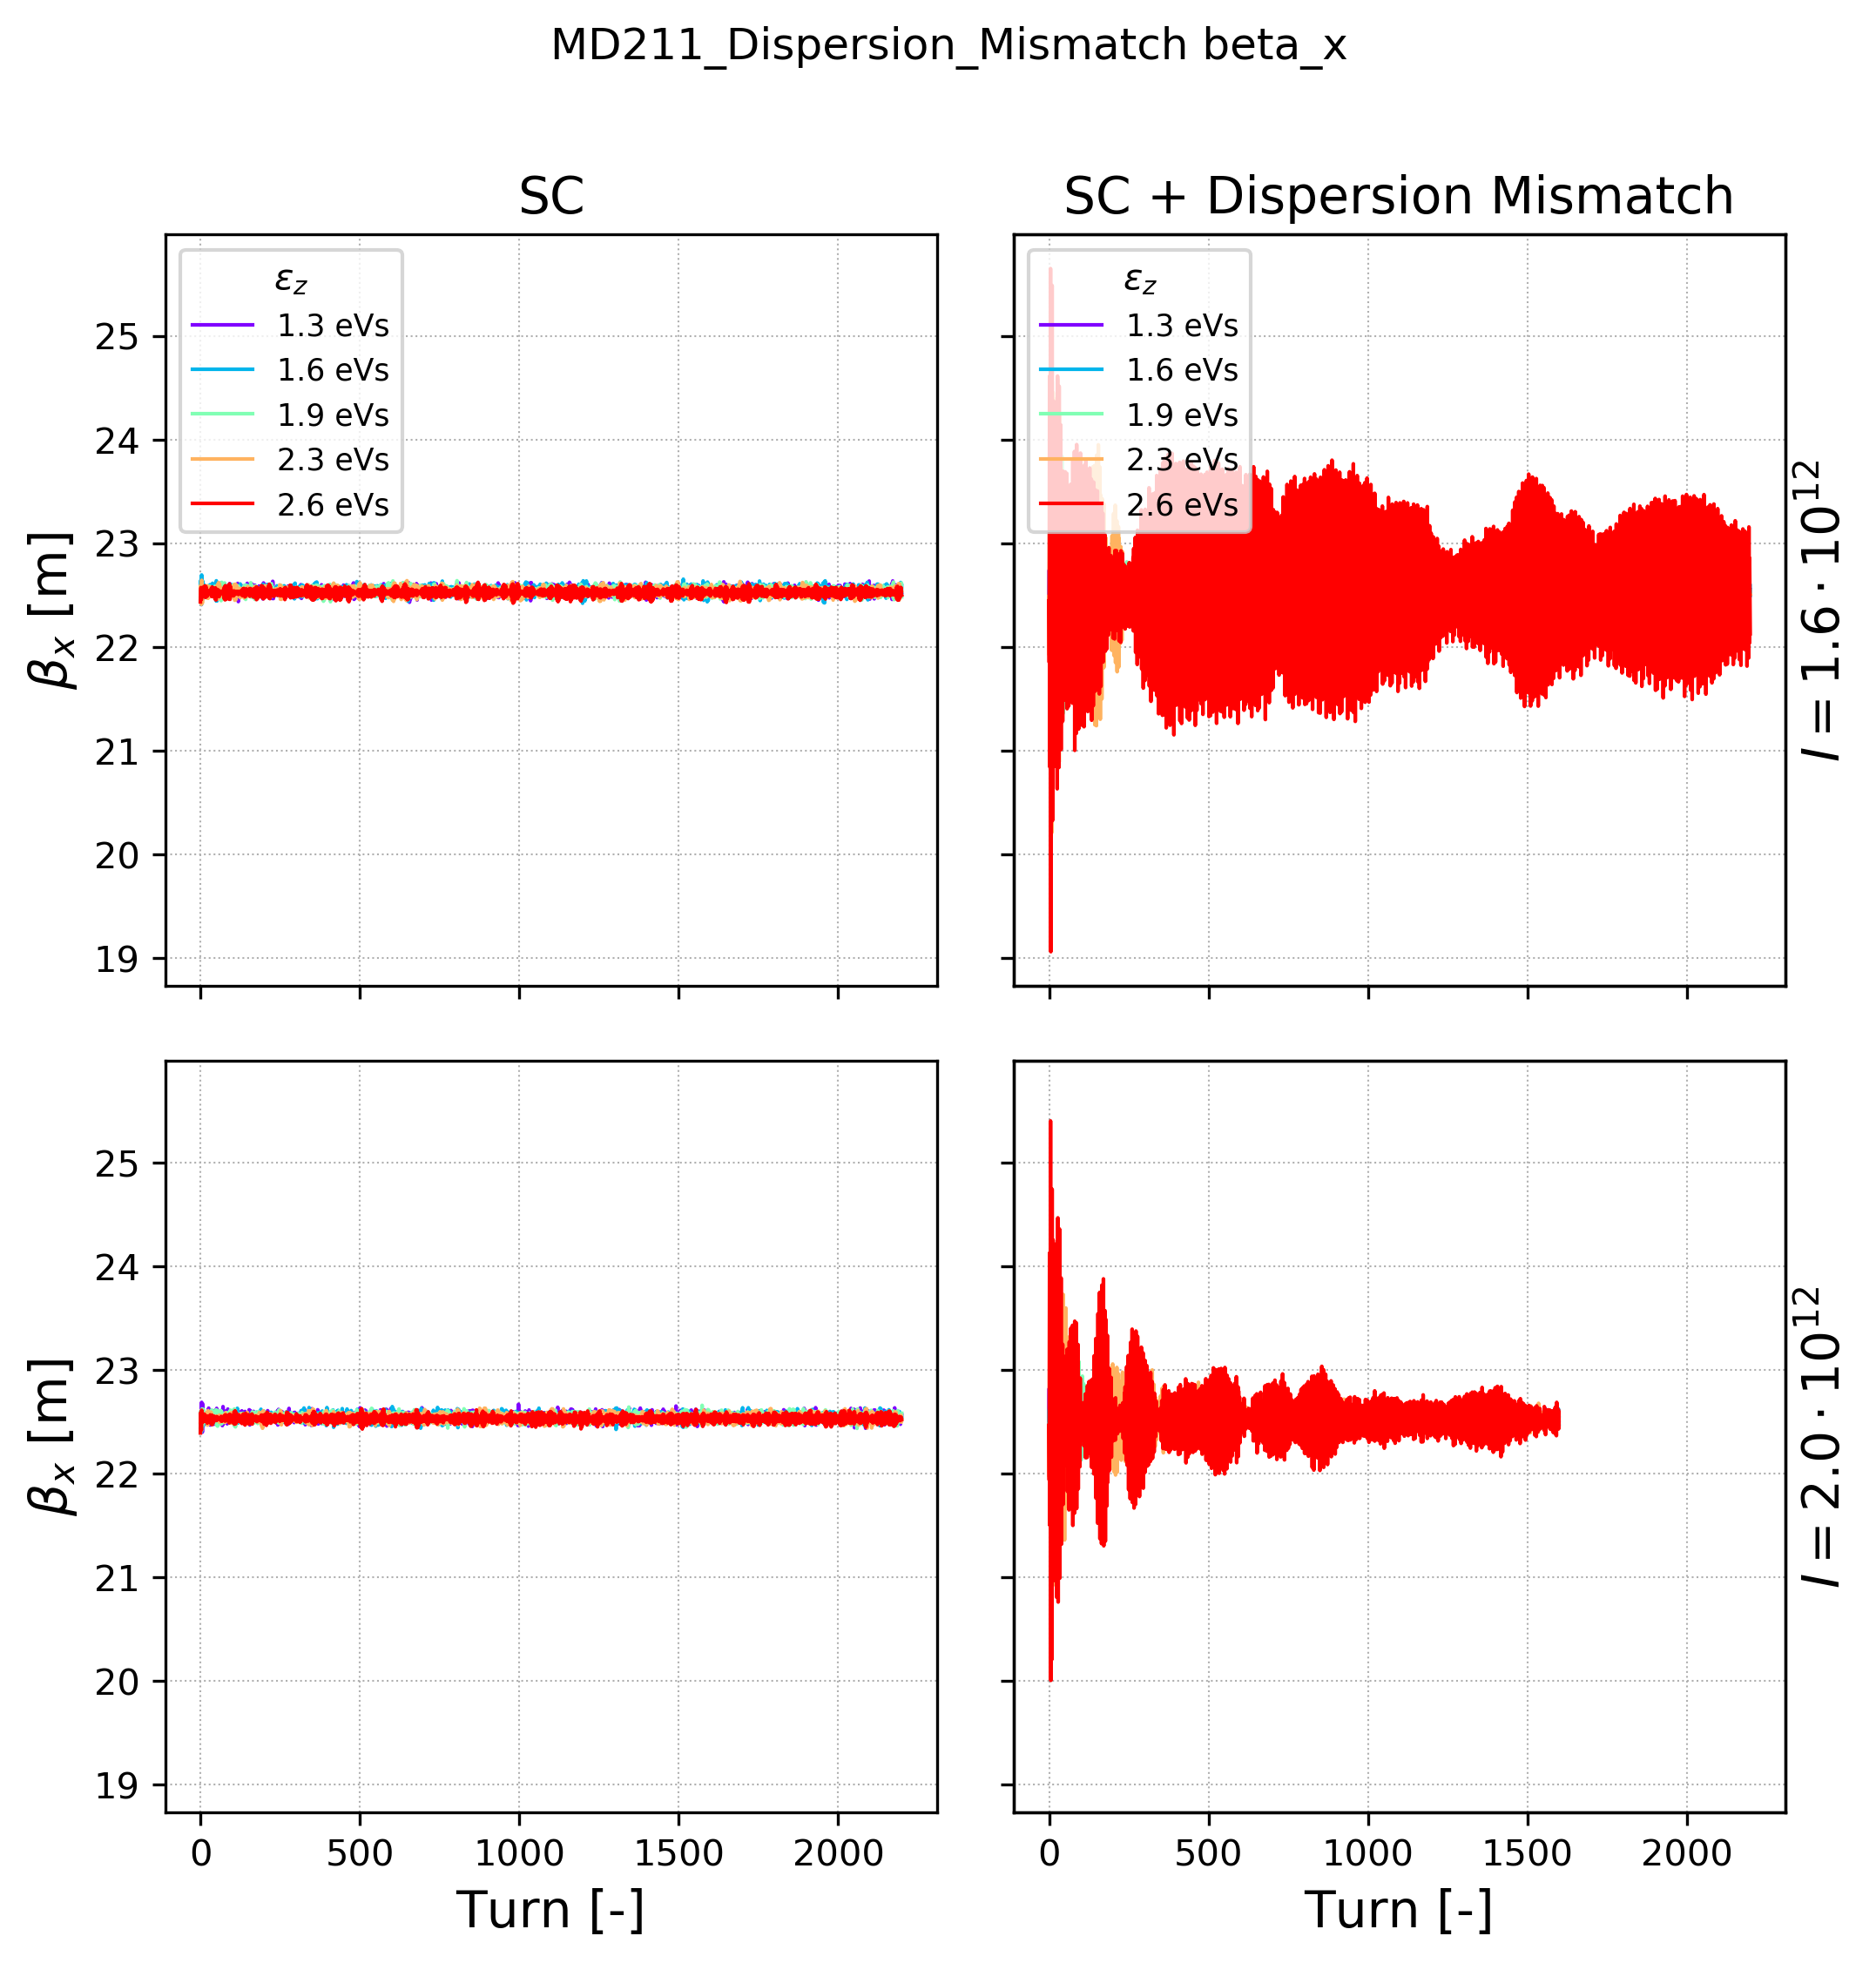

In [14]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_y  =  12.1  range =  0.471  =  3.9 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_y  =  12.0  range =  0.513  =  4.27 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_y  =  12.0  range =  0.449  =  3.74 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_y  =  12.0  range =  0.412  =  3.45 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_y  =  11.9  range =  0.39  =  3.27 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_y  =  12.0  range =  0.666  =  5.54 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_y  =  12.0  range =  0.641  =  5.36 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_y  =  11.9  range =  0.562  =  4.71 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_y  =  11.9  range =  1.39  =  11.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_y  =  11.9  range =  

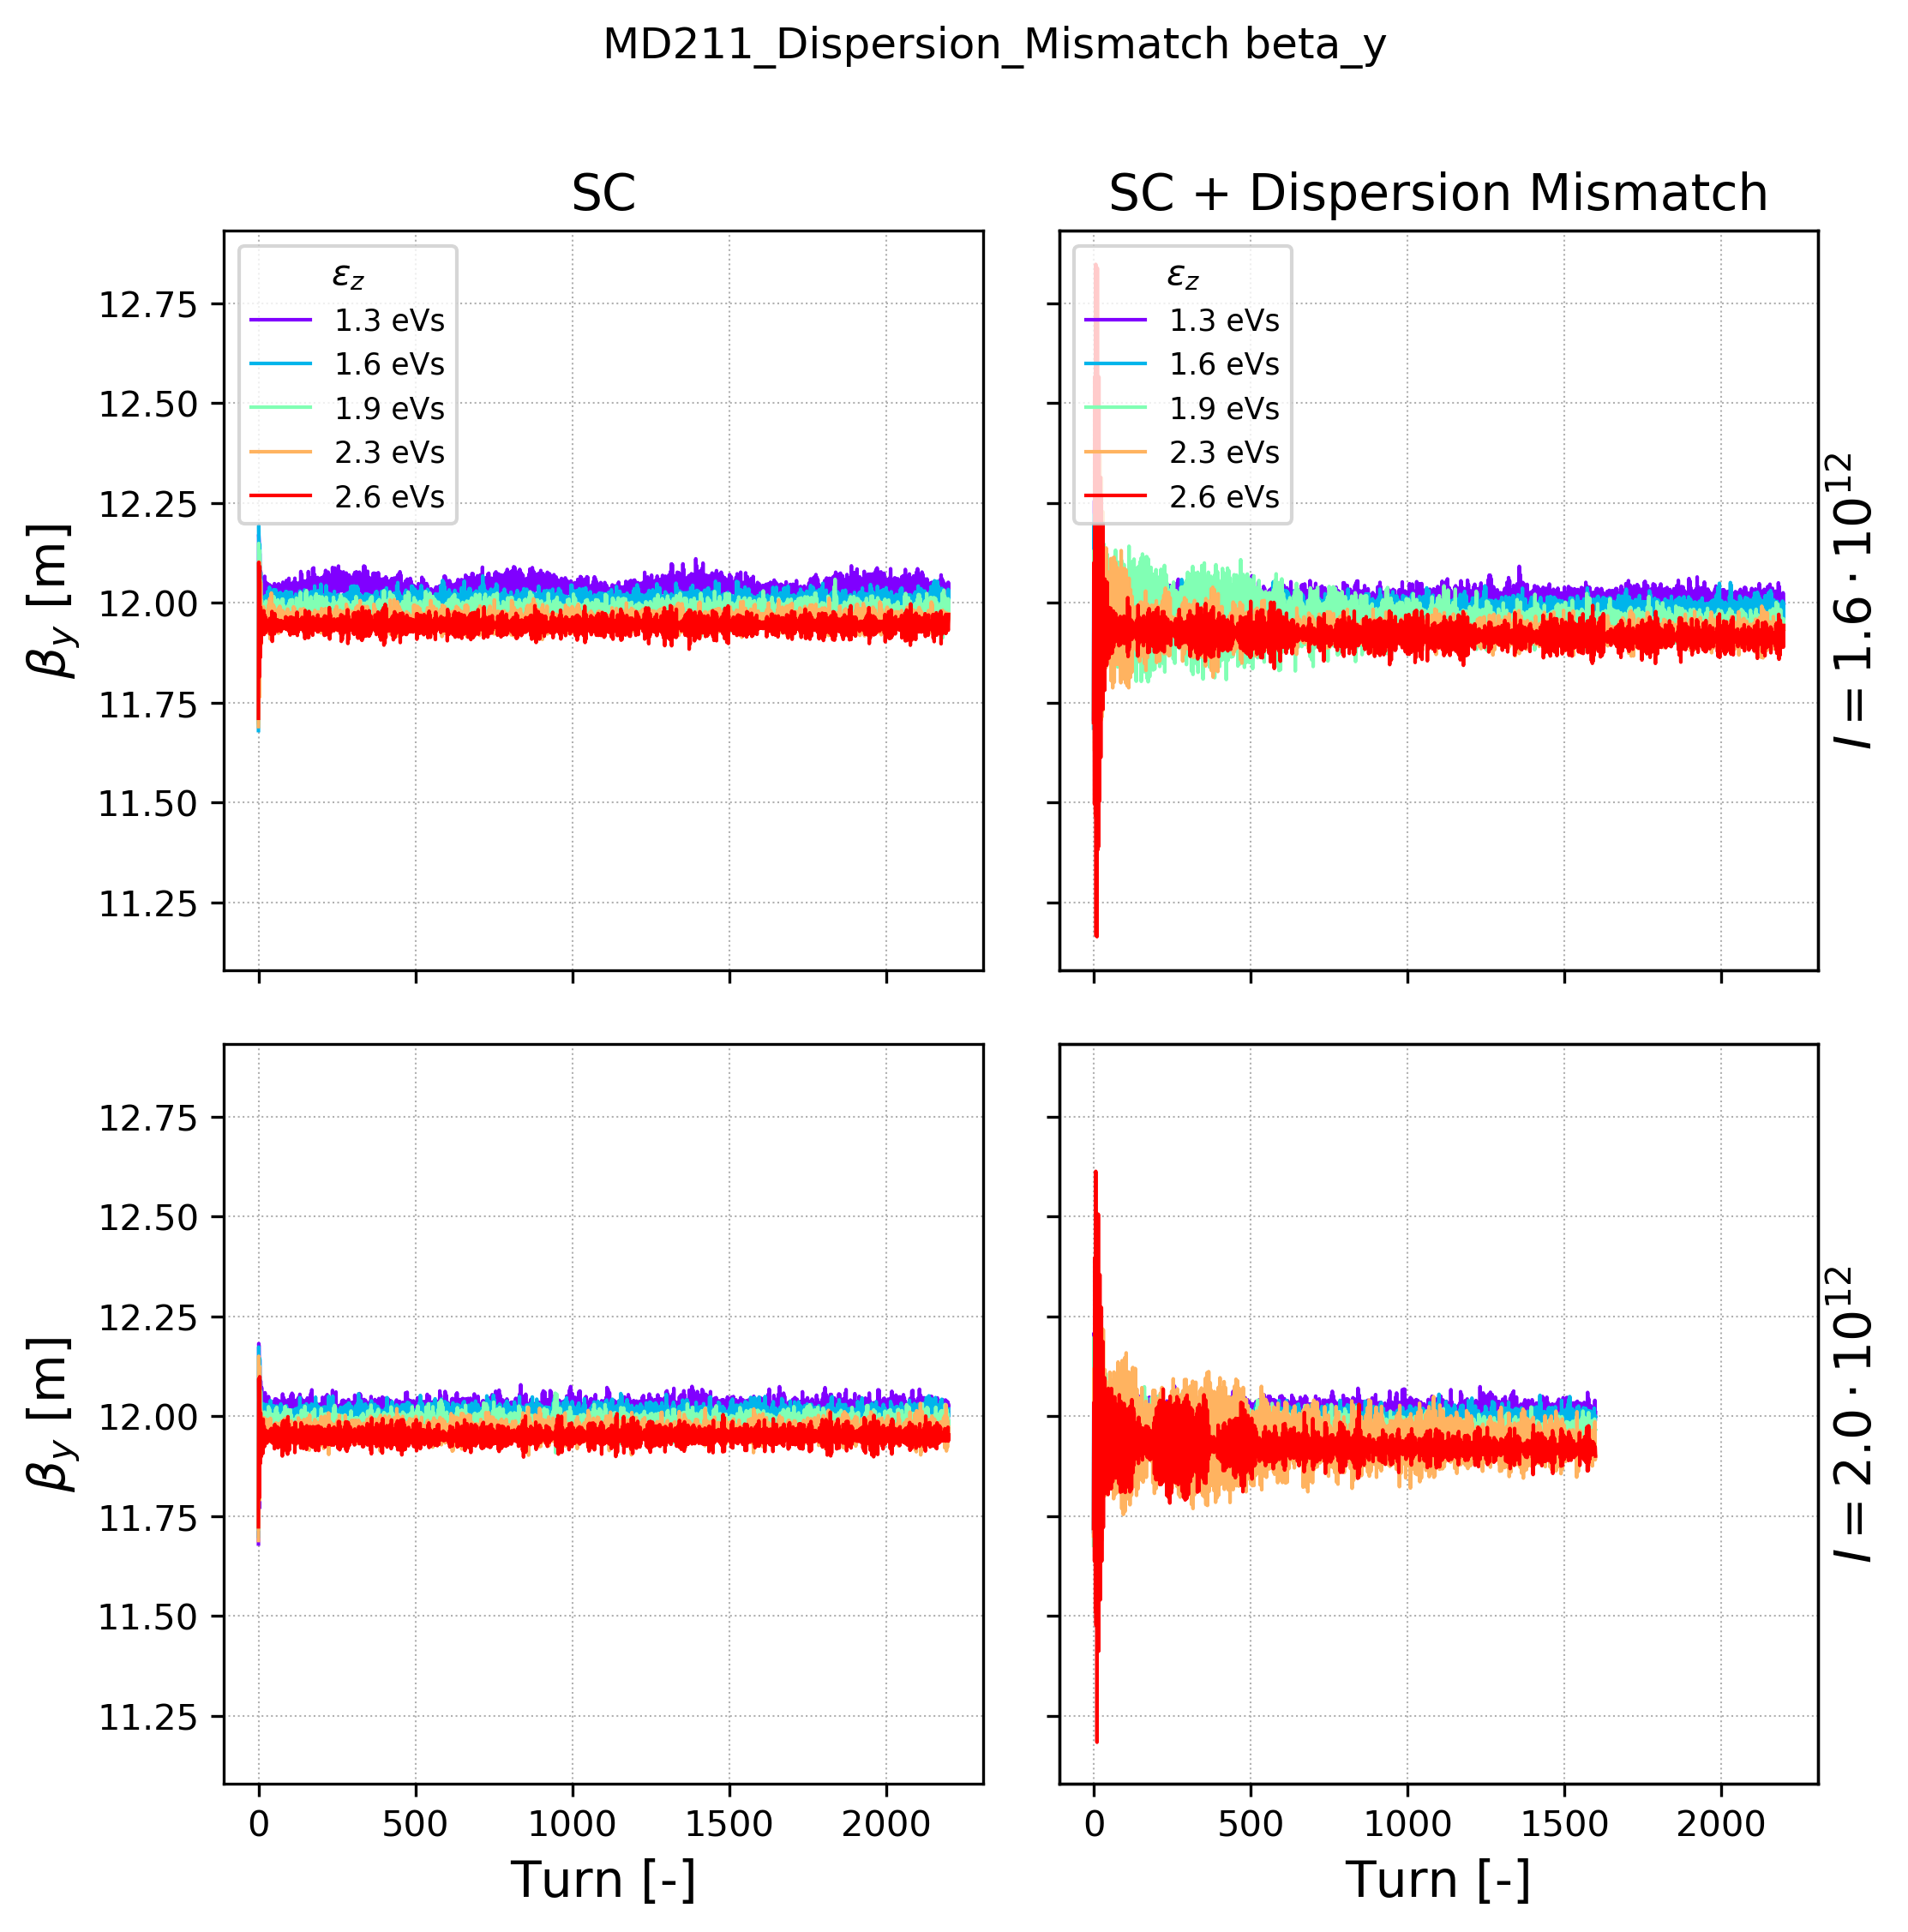

In [15]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_x  =  3.27  range =  0.232  =  7.11 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_x  =  3.25  range =  0.218  =  6.72 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_x  =  3.22  range =  0.154  =  4.77 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_x  =  3.2  range =  0.114  =  3.57 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_x  =  3.18  range =  0.106  =  3.32 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_x  =  3.25  range =  4.28  =  132.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_x  =  3.23  range =  4.02  =  124.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_x  =  3.44  range =  4.41  =  128.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_x  =  3.34  range =  4.37  =  131.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_x  =  3.36  range =  4.26  =  127.0 %
SC   $I = 2

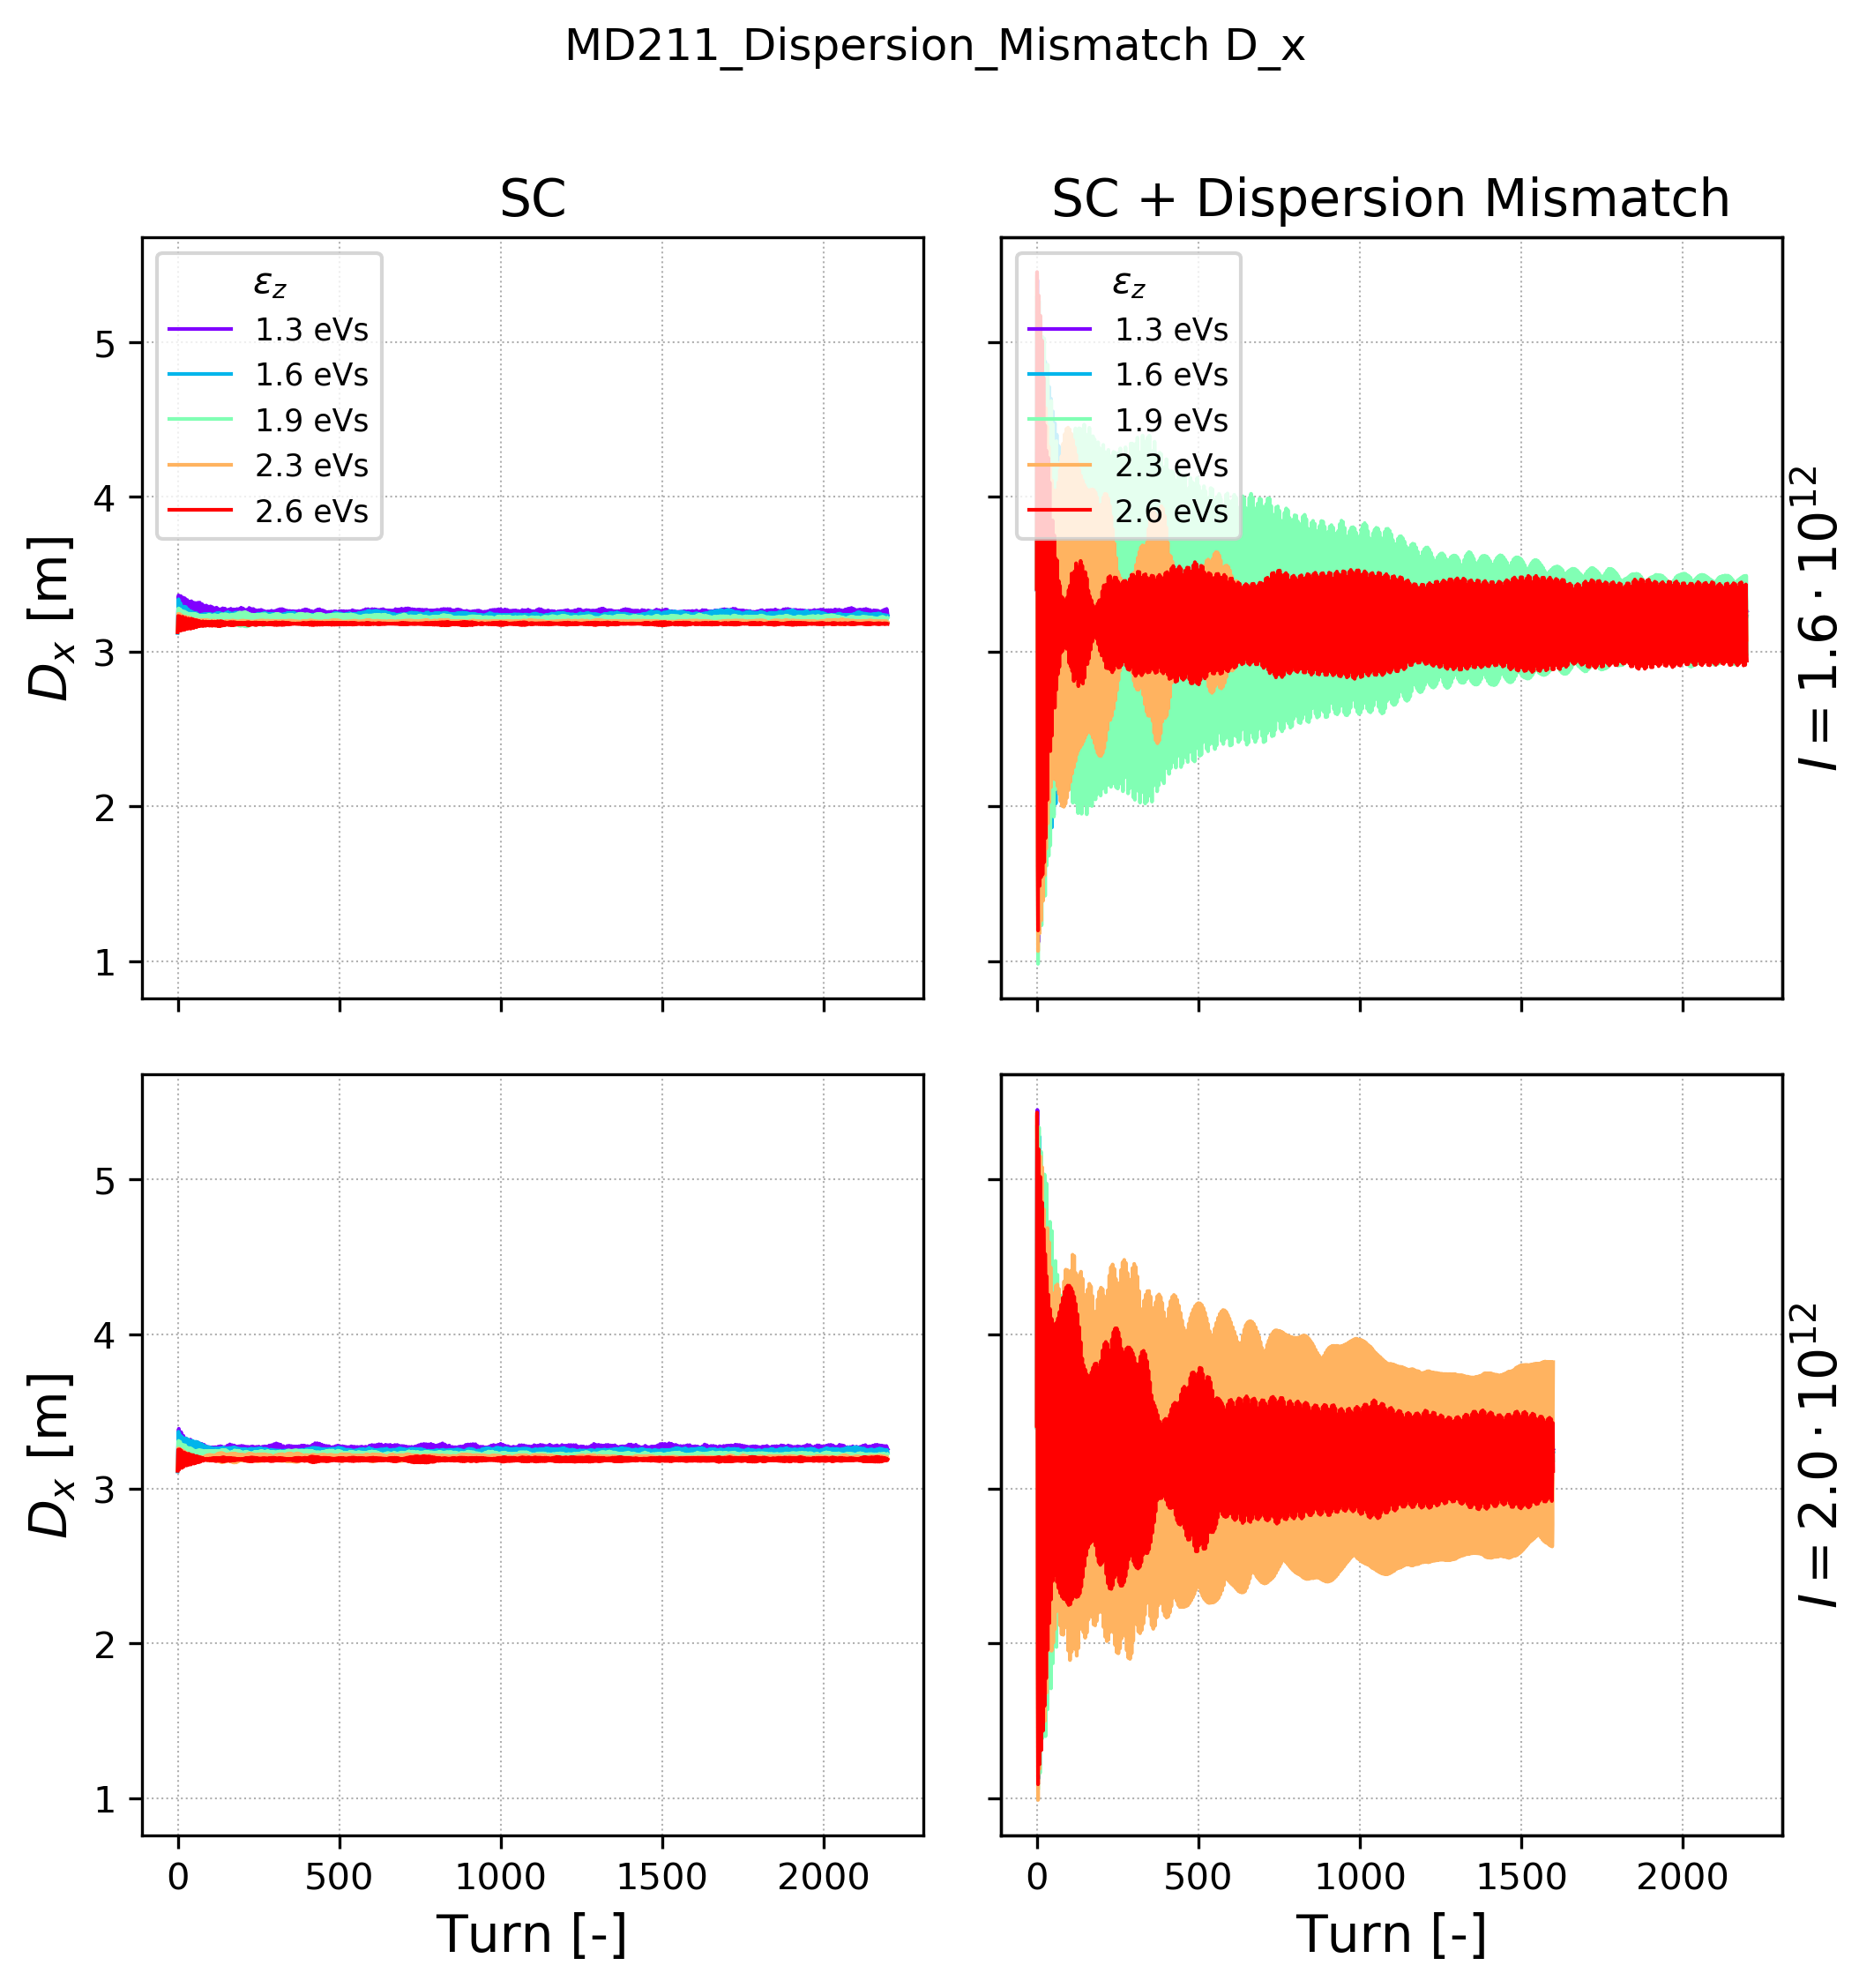

In [16]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

#ax1.set_xlim(0,10)
#ax2.set_xlim(0,10)

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_y  =  0.00287  range =  0.0385  =  1340.0 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_y  =  -0.00962  range =  0.0318  =  -330.0 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_y  =  -0.00484  range =  0.0256  =  -529.0 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_y  =  0.000169  range =  0.019  =  11200.0 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_y  =  0.00437  range =  0.0153  =  350.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_y  =  -0.013  range =  0.0399  =  -307.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_y  =  0.00466  range =  0.0245  =  525.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_y  =  0.000305  range =  0.0234  =  7660.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_y  =  0.00322  range =  0.0212  =  658.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Avera

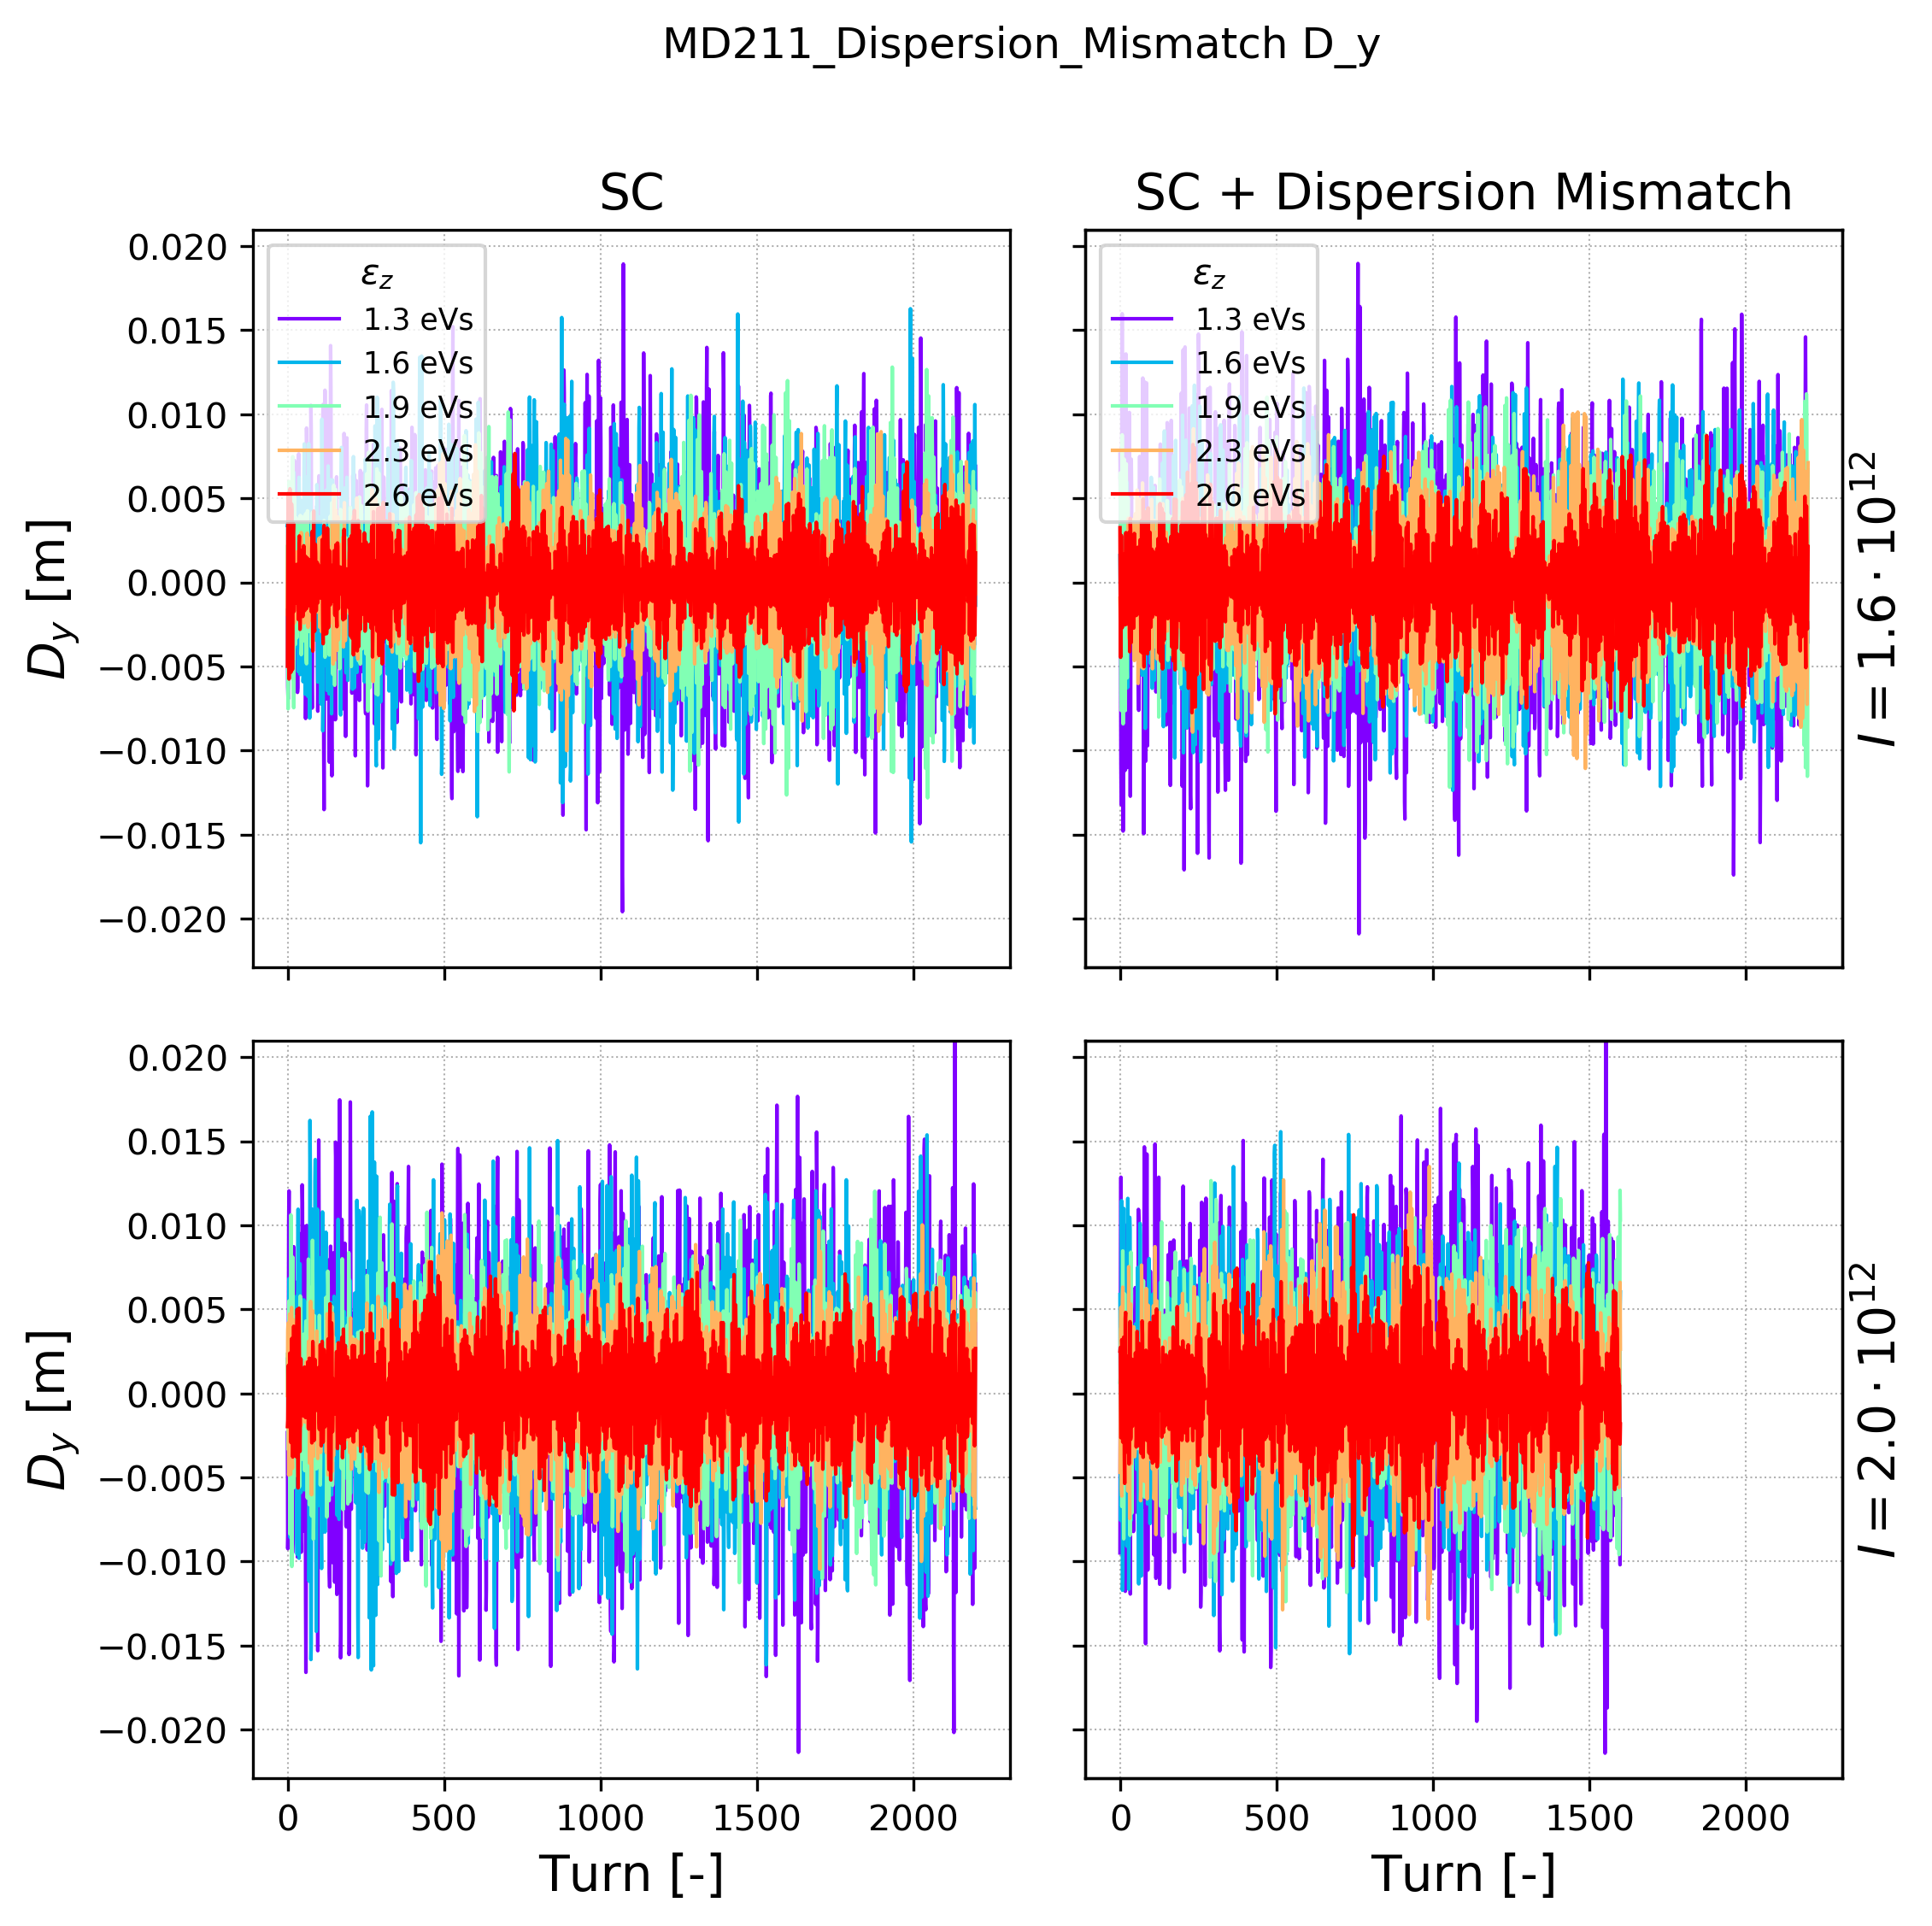

In [17]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  dpp_rms  =  0.838  range =  0.0688  =  8.21 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  dpp_rms  =  0.993  range =  0.00688  =  0.693 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  dpp_rms  =  1.26  range =  0.00592  =  0.47 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  dpp_rms  =  1.54  range =  0.00567  =  0.368 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  dpp_rms  =  1.75  range =  0.00861  =  0.491 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  dpp_rms  =  0.793  range =  0.0134  =  1.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  dpp_rms  =  0.993  range =  0.00689  =  0.694 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  dpp_rms  =  1.26  range =  0.00593  =  0.471 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  dpp_rms  =  1.54  range =  0.00504  =  0.327 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eV

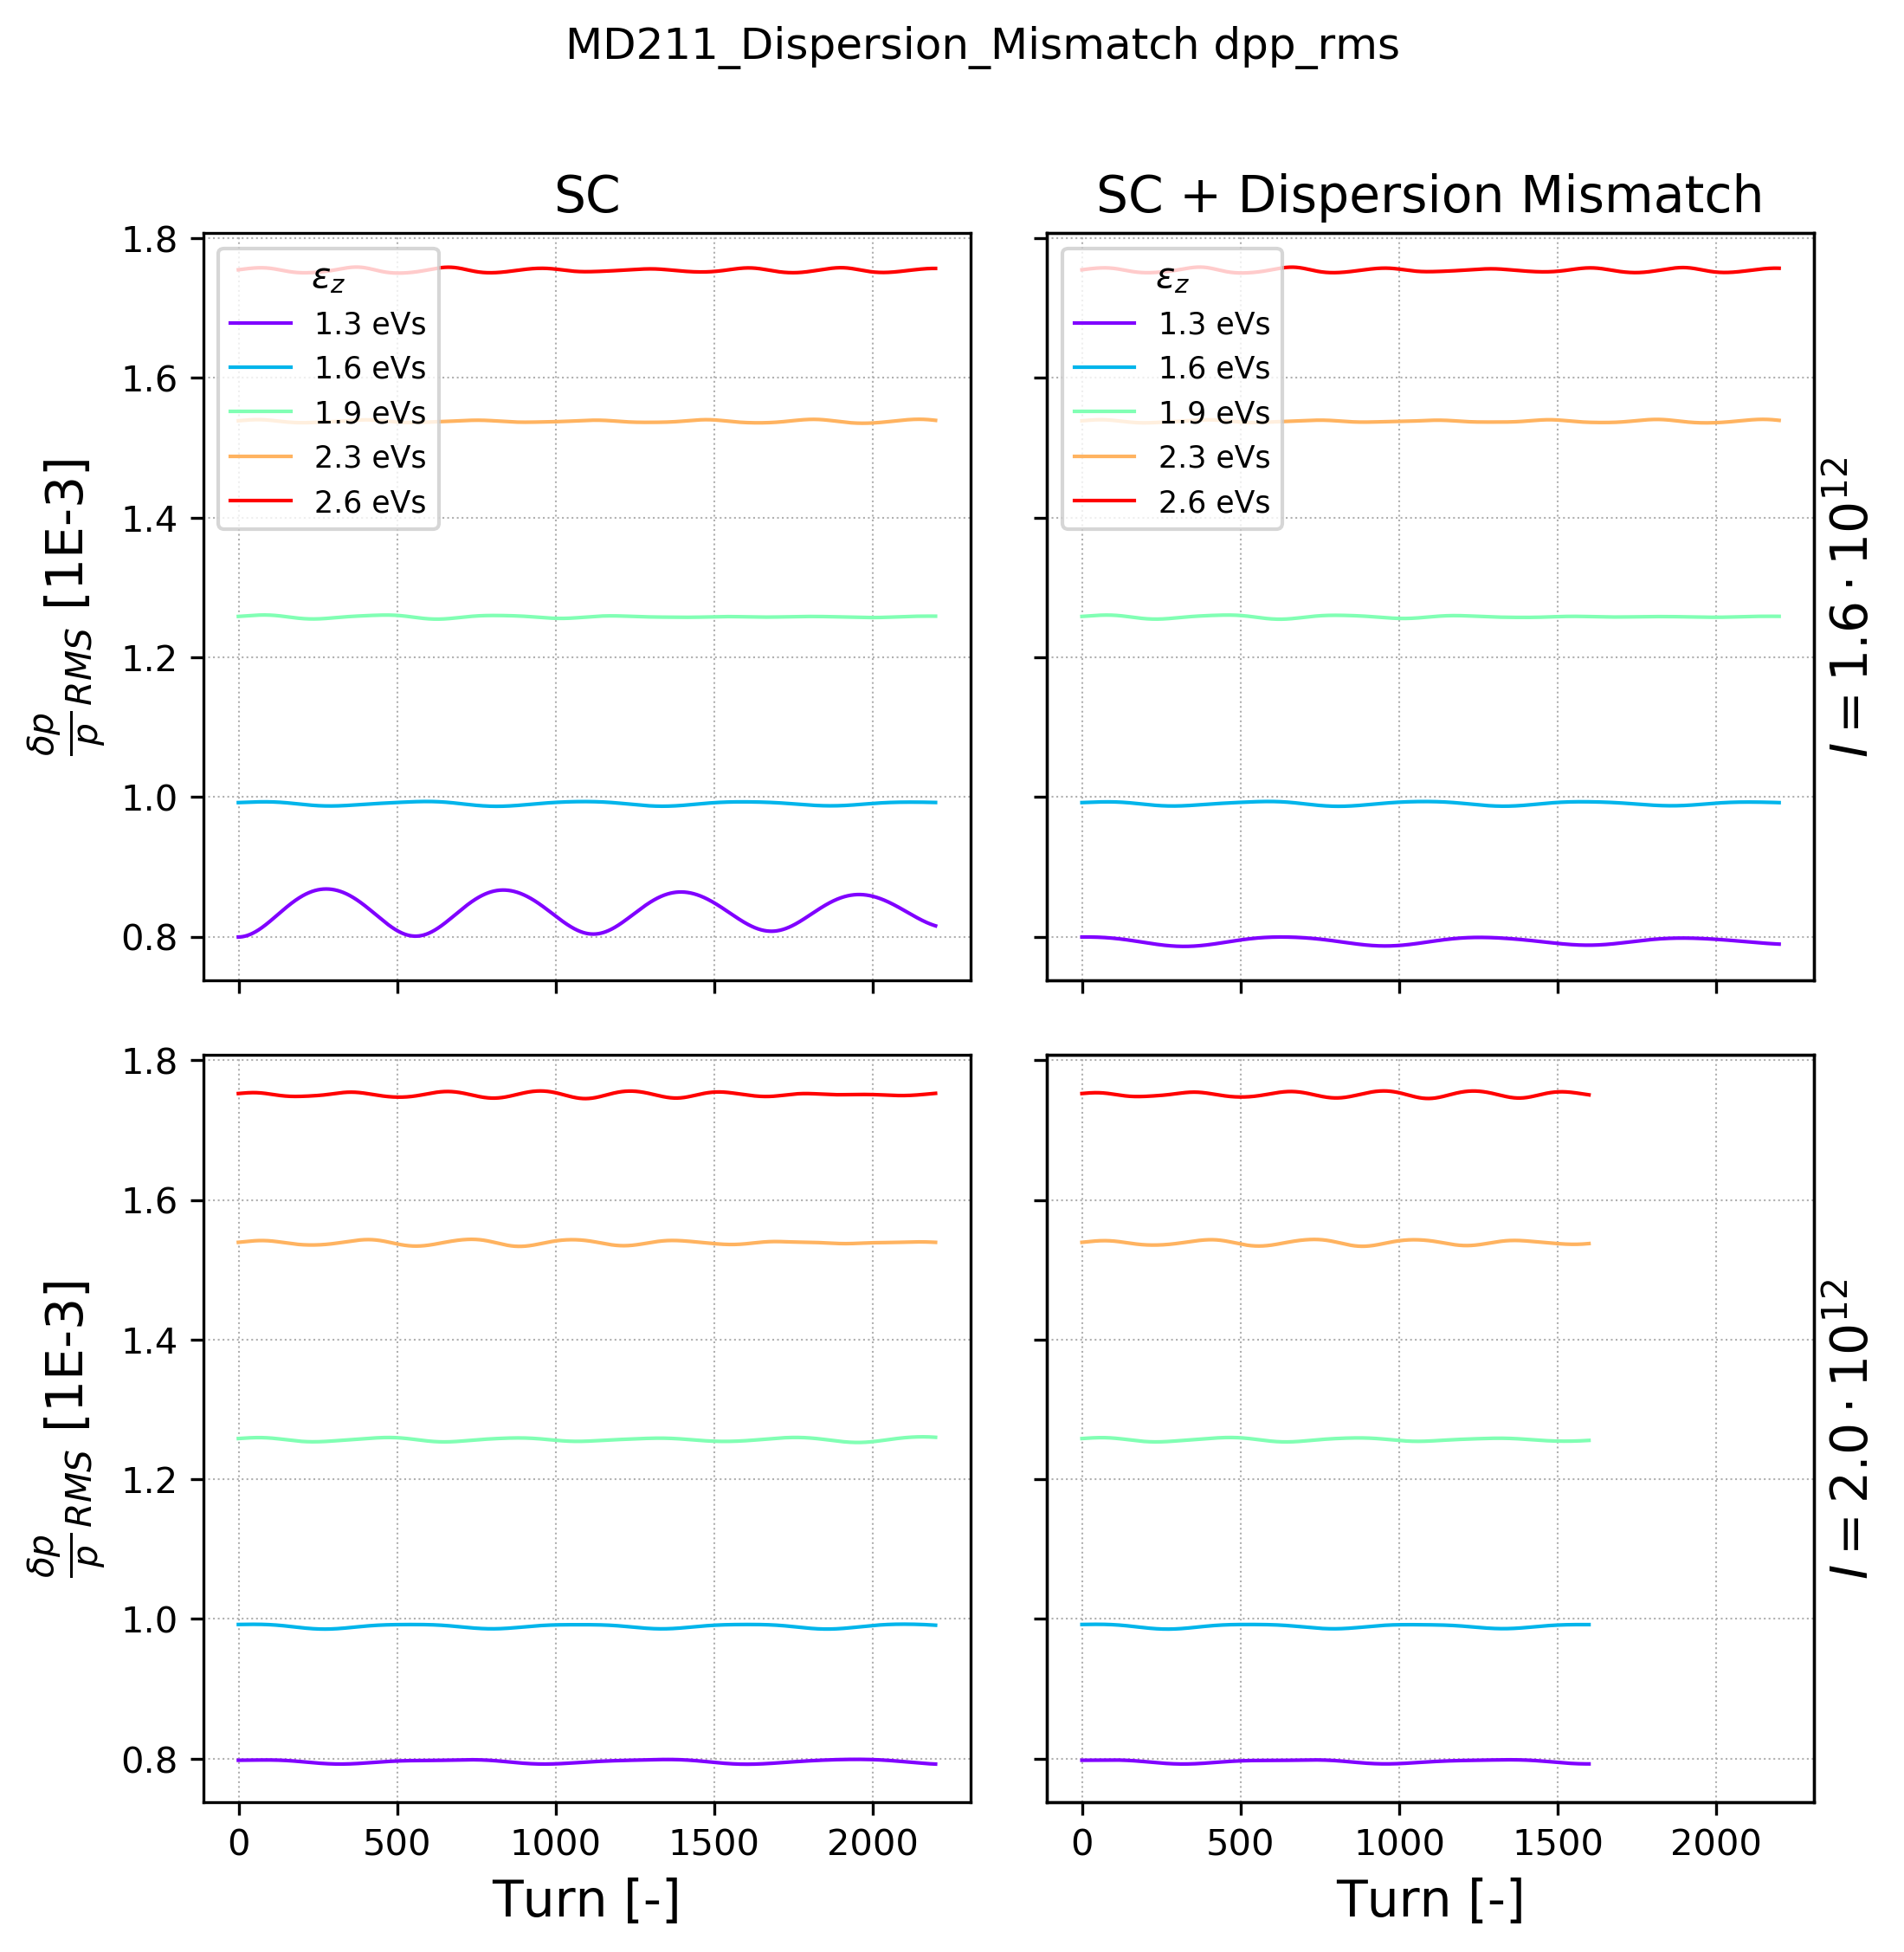

In [18]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  bunchlength  =  180.0  range =  15.0  =  8.34 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  bunchlength  =  188.0  range =  1.33  =  0.707 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  bunchlength  =  188.0  range =  0.784  =  0.418 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  bunchlength  =  187.0  range =  0.693  =  0.37 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  bunchlength  =  188.0  range =  0.92  =  0.49 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  bunchlength  =  189.0  range =  3.29  =  1.74 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  bunchlength  =  187.0  range =  1.32  =  0.706 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  bunchlength  =  188.0  range =  0.803  =  0.428 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  bunchlength  =  187.0  range =  0.618  =  0.33 %
SC + Dispersion Mismatch   $I = 1.6 \cdo

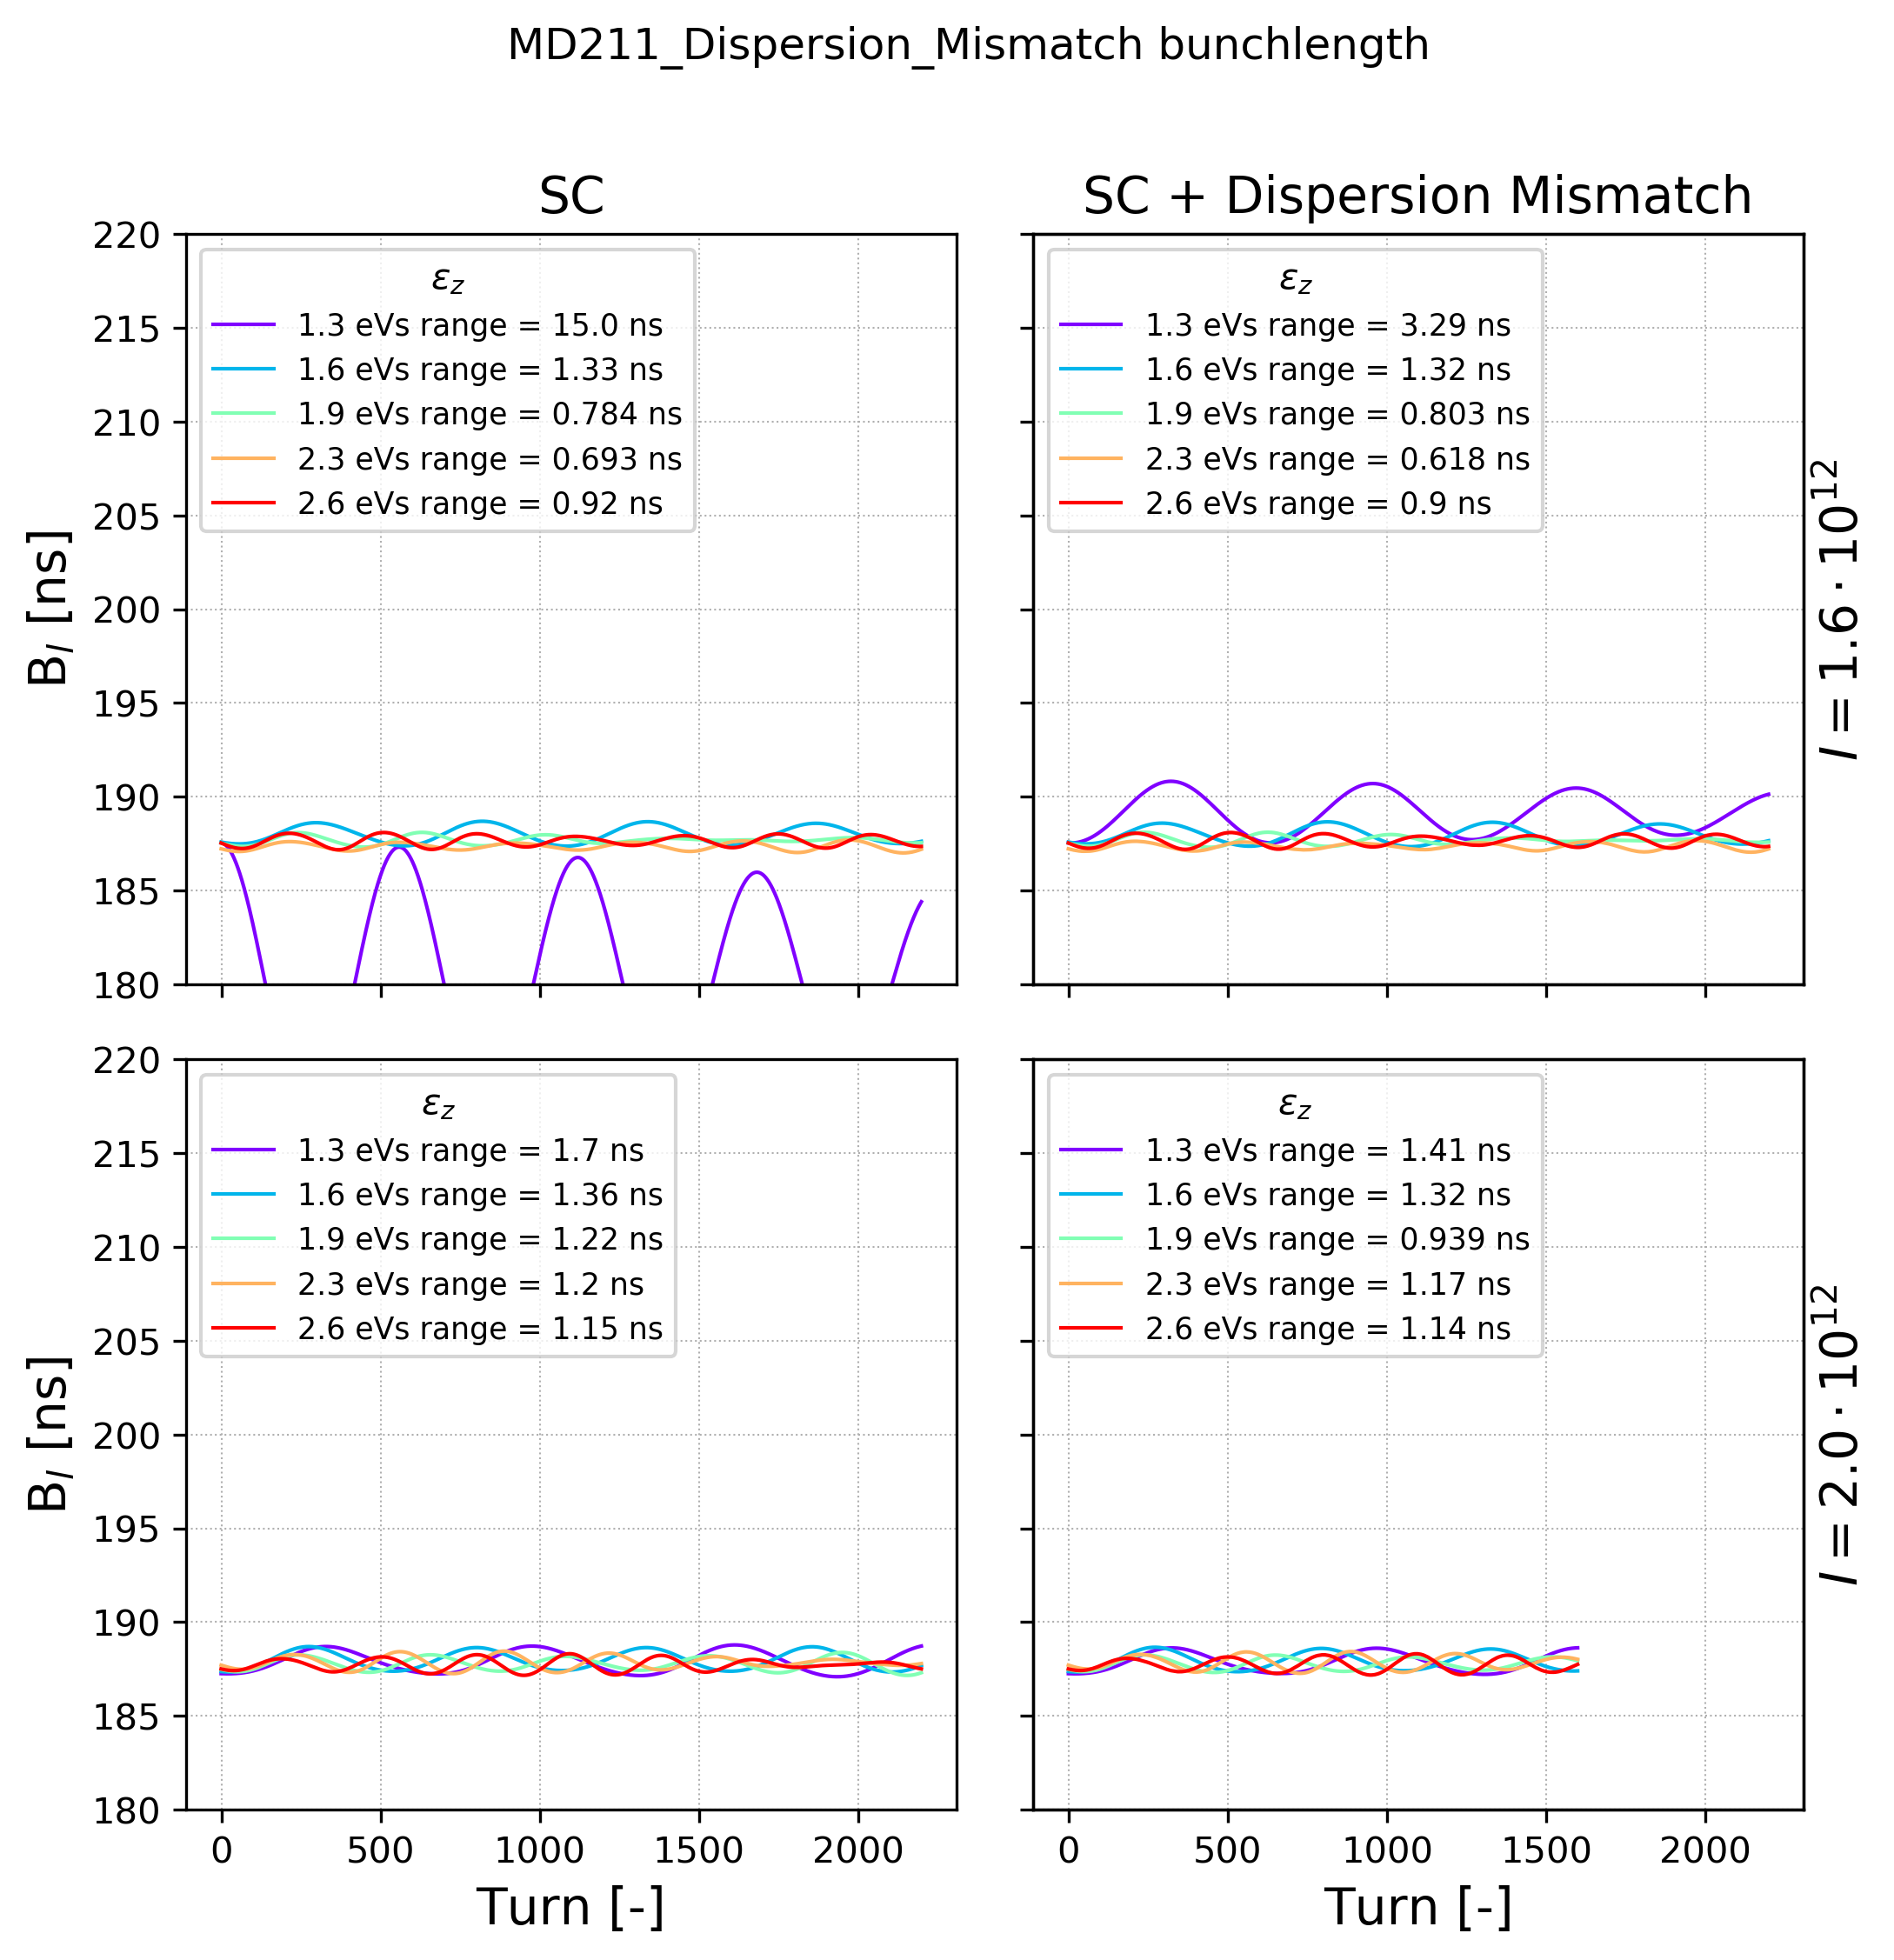

In [19]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):        
    av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
    rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
    print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    lab_ = key + ' range = ' + str(round_sig(rang_,3)) + ' ns'
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
    av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
    rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
    print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    lab_ = key + ' range = ' + str(round_sig(rang_,3)) + ' ns'
    ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;           
    
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
    av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
    rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
    print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    lab_ = key + ' range = ' + str(round_sig(rang_,3)) + ' ns'
    ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;     
    
ax3.grid(lw=0.5, ls=':');
ax3.legend(loc=2, title=legend_label, fontsize='small');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
    av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
    rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
    print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    lab_ = key + ' range = ' + str(round_sig(rang_,3)) + ' ns'
    ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;     
    
ax4.grid(lw=0.5, ls=':');
ax4.legend(loc=2, title=legend_label, fontsize='small');

ax1.set_ylim(180, 220)
ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_z  =  12.3  range =  1.03  =  8.34 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_z  =  12.9  range =  0.091  =  0.707 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_z  =  12.9  range =  0.0538  =  0.418 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_z  =  12.8  range =  0.0475  =  0.37 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_z  =  12.9  range =  0.0632  =  0.49 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_z  =  13.0  range =  0.226  =  1.74 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_z  =  12.9  range =  0.0909  =  0.706 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_z  =  12.9  range =  0.0551  =  0.428 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_z  =  12.8  range =  0.0424  =  0.33 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_z  =  12.9  range =

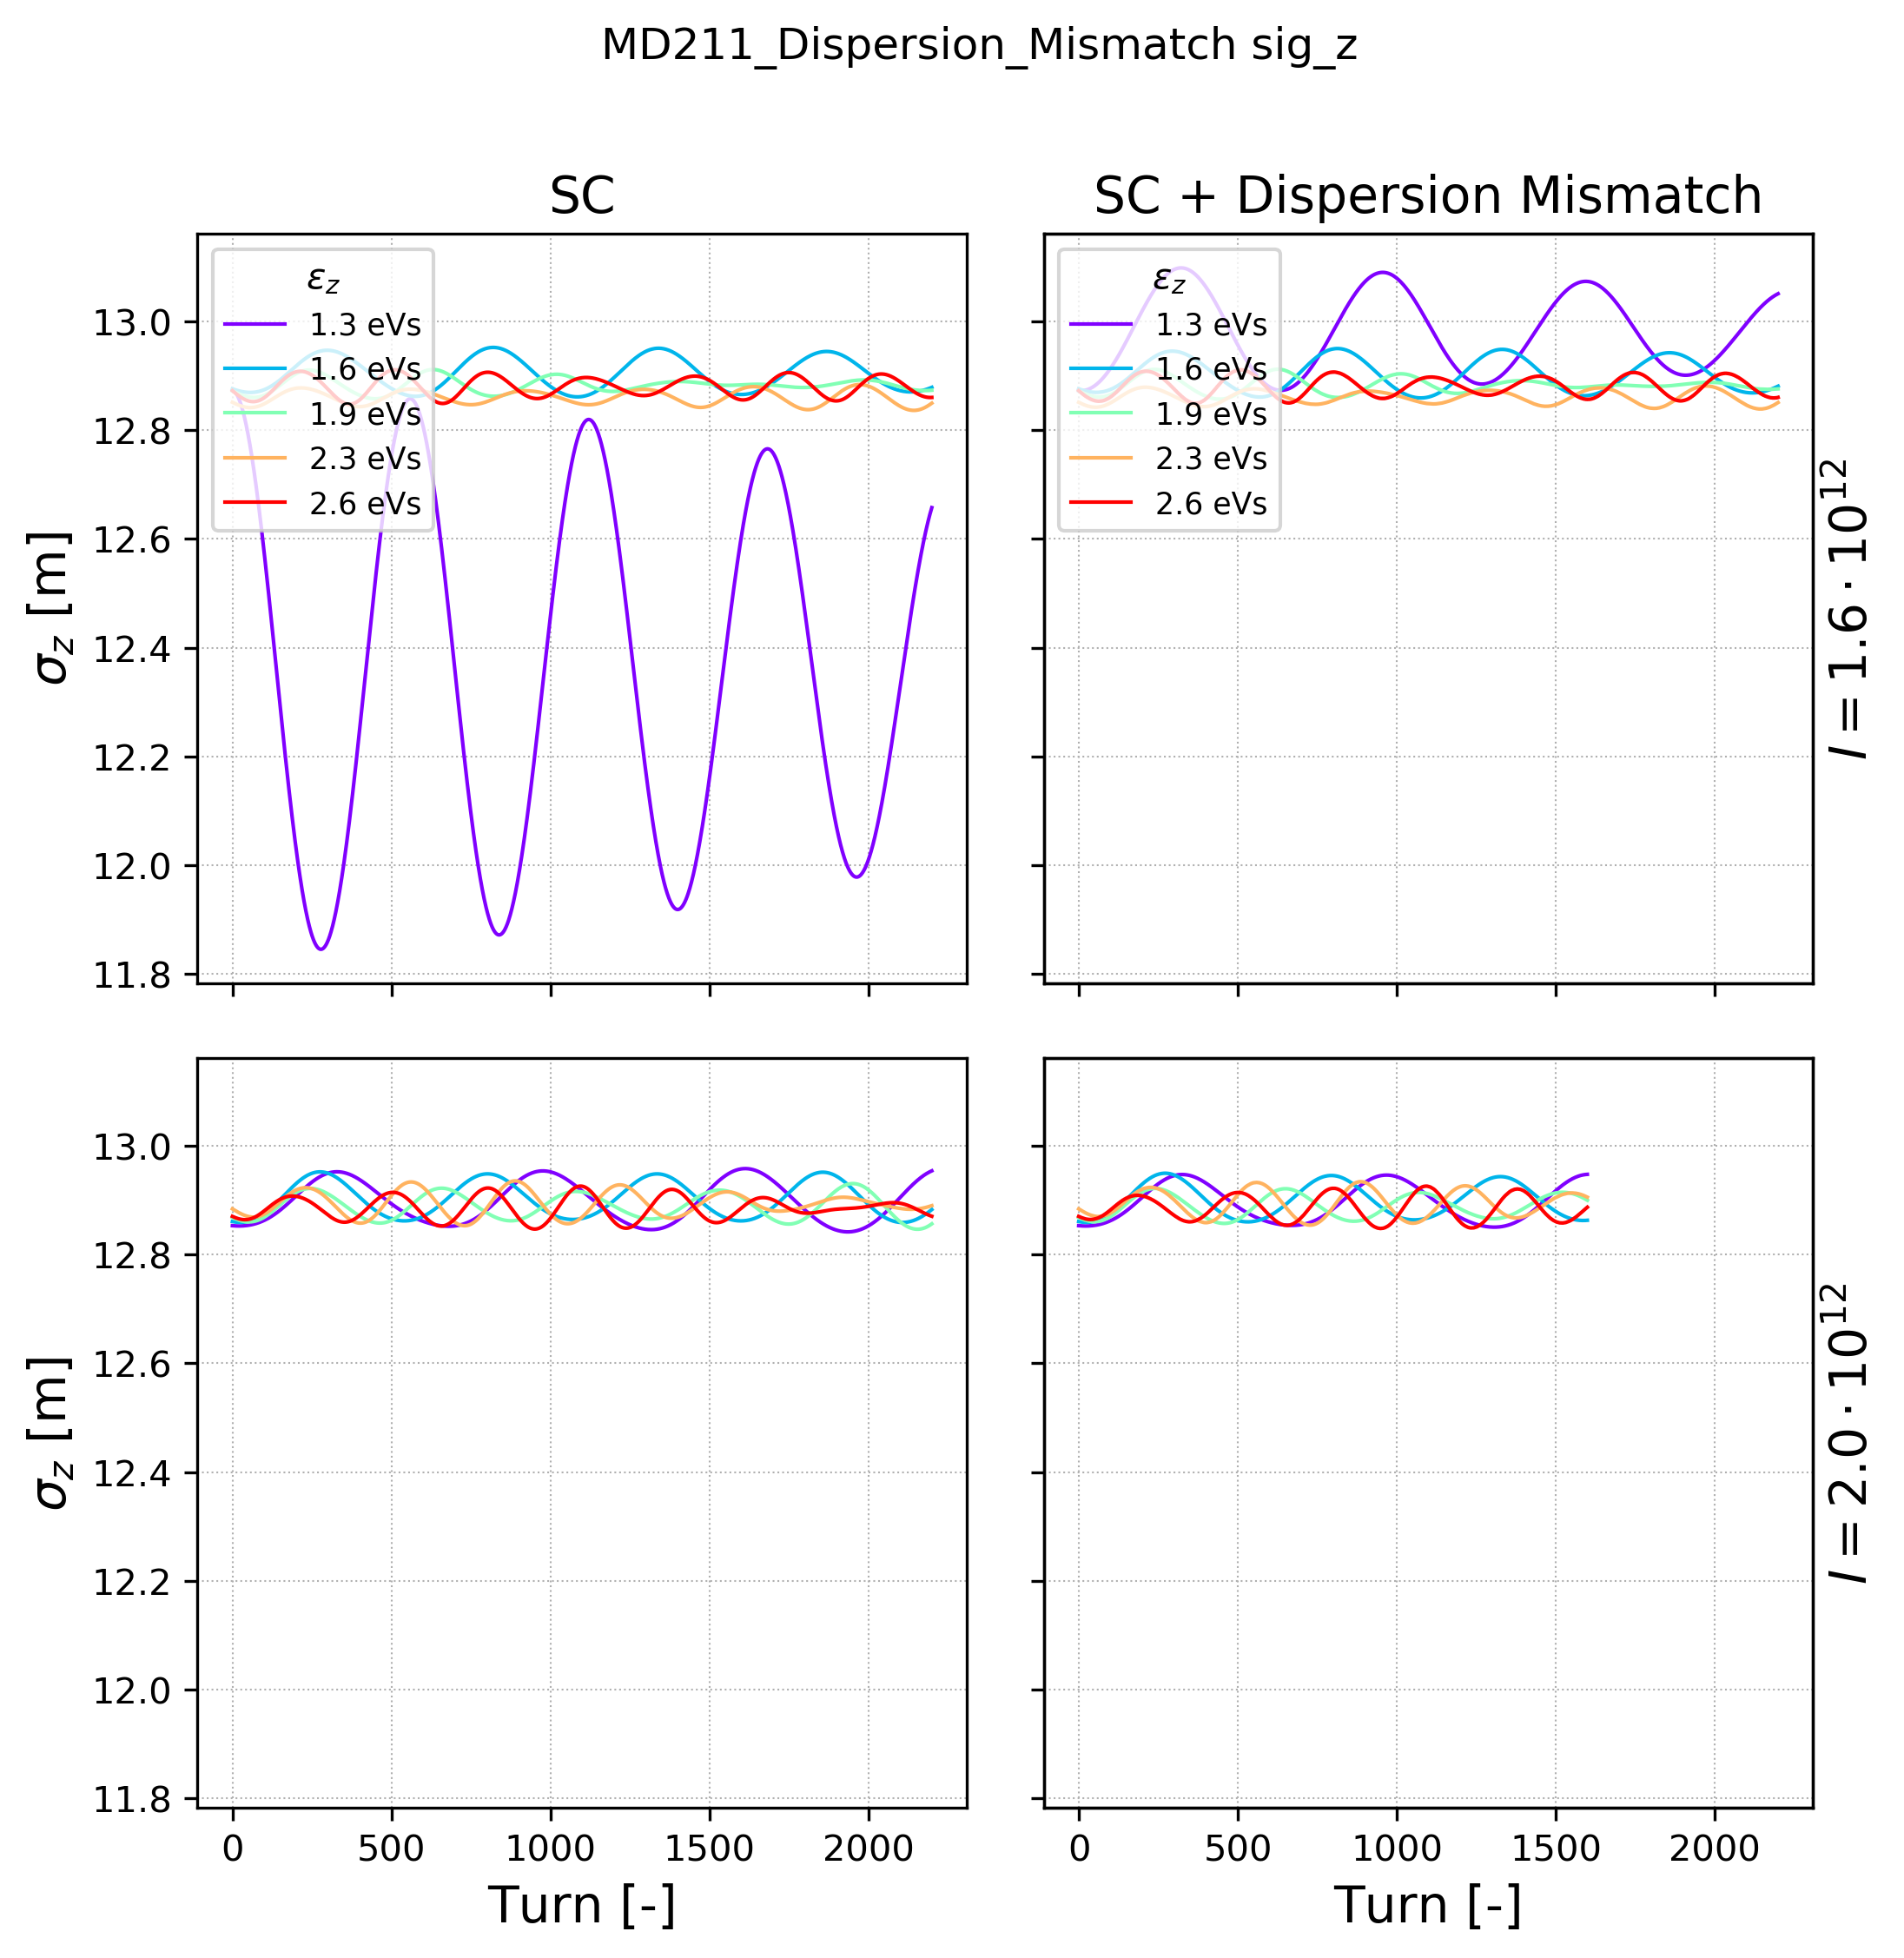

In [20]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  1.64  range =  0.135  =  8.21 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  1.95  range =  0.0135  =  0.693 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  2.47  range =  0.0116  =  0.47 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  3.02  range =  0.0111  =  0.368 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =  3.44  range =  0.0169  =  0.491 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  1.55  range =  0.0263  =  1.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  1.95  range =  0.0135  =  0.694 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  2.47  range =  0.0116  =  0.471 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  3.02  range =  0.00988  =  0.327 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =

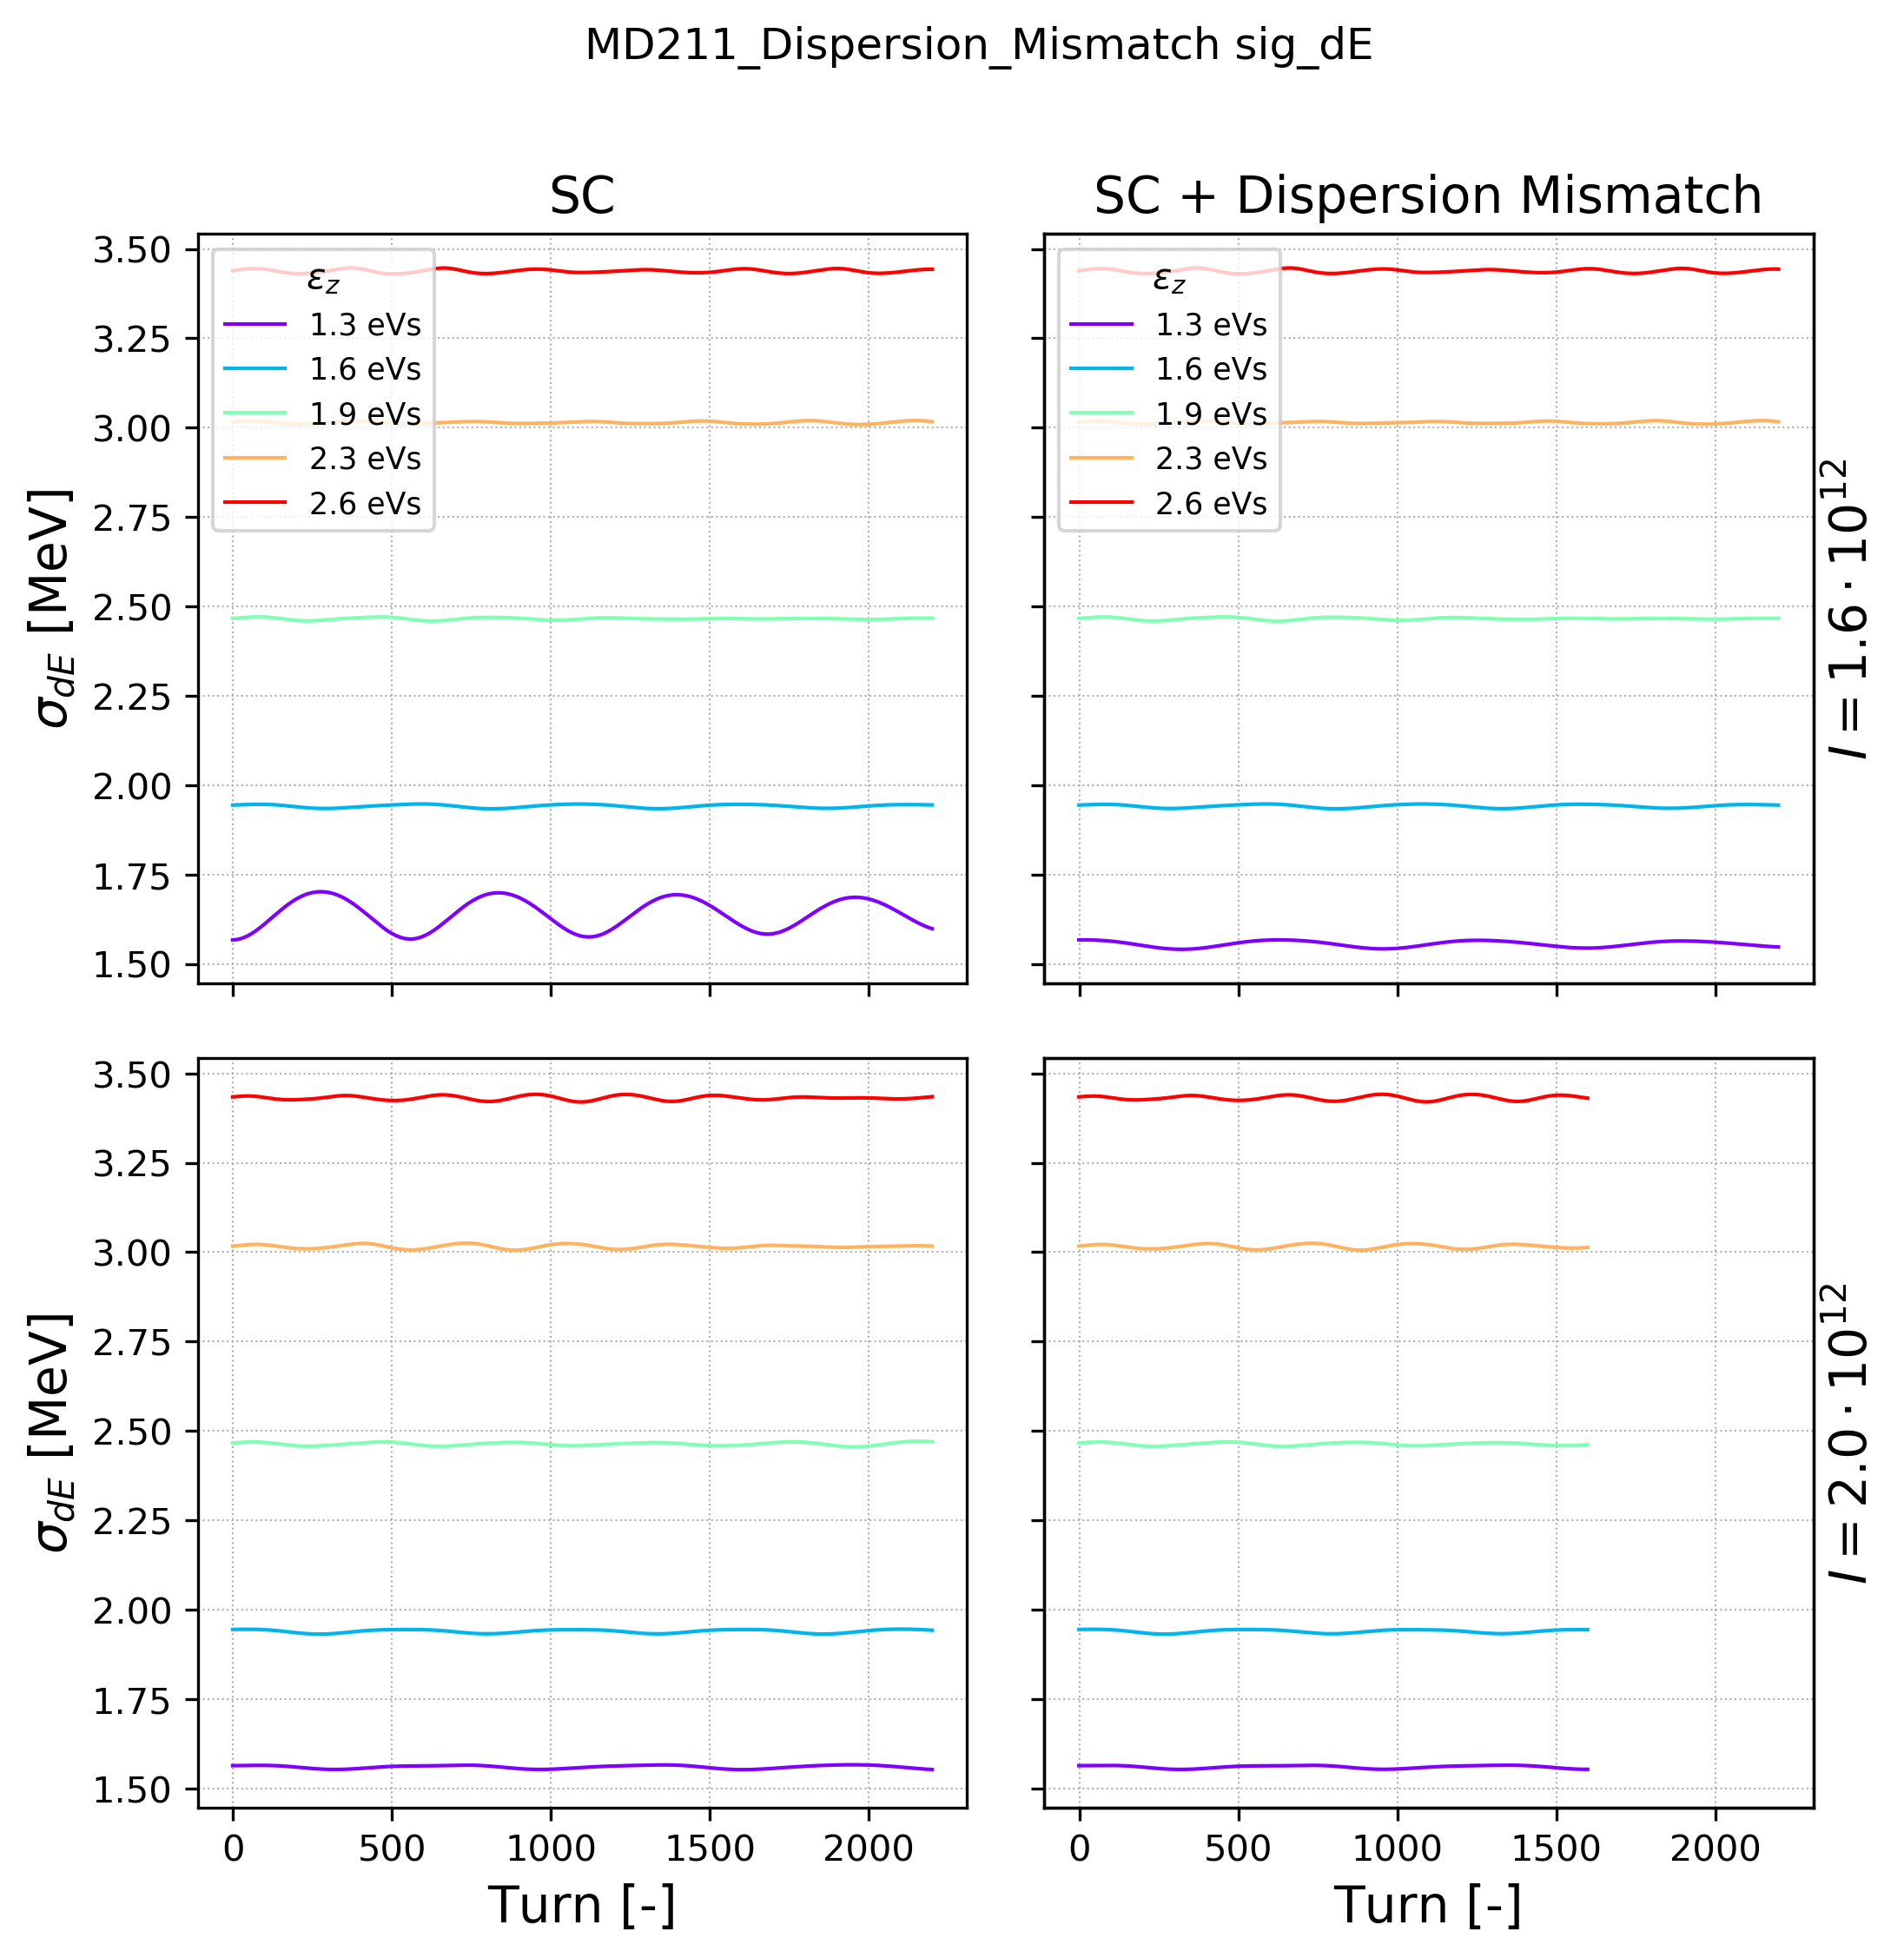

In [21]:
parameter = 'sig_dE'
multi1 = 1E3


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  0.00164  range =  0.000135  =  8.21 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  0.00195  range =  1.35e-05  =  0.693 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  0.00247  range =  1.16e-05  =  0.47 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  0.00302  range =  1.11e-05  =  0.368 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =  0.00344  range =  1.69e-05  =  0.491 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  0.00155  range =  2.63e-05  =  1.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  0.00195  range =  1.35e-05  =  0.694 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  0.00247  range =  1.16e-05  =  0.471 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  0.00302  range =  9.88e-06  =  0.327 %
SC + Dispersion Mismatch   $I = 1.

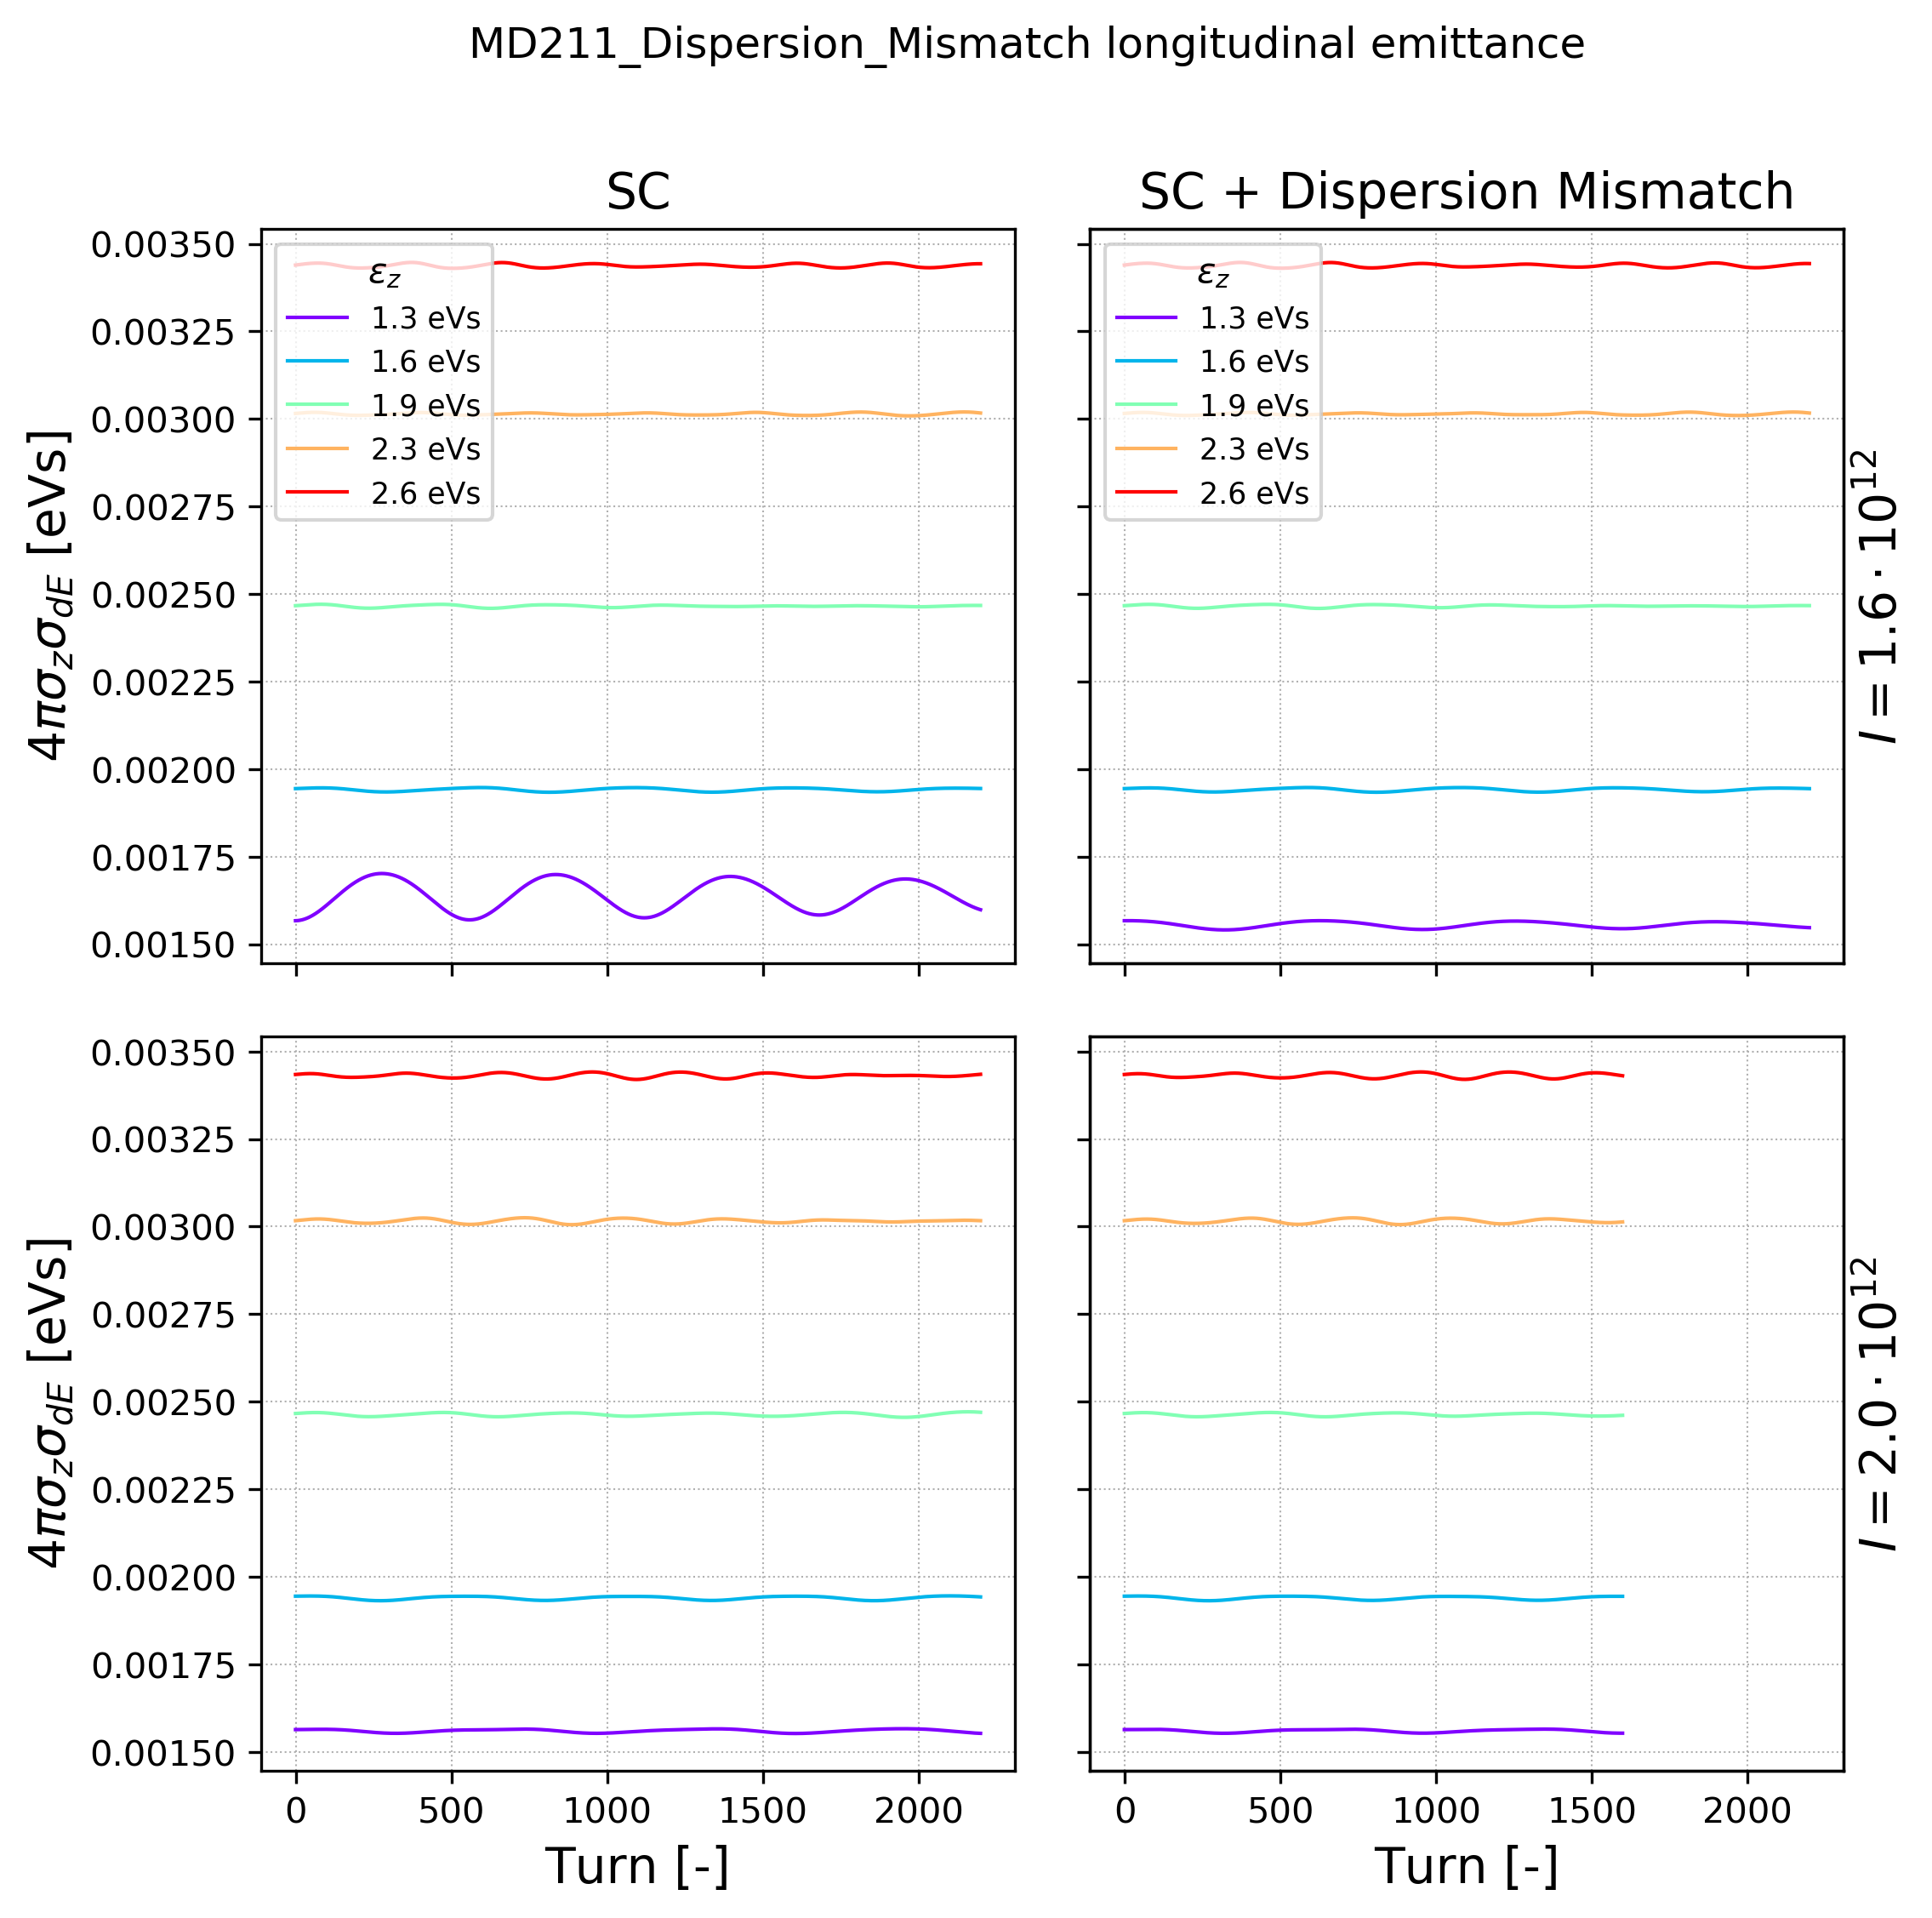

In [22]:
parameter1 = 'sig_z'
multi1 = 1
parameter2 = 'sig_dE'
multi2 = 10

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' longitudinal emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_manual_eps_z.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  eps_z  =  0.925  range =  0.00416  =  0.449 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  eps_z  =  1.15  range =  0.00119  =  0.104 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  eps_z  =  1.45  range =  0.00128  =  0.0884 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  eps_z  =  1.77  range =  0.000787  =  0.0444 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  eps_z  =  2.03  range =  0.00111  =  0.0547 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  eps_z  =  0.924  range =  0.00117  =  0.126 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  eps_z  =  1.15  range =  0.00113  =  0.099 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  eps_z  =  1.45  range =  0.0013  =  0.0897 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  eps_z  =  1.77  range =  0.000923  =  0.052 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average

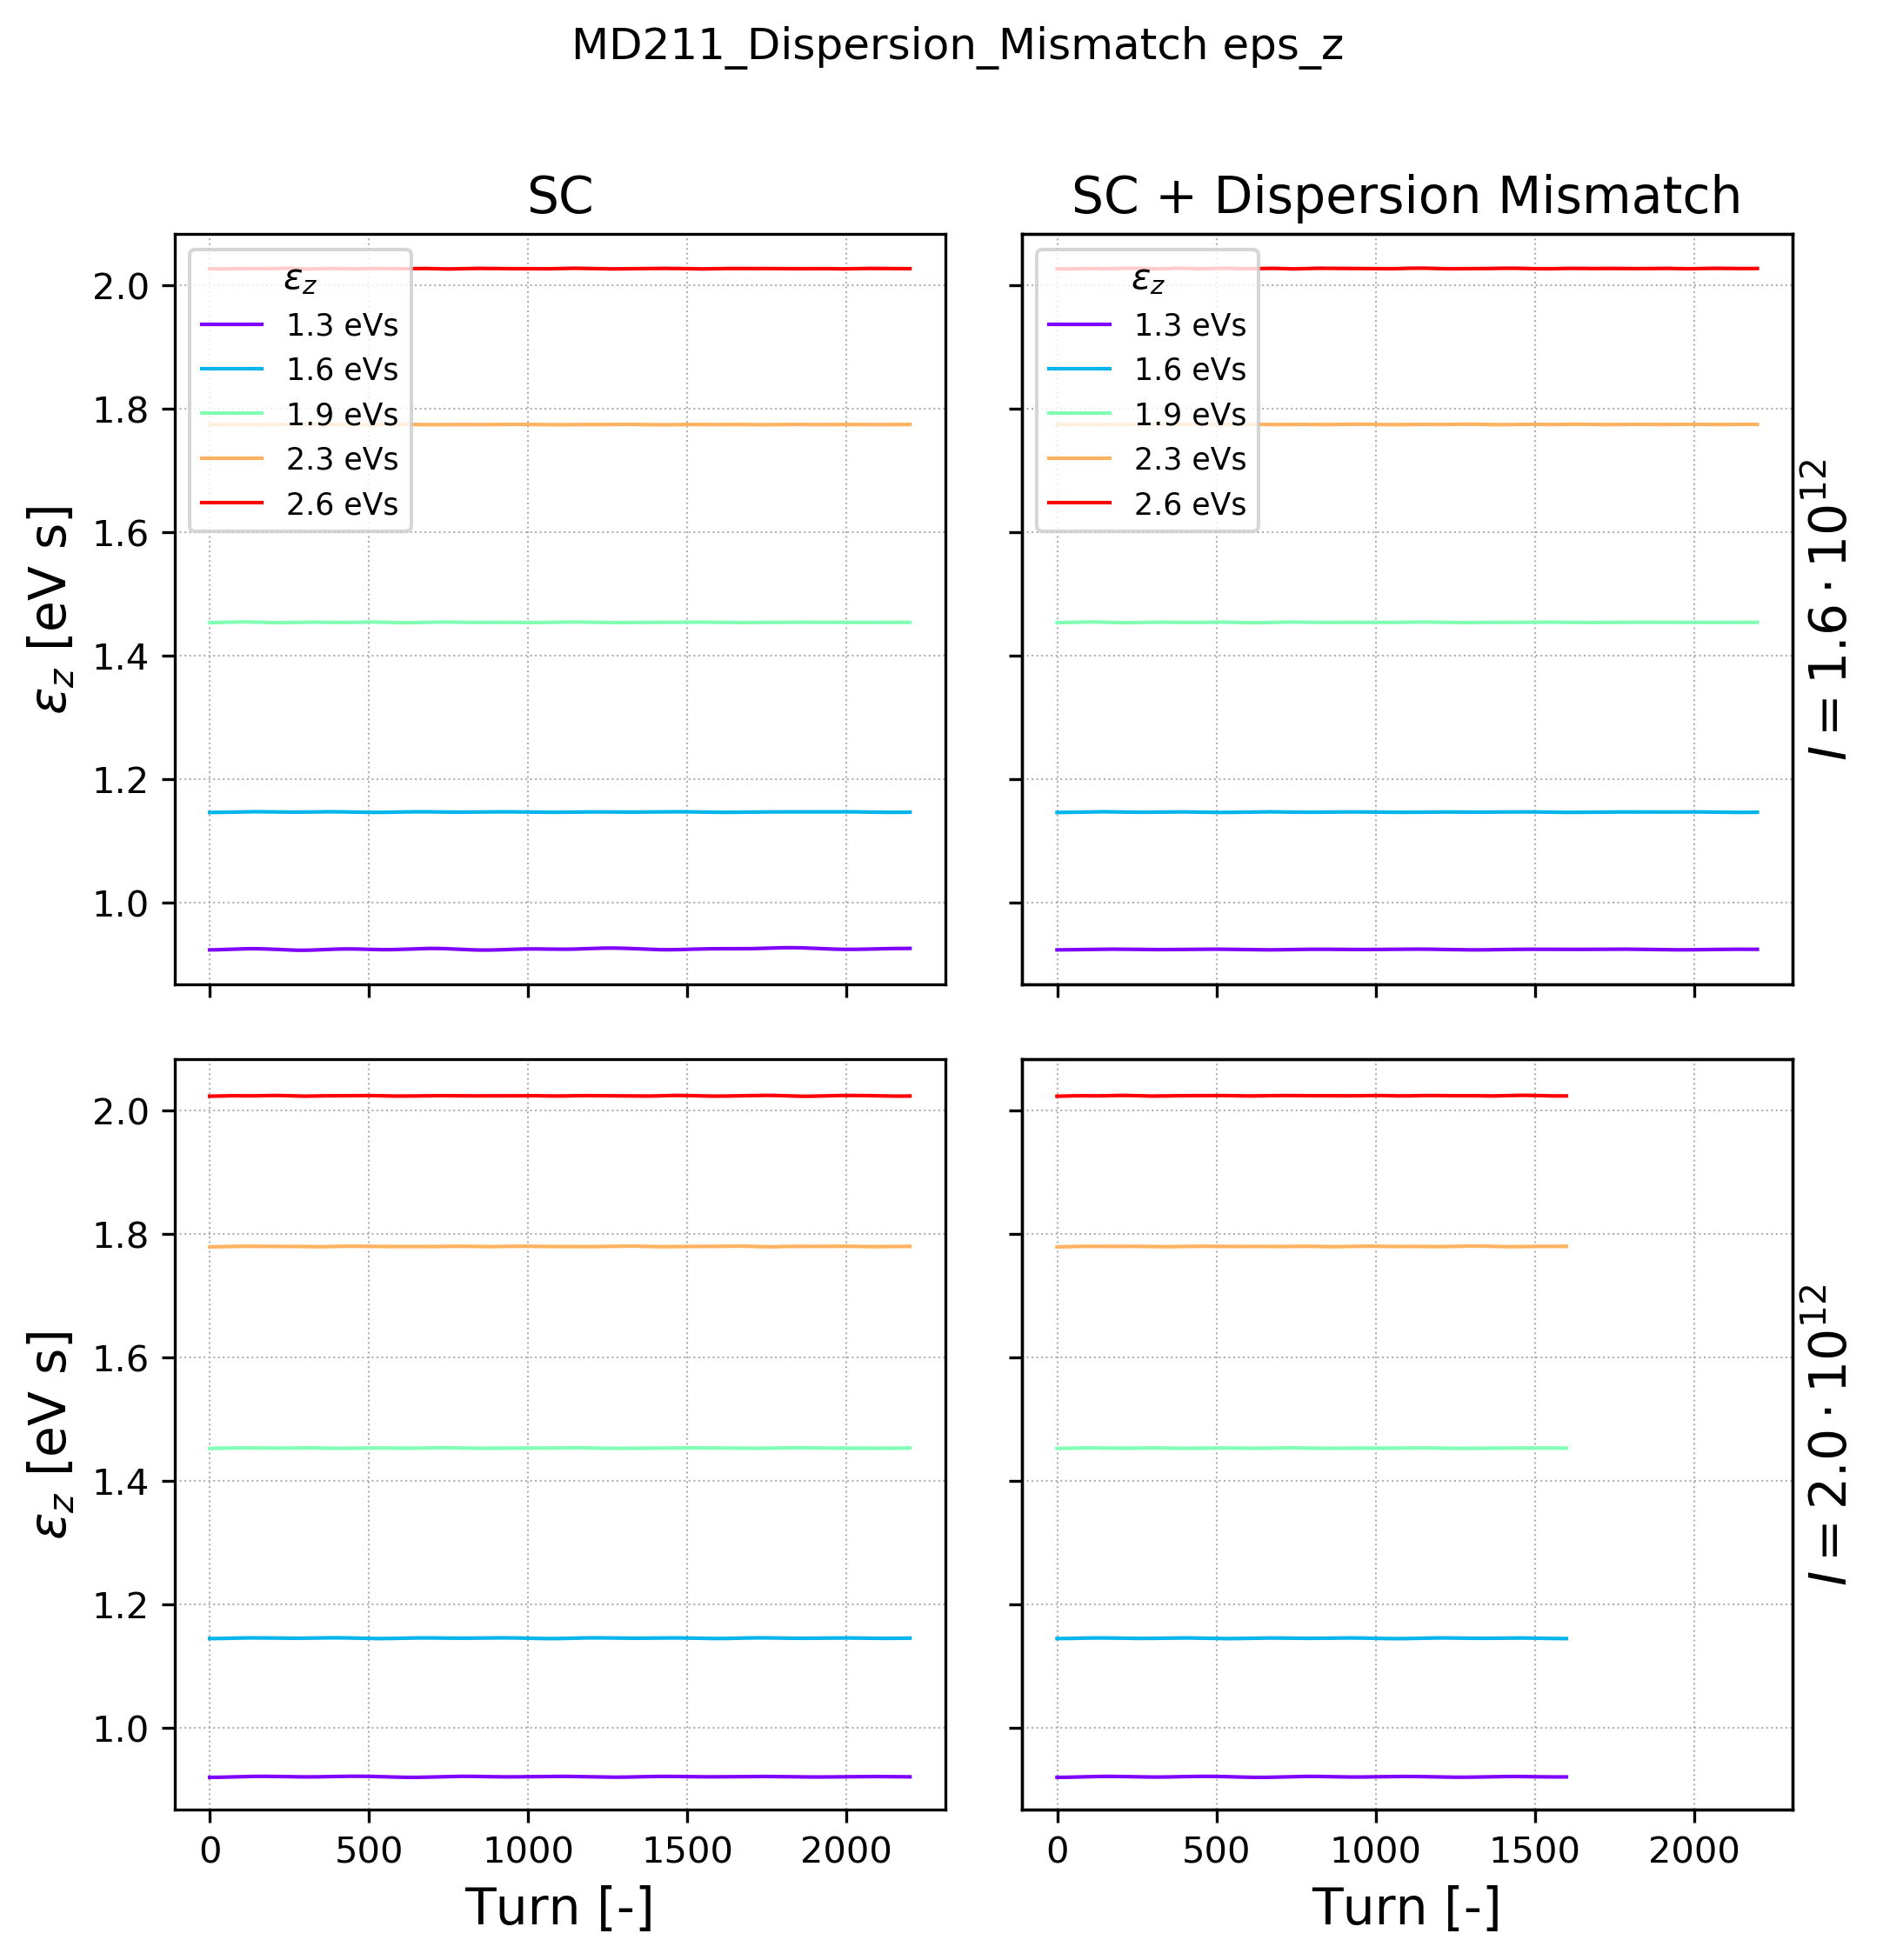

In [23]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_x  =  1.86  range =  0.0126  =  0.677 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_x  =  1.86  range =  0.0147  =  0.789 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_x  =  1.85  range =  0.0196  =  1.06 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_x  =  1.86  range =  0.0158  =  0.851 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_x  =  1.86  range =  0.0162  =  0.874 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_x  =  1.99  range =  0.139  =  7.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_x  =  2.01  range =  0.192  =  9.56 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_x  =  2.01  range =  0.299  =  14.9 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_x  =  2.21  range =  0.464  =  21.0 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_x  =  2.43

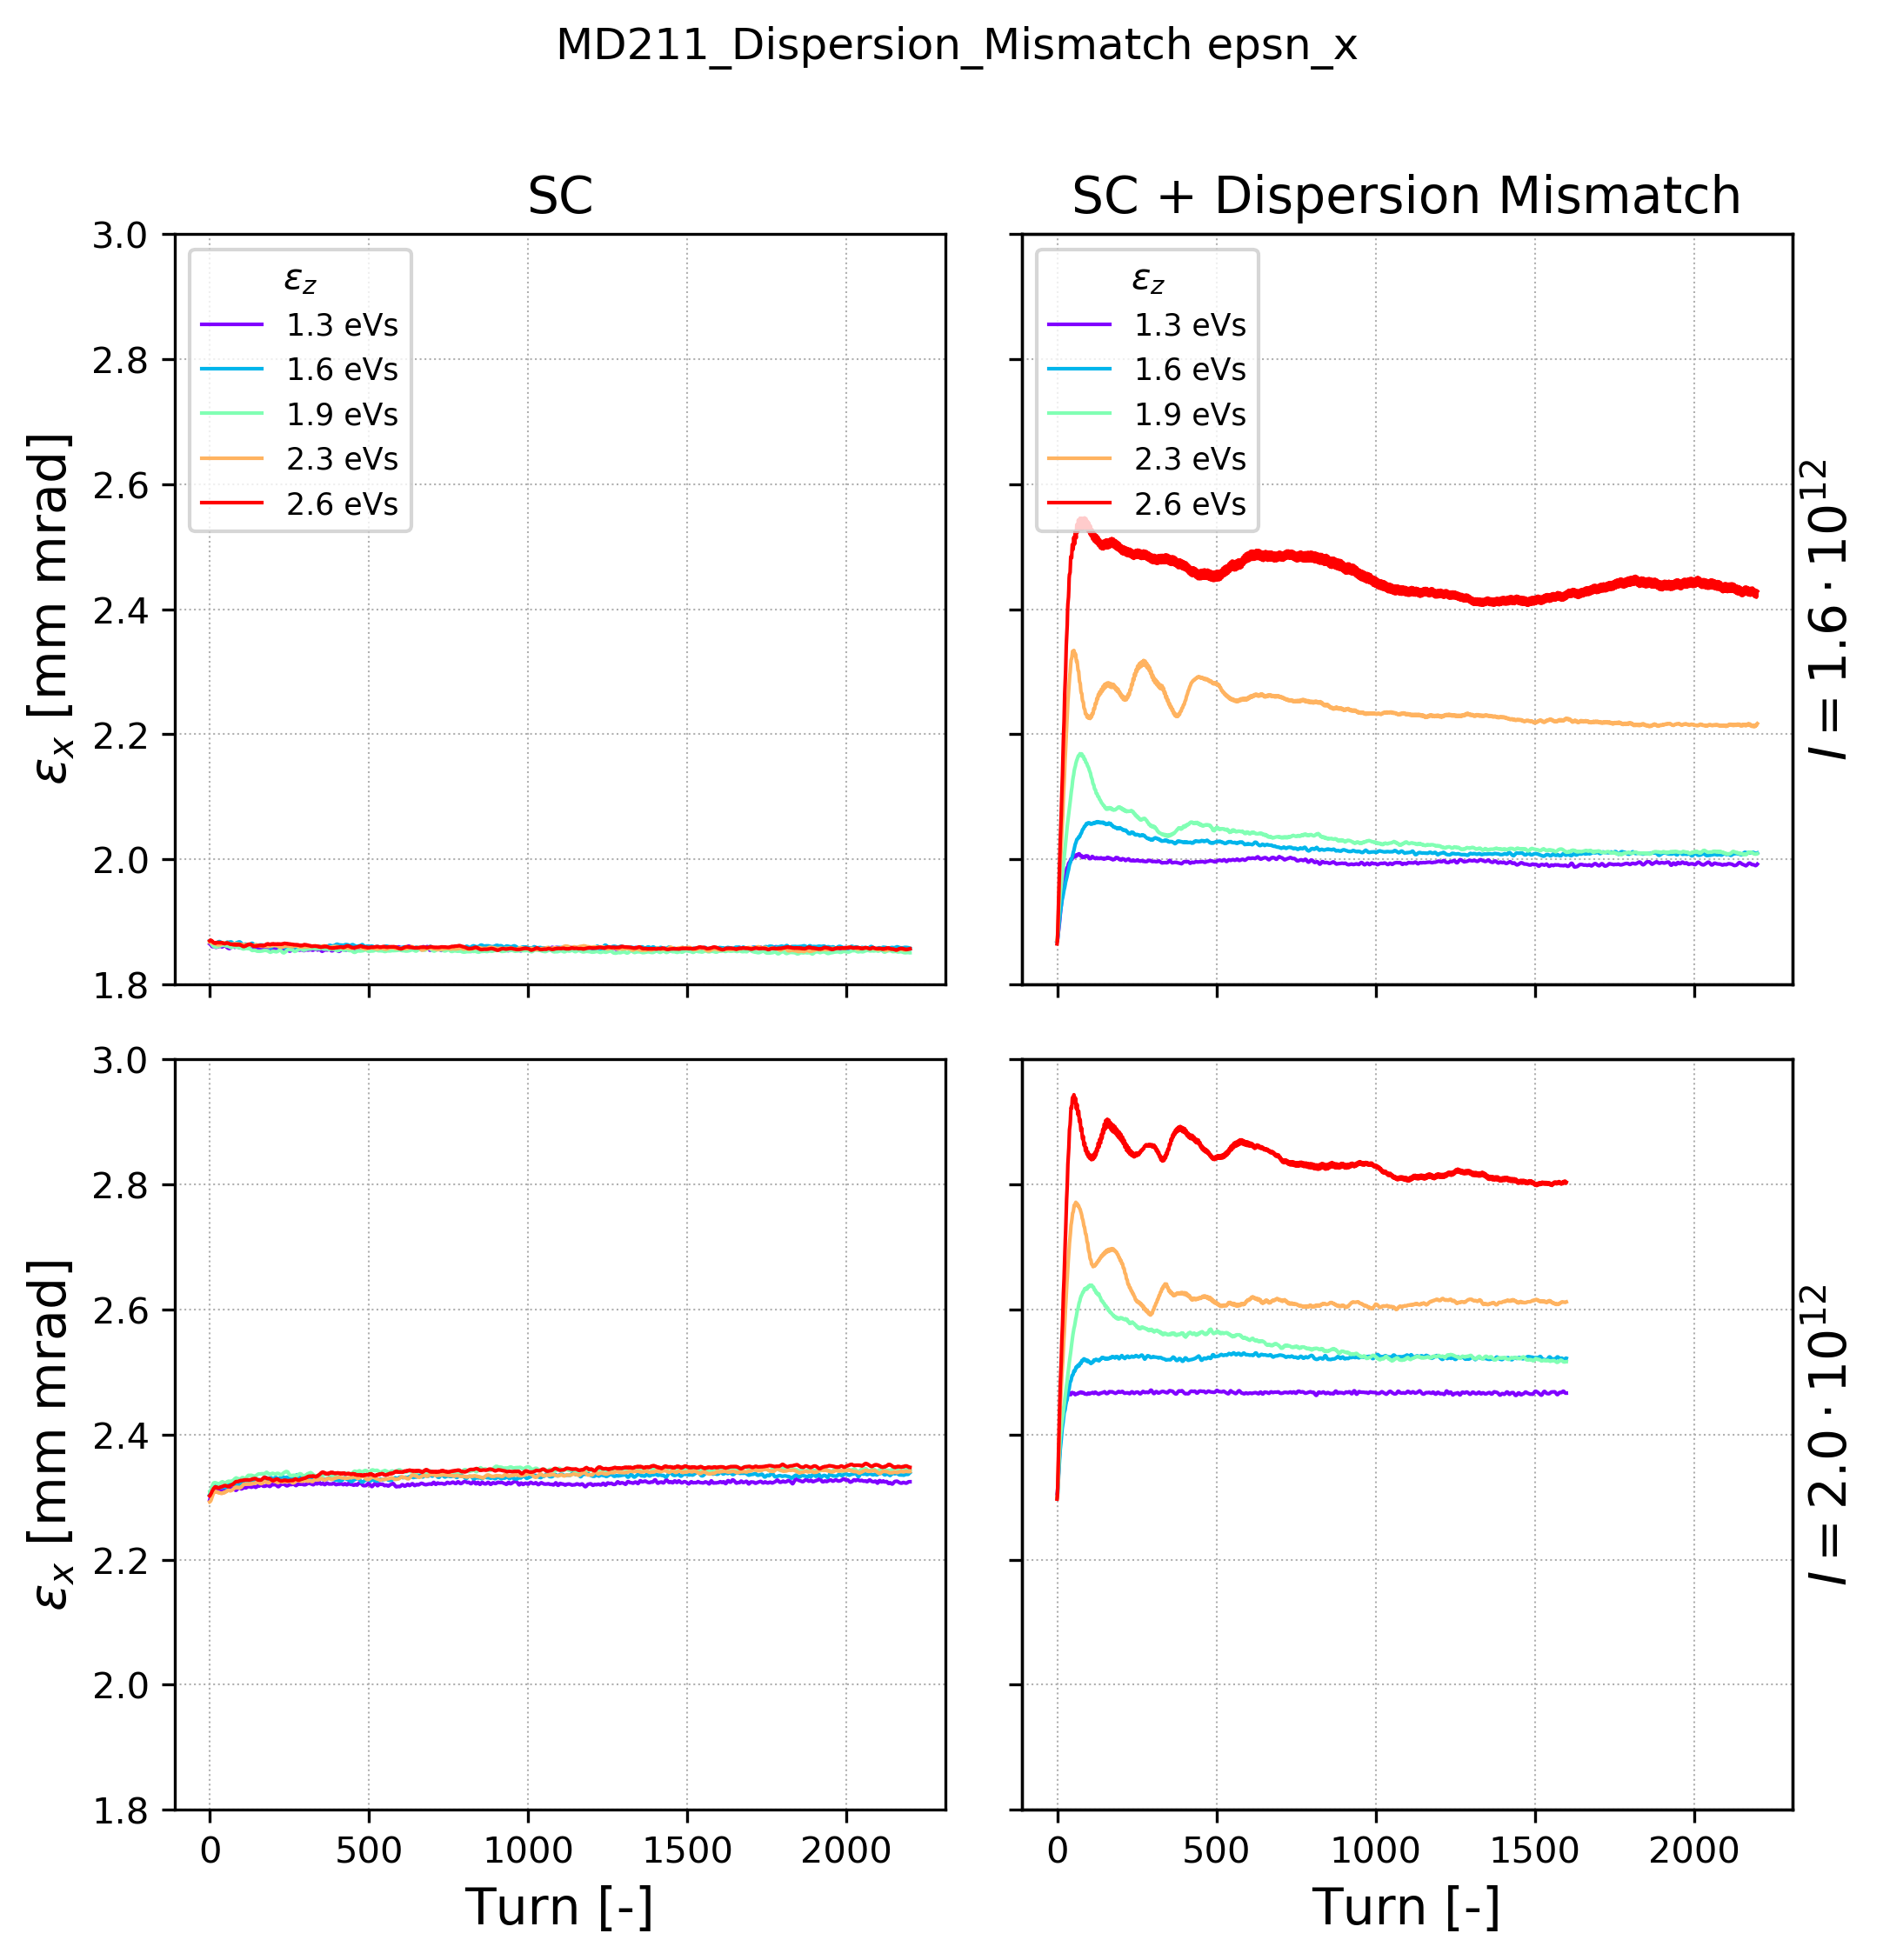

In [24]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax1.set_ylim(1.8, 3.0)
ax3.set_ylim(1.8, 3.0)
#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);


for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.84  range =  0.0157  =  0.849 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.85  range =  0.0171  =  0.928 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  1.85  range =  0.0221  =  1.2 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  1.85  range =  0.0175  =  0.948 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  1.84  range =  0.0169  =  0.915 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.89  range =  0.0576  =  3.05 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.95  range =  0.122  =  6.27 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  2.1  range =  0.275  =  13.1 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  2.14  range =  0.316  =  14.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  2.11

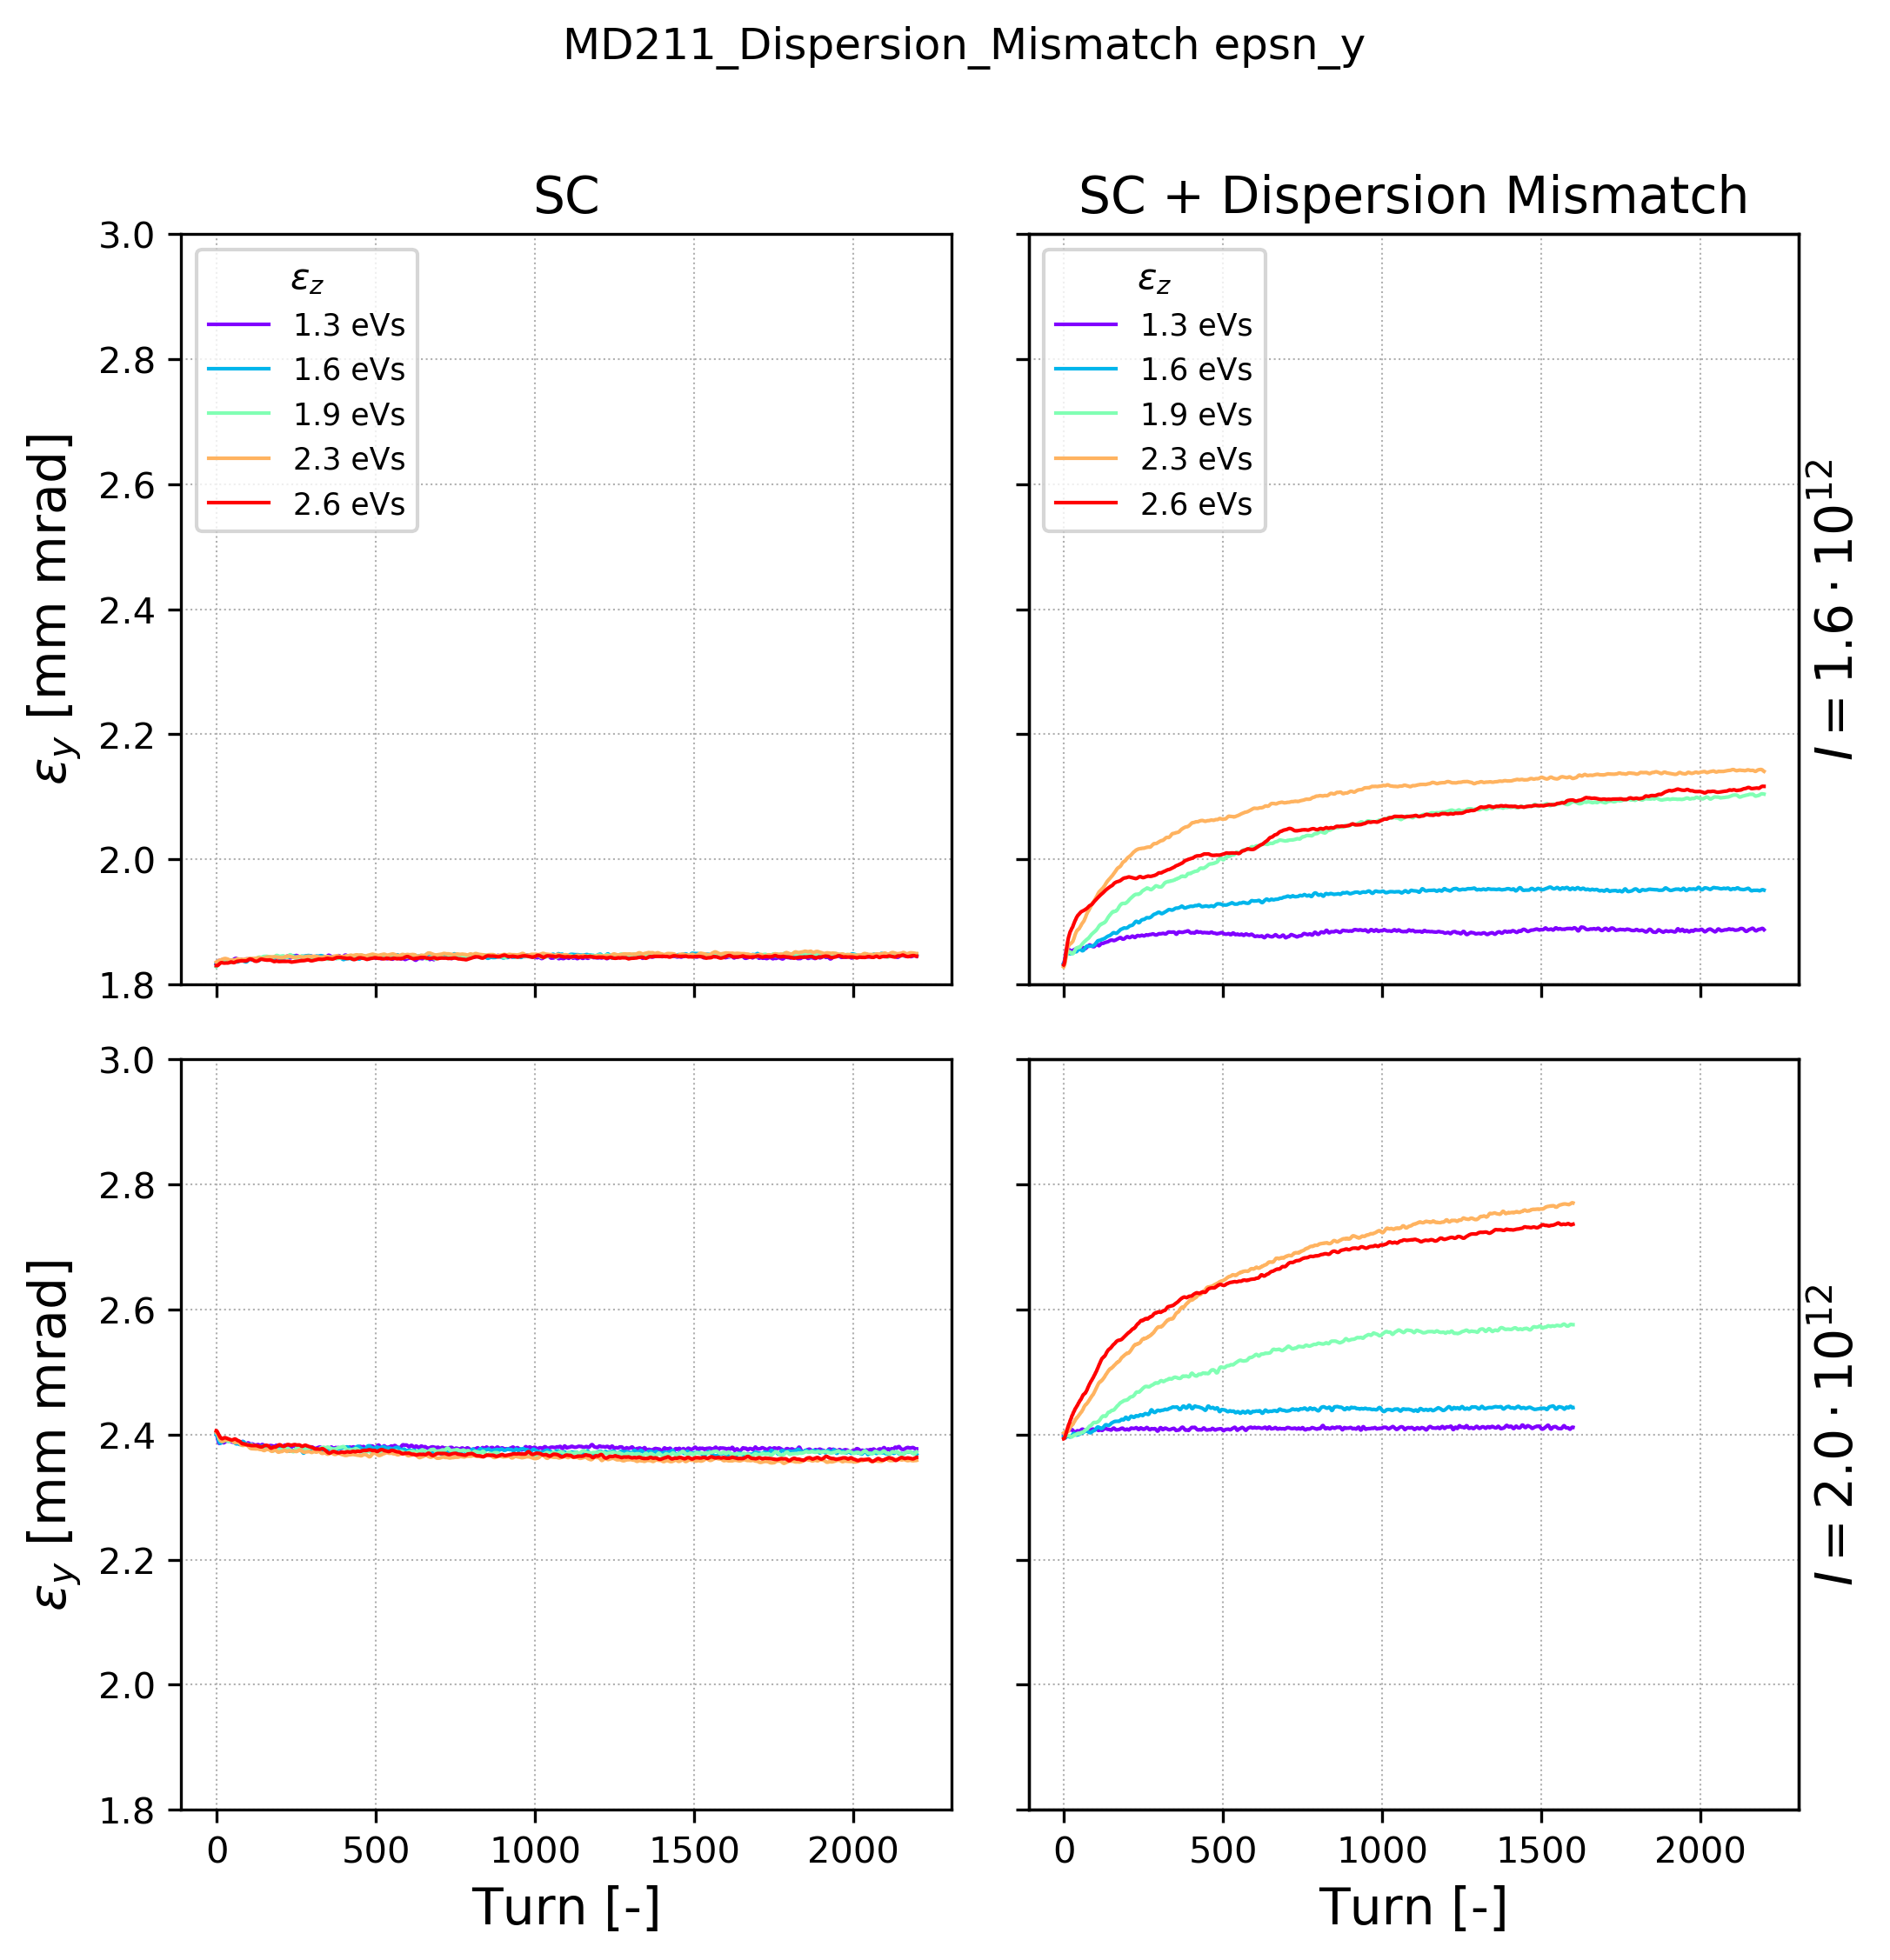

In [25]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax1.set_ylim(1.8, 3.0)
ax3.set_ylim(1.8, 3.0)
#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

SC   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.84  range =  0.0157  =  0.849 %
SC   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.85  range =  0.0171  =  0.928 %
SC   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  1.85  range =  0.0221  =  1.2 %
SC   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  1.85  range =  0.0175  =  0.948 %
SC   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  1.84  range =  0.0169  =  0.915 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.89  range =  0.0576  =  3.05 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.95  range =  0.122  =  6.27 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  2.1  range =  0.275  =  13.1 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  2.14  range =  0.316  =  14.7 %
SC + Dispersion Mismatch   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  2.11

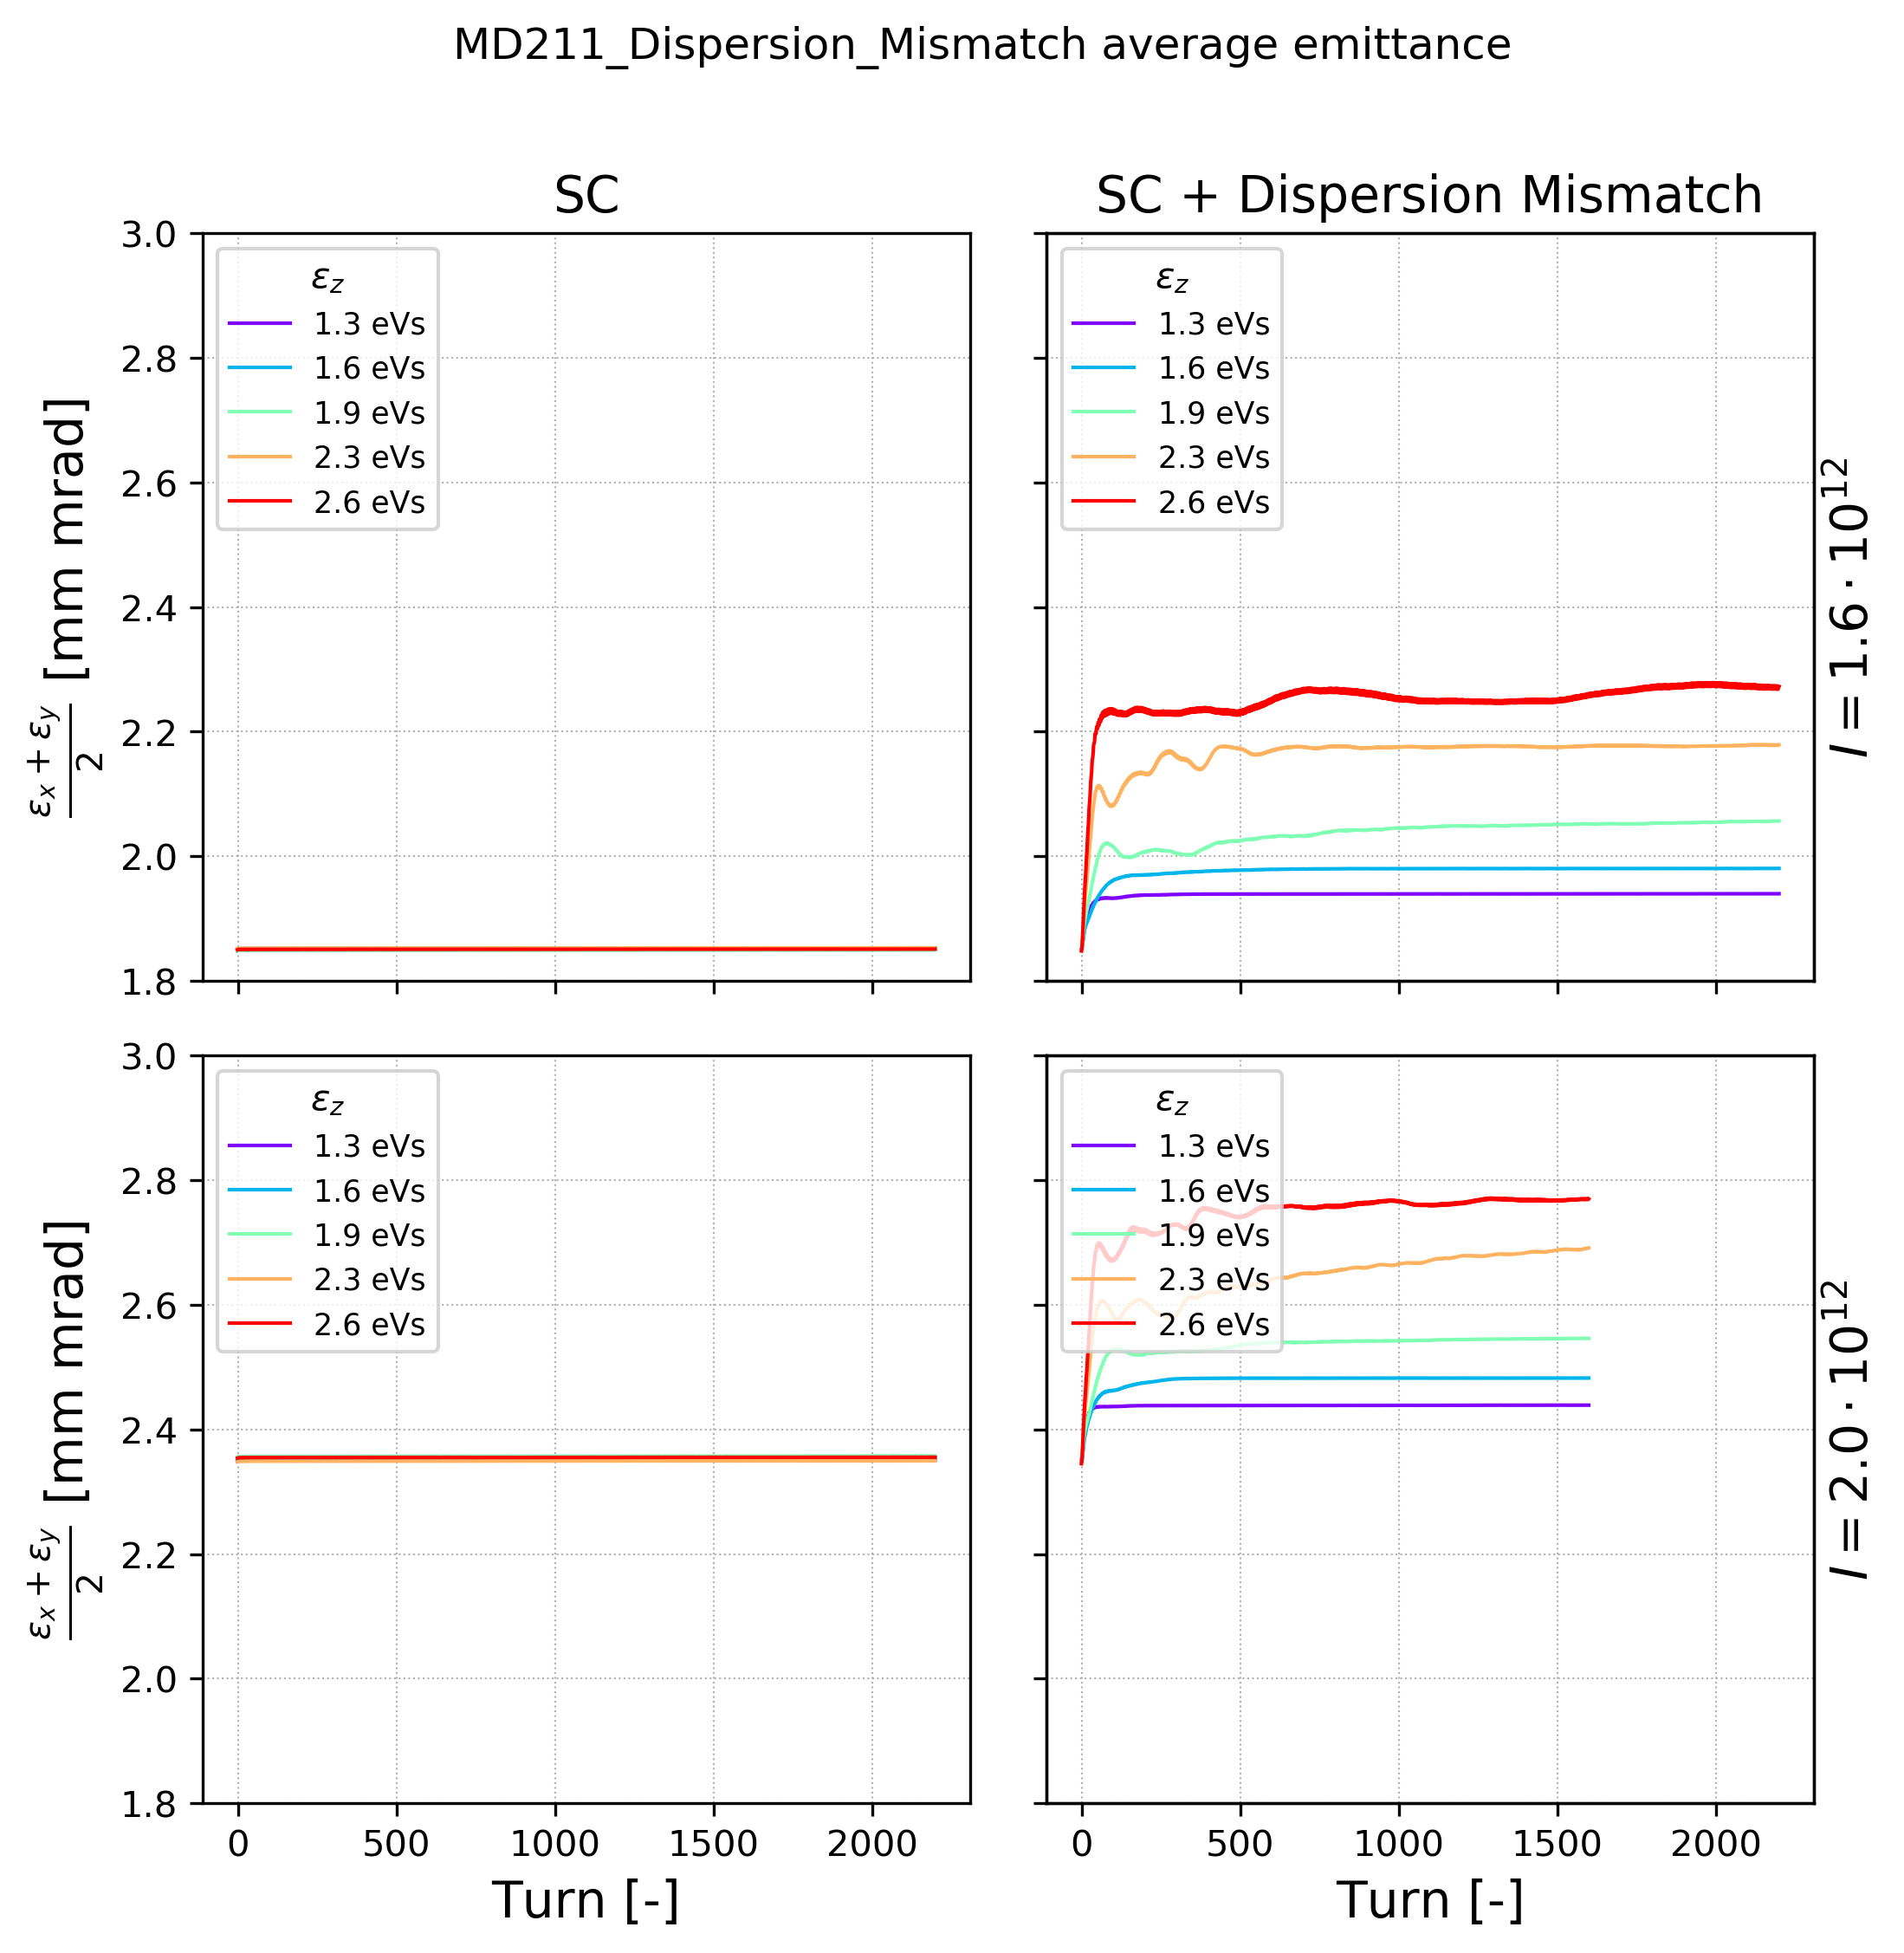

In [26]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        x = np.array(dd1[key]['turn'][0])
        y = np.array((dd1[key][parameter1][0]*multi1 + dd1[key][parameter2][0]*multi2)/2)
        ax1.plot(x, y, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

colors = cm.rainbow(np.linspace(0, 1, len(dd2.keys())))
c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        x = np.array(dd2[key]['turn'][0])
        y = np.array((dd2[key][parameter1][0]*multi1 + dd2[key][parameter2][0]*multi2)/2)
        ax2.plot(x, y, label=key, color=colors[c_it]);
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        x = np.array(dd3[key]['turn'][0])
        y = np.array((dd3[key][parameter1][0]*multi1 + dd3[key][parameter2][0]*multi2)/2)
        ax3.plot(x, y, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

colors = cm.rainbow(np.linspace(0, 1, len(dd4.keys())))
c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        x = np.array(dd4[key]['turn'][0])
        y = np.array((dd4[key][parameter1][0]*multi1 + dd4[key][parameter2][0]*multi2)/2)
        ax4.plot(x, y, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.legend(loc=2, title=legend_label, fontsize='small');
ax4.legend(loc=2, title=legend_label, fontsize='small');

ax1.set_ylim(1.8, 3.0)
ax3.set_ylim(1.8, 3.0)
#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);

In [27]:
def LorentzGamma(E_tot, E_rest=938.27208816E6):
    return (E_tot / E_rest)

In [28]:
LorentzGamma(450E9)

479.6050161552533

In [29]:
def LorentzBeta(gamma):
    return np.sqrt( 1. - (1./gamma**2) )

In [30]:
LorentzBeta(479.6)

0.9999978262373241